# Notebook for analyzing Grenville thermochron data compilation

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%config InlineBackend.figure_format='retina'

## Let's use general constraints on the closure temperatures for the minerals.

- Biotite: 280 +- 40
- Hornblende: 530 +- 50
- Monazite: 600-650
- Titanite: 660-700
- Rutile: 500-540



In [192]:
closure_temp_bounds_dict = {'Biotite':[280, 60], 
                            'Muscovite':[350, 50],
                            'Hornblende':[500, 80], 
                            'Rutile':[625, 125], 
                            'Monazite':[1000,100], 
                            'Titanite':[575, 75],
                            'Zircon': [950, 50],
                            'K-Feldspar':[250, 50], 
                            'Phlogopite':[300, 50], 'Whole Rock': [200, 50]}

color_dict = {'Biotite':'C0', 
              'Muscovite':'C1',
              'Hornblende':'C2', 
              'Rutile':'C3', 
              'Monazite':'C4', 
              'Titanite':'C5', 
              'Zircon':'C6', 
              'K-Feldspar': 'C7', 
              'Phlogopite':'C8',
             'Whole Rock': 'k'}

# Load in compilation file

In [48]:
study_summary = pd.read_csv('../data/thermochron_compilation/study_summary.csv')
study_summary = study_summary[study_summary['Age'] < 1090]
study_summary = study_summary.sort_values(by='Age').reset_index(drop=1)

study_summary.head()

,Sample_No,Age,Error_Plus,Error_Minus,Age_Method,Age_Interpretation,Age_Note,Age_Material,Age_Technique,Age_Qualifier,Geological_Province,Province,Latitude,Longitude,Location,Geological_Info,Rock_Type,Rock_Description,References
0,C-93-9,599.0,16.0,16.0,U/Pb,Reset,granite,"Zircon, Rutile",TIMS,Direct,Grenville Province,ON,44.91704,-77.10352,Sand Lake,Mazinaw terrane - Norway Lake granite,Plutonic,granite,"Corfu, F. and Easton, R.M., 1995. U-Pb geochro..."
1,FA-810101,630.0,64.0,64.0,K/Ar,Igneous Crystallization,medium- to fine-grained massive dark grey diab...,Whole Rock,Ar Furnace-Fusion,Estimate,Grenville Province,QC,47.23340,-78.78313,3 km NW of the rapids below Lc des Cinq Milles...,Parauthochthonous Belt - unknown,Plutonic,medium- to fine-grained massive dark grey diab...,"Stevens, R.D., Delabio, R.N. and Lachance, G.R..."
2,FA-810101A,654.0,46.0,46.0,K/Ar,Igneous Crystallization,fine- to medium-grained massive dark grey diab...,Whole Rock,Ar Furnace-Fusion,Estimate,Grenville Province,QC,47.23340,-78.78313,3 km NW of the rapids below Lac des Cinq Mille...,Parauthochthonous Belt - unknown,Plutonic,fine- to medium-grained massive dark grey diab...,"Stevens, R.D., Delabio, R.N. and Lachance, G.R..."
3,SSA-10A,731.0,8.0,8.0,Ar/Ar,Cooling,pegmatite,K-Feldspar,Ar Furnace-Step,Estimate,Grenville Province,ON,45.50006,-78.24977,Approx. 50 km WSE of Pembroke. Location approx...,Central Gneiss Belt - unknown,Plutonic,pegmatite,"Cosca, M.A., Sutter, J.F. and Essene, E.J., 19..."
4,SSA-11B,758.0,8.0,8.0,Ar/Ar,Cooling,amphibolite,K-Feldspar,Ar Furnace-Fusion,Estimate,Grenville Province,ON,45.58339,-78.38311,Huntsville area. Location approximate.,Central Gneiss Belt - unknown,Metamorphic,amphibolite,"Cosca, M.A., Sutter, J.F. and Essene, E.J., 19..."


In [3]:
study_summary.Age_Material.unique()

array(['Zircon, Rutile', 'Whole Rock', 'K-Feldspar', 'Biotite',
       'Titanite', 'Zircon, Monazite', 'Muscovite', 'Rutile',
       'Phlogopite', 'Hornblende', 'Zircon', 'Zircon, Titanite',
       'Monazite', 'Uraninite', 'Monazite, Xenotime', 'Garnet',
       'Monazite, Titanite', 'Thorianite, Uraninite', 'Thorianite'],
      dtype=object)

## plot all ages

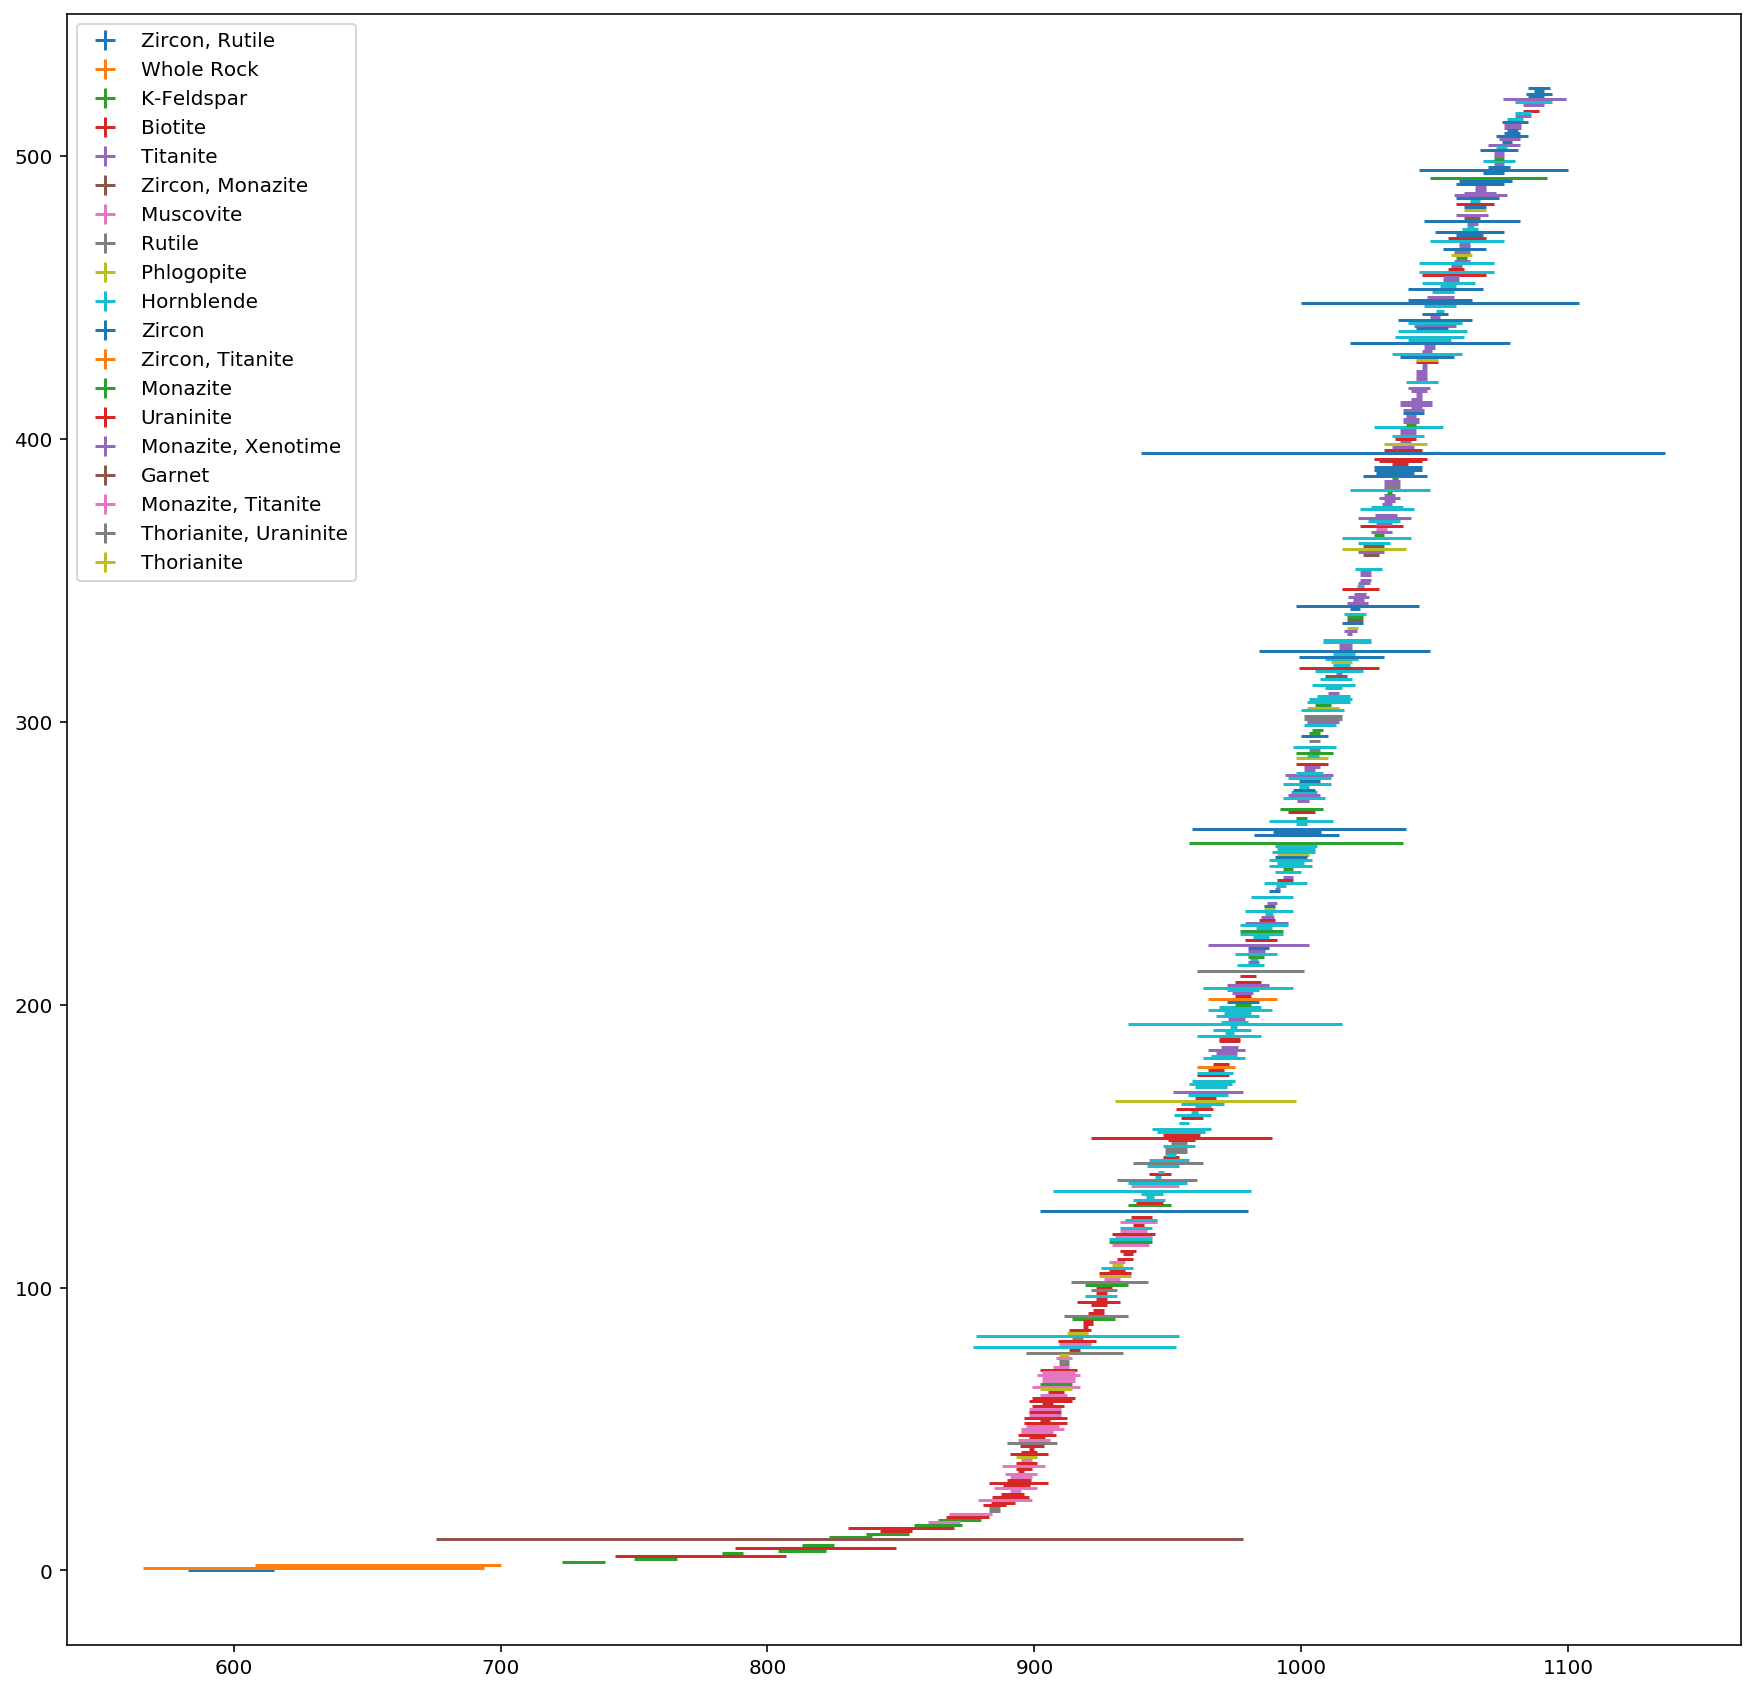

In [4]:
plt.figure(figsize=(15, 15))
for i in range(len(study_summary.Age_Material.unique())):
    this_material = study_summary[study_summary['Age_Material'] == study_summary.Age_Material.unique()[i]]
    plt.errorbar(this_material['Age'], this_material.index, 0, this_material['Error_Plus'], 
                 color='C'+str(i), ls='None', label=study_summary.Age_Material.unique()[i])
plt.legend()

## plot all rutile ages

<ErrorbarContainer object of 3 artists>

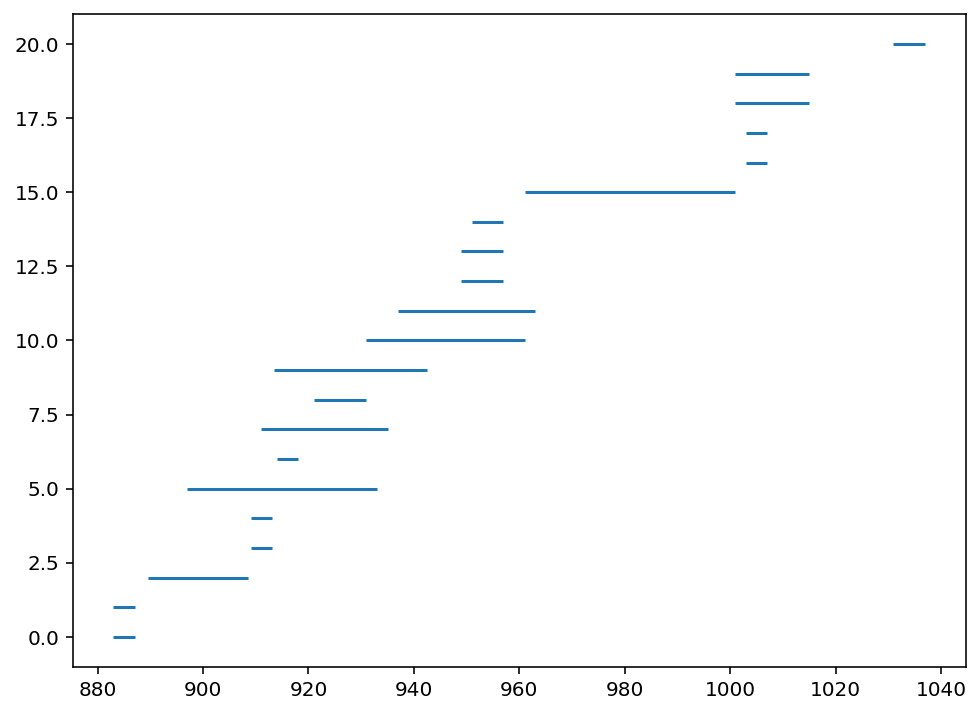

In [5]:
plt.figure(figsize=(8, 6))

rutile_data = study_summary[study_summary['Age_Material'] == 'Rutile'].reset_index(drop=1)
plt.errorbar(rutile_data['Age'], rutile_data.index, 0, rutile_data['Error_Plus'], 
                 color='C0', ls='None', label='rutile')
# plt.legend()

# Get Bancroft Terrane records


## Cosca 1992
- Muscovite ages are much older than amphibole ages, consider removing muscovite ages

In [201]:
Cosca1992a_ages = pd.read_csv('../data/thermochron_compilation/Cosca1992a.csv')
Cosca1992a_Bancroft_ages = Cosca1992a_ages[Cosca1992a_ages['Geological_Info'].str.contains('Bancroft')]
Cosca1992a_Bancroft_ages = Cosca1992a_Bancroft_ages[~Cosca1992a_Bancroft_ages['Age_Material'].str.contains('Allanite|Garnet|Zircon|Phlogopite|Muscovite')].reset_index(drop=1)

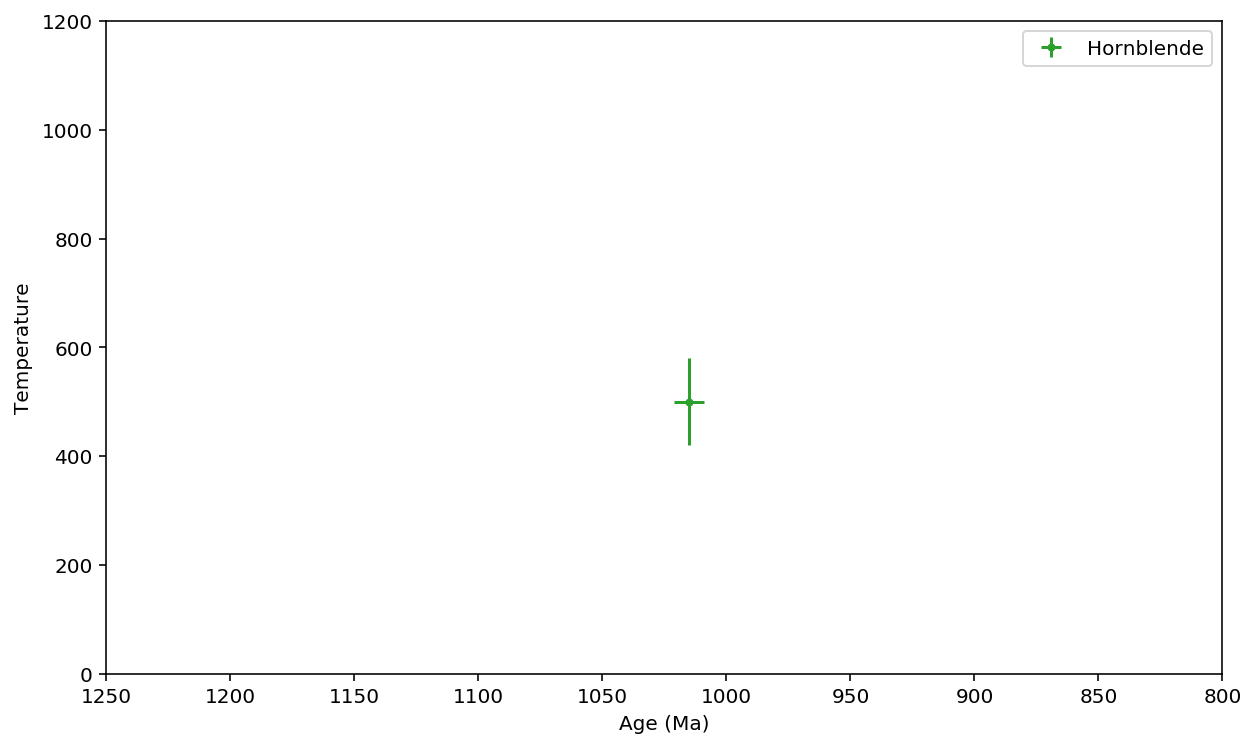

In [202]:
plt.figure(figsize=(10, 6))
for i in Cosca1992a_ages.Age_Material.unique():
    closure_temp_bounds = closure_temp_bounds_dict[i]
    this_material = Cosca1992a_Bancroft_ages[Cosca1992a_Bancroft_ages['Age_Material'] == i]
    plt.errorbar(this_material['Age'], np.full(len(this_material['Age']),closure_temp_bounds[0]), closure_temp_bounds[1], this_material['Error_Plus'], fmt='.',
                 color=color_dict[i], ls='None', label=i)
plt.ylabel('Temperature')
plt.xlabel('Age (Ma)')
plt.gca().invert_xaxis()
plt.ylim(0, 1200)
plt.xlim(1250, 800)
plt.legend()
plt.show()

# Halibruton Intrusions

- Berger 1981
- Hanes 1988 Bark Lake

## Berger 1981a, Hanes 1988a

- G16-25 biotite is irradiated and produce anomalous result comparing to others, we thus filter it out
- Hanes 1988 has muscovite and k-spar ages on Bark Lake diorite

In [149]:
Berger1981a_ages = pd.read_csv('../data/thermochron_compilation/Berger1981a.csv')
Hanes1988a_ages = pd.read_csv('../data/thermochron_compilation/Hanes1988a.csv')
Haliburton_ages = pd.concat([Berger1981a_ages, Hanes1988a_ages[Hanes1988a_ages['Geological_Info'].str.contains('Bancroft')]])
Haliburton_ages = Haliburton_ages[Haliburton_ages['Age'] != 955]
Haliburton_ages = Haliburton_ages[~Haliburton_ages['Age_Material'].str.contains('Allanite|Garnet|Zircon|Phlogopite')].reset_index(drop=1)

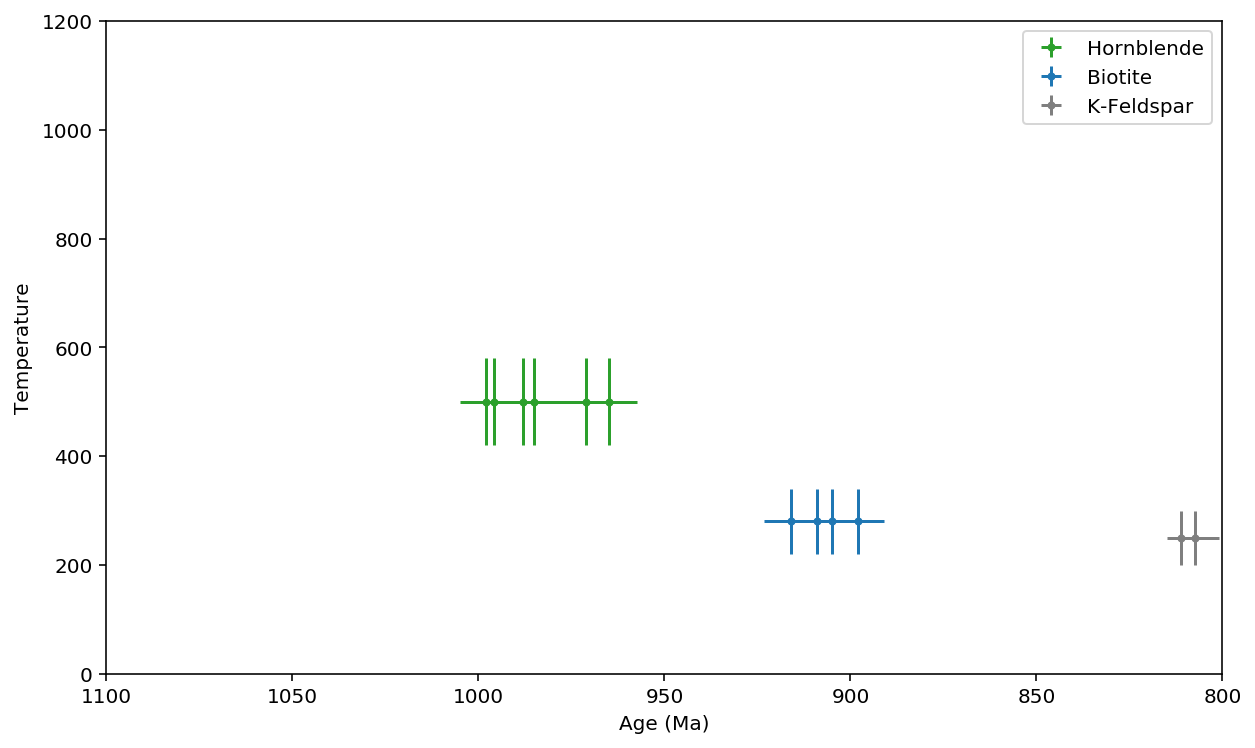

In [150]:
plt.figure(figsize=(10, 6))
for i in Haliburton_ages.Age_Material.unique():
    closure_temp_bounds = closure_temp_bounds_dict[i]
    this_material = Haliburton_ages[Haliburton_ages['Age_Material'] == i]
    plt.errorbar(this_material['Age'], np.full(len(this_material['Age']),closure_temp_bounds[0]), closure_temp_bounds[1], this_material['Error_Plus'], fmt='.',
                 color=color_dict[i], ls='None', label=i)
plt.ylabel('Temperature')
plt.xlabel('Age (Ma)')
plt.gca().invert_xaxis()
plt.ylim(0, 1200)
plt.xlim(1100, 800)
plt.legend()
plt.show()

In [78]:
Bancroft_records = study_summary[study_summary['Geological_Info'].str.contains('Bancroft')]
Bancroft_records = Bancroft_records[~Bancroft_records['Age_Material'].str.contains('Allanite|Garnet|Zircon|Phlogopite')]
Bancroft_records.head()

,Sample_No,Age,Error_Plus,Error_Minus,Age_Method,Age_Interpretation,Age_Note,Age_Material,Age_Technique,Age_Qualifier,Geological_Province,Province,Latitude,Longitude,Location,Geological_Info,Rock_Type,Rock_Description,References
26,94GG01b,891.0,7.0,7.0,Ar/Ar,Cooling,NaN,Biotite,Ar Furnace-Step,Direct,Grenville Province,ON,NaN,NaN,Central Metasedimentary Belt,"Central Metasedimentary Belt, Bancroft Terrane",Metamorphic,NaN,"Warnock, A. C., Kodama, K. P., & Zeitler, P. K..."
41,B2-149,898.0,7.1,7.1,Ar/Ar,Cooling,NaN,Biotite,Ar Furnace-Step,Direct,Grenville Province,ON,NaN,NaN,Central Metasedimentary Belt,"Central Metasedimentary Belt, Bancroft Terrane",Metamorphic,NaN,"Berger, G. W., & York, D. (1981). Geothermomet..."
48,94GG01a,901.0,7.0,7.0,Ar/Ar,Cooling,NaN,Biotite,Ar Furnace-Step,Direct,Grenville Province,ON,NaN,NaN,Central Metasedimentary Belt,"Central Metasedimentary Belt, Bancroft Terrane",Metamorphic,NaN,"Warnock, A. C., Kodama, K. P., & Zeitler, P. K..."
58,G4-22,905.0,6.1,6.1,Ar/Ar,Cooling,NaN,Biotite,Ar Furnace-Step,Direct,Grenville Province,ON,NaN,NaN,Central Metasedimentary Belt,"Central Metasedimentary Belt, Bancroft Terrane",Metamorphic,NaN,"Berger, G. W., & York, D. (1981). Geothermomet..."
71,D1-190,909.0,7.0,7.0,Ar/Ar,Cooling,NaN,Biotite,Ar Furnace-Step,Direct,Grenville Province,ON,NaN,NaN,Central Metasedimentary Belt,"Central Metasedimentary Belt, Bancroft Terrane",Metamorphic,NaN,"Berger, G. W., & York, D. (1981). Geothermomet..."


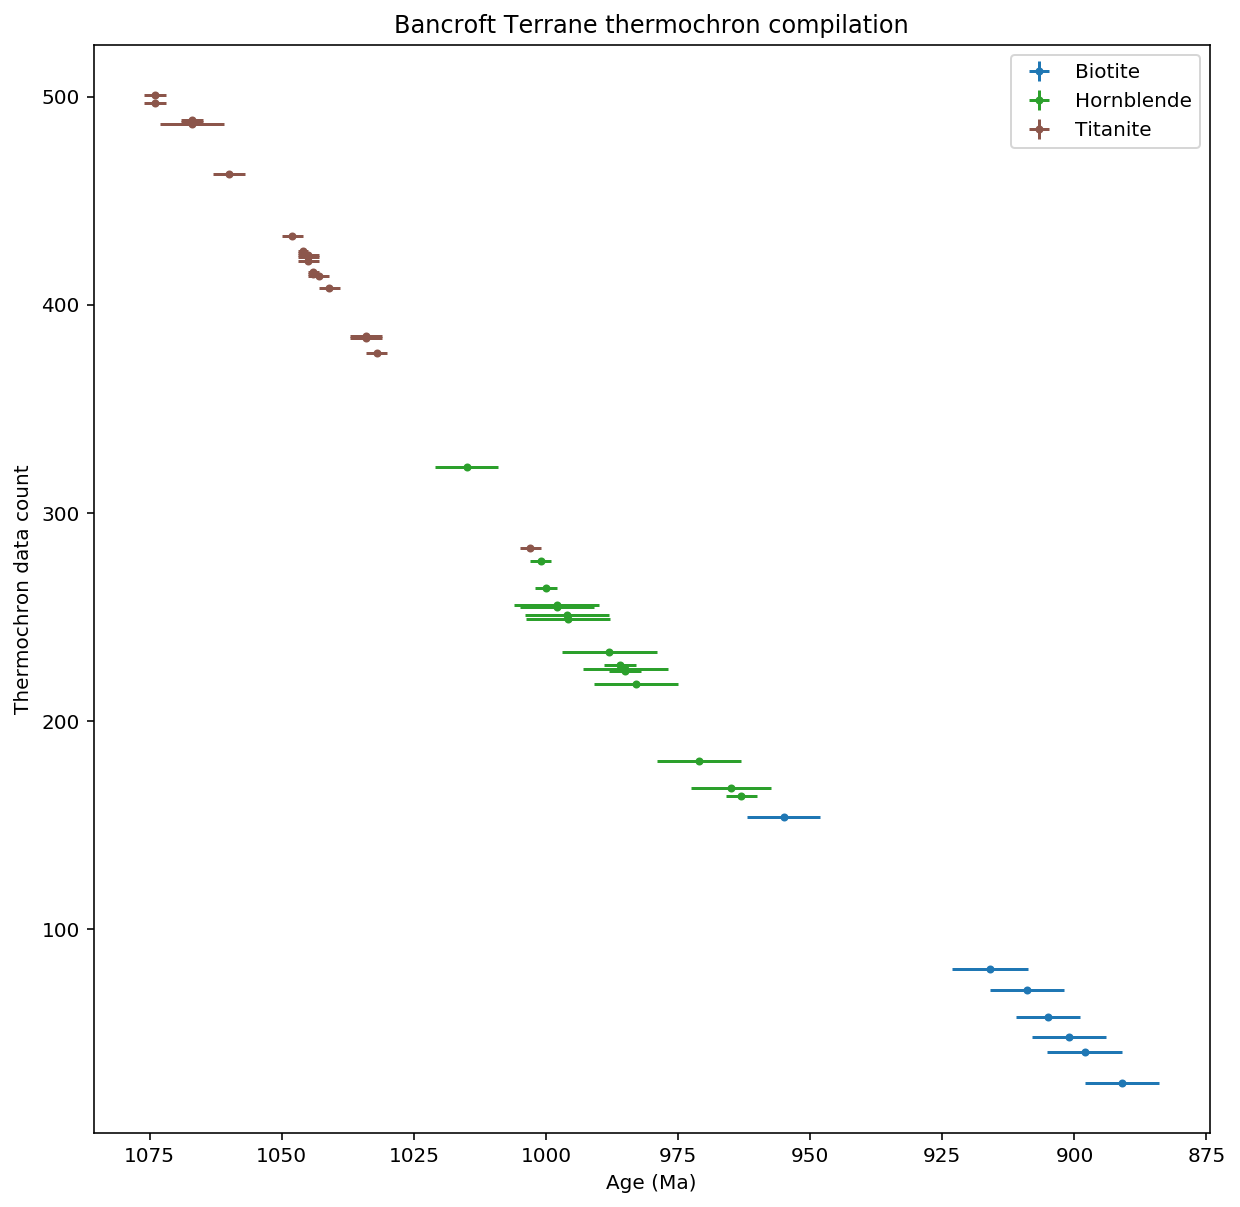

In [79]:
plt.figure(figsize=(10, 10))
for i in range(len(Bancroft_records.Age_Material.unique())):
    this_material = Bancroft_records[Bancroft_records['Age_Material'] == Bancroft_records.Age_Material.unique()[i]]
    plt.errorbar(this_material['Age'], this_material.index, 0, this_material['Error_Plus'], fmt='.',
                 color=color_dict[Bancroft_records.Age_Material.unique()[i]], ls='None', label=Bancroft_records.Age_Material.unique()[i])
plt.title('Bancroft Terrane thermochron compilation')
plt.ylabel('Thermochron data count')
plt.xlabel('Age (Ma)')
plt.gca().invert_xaxis()
plt.legend()
plt.show()

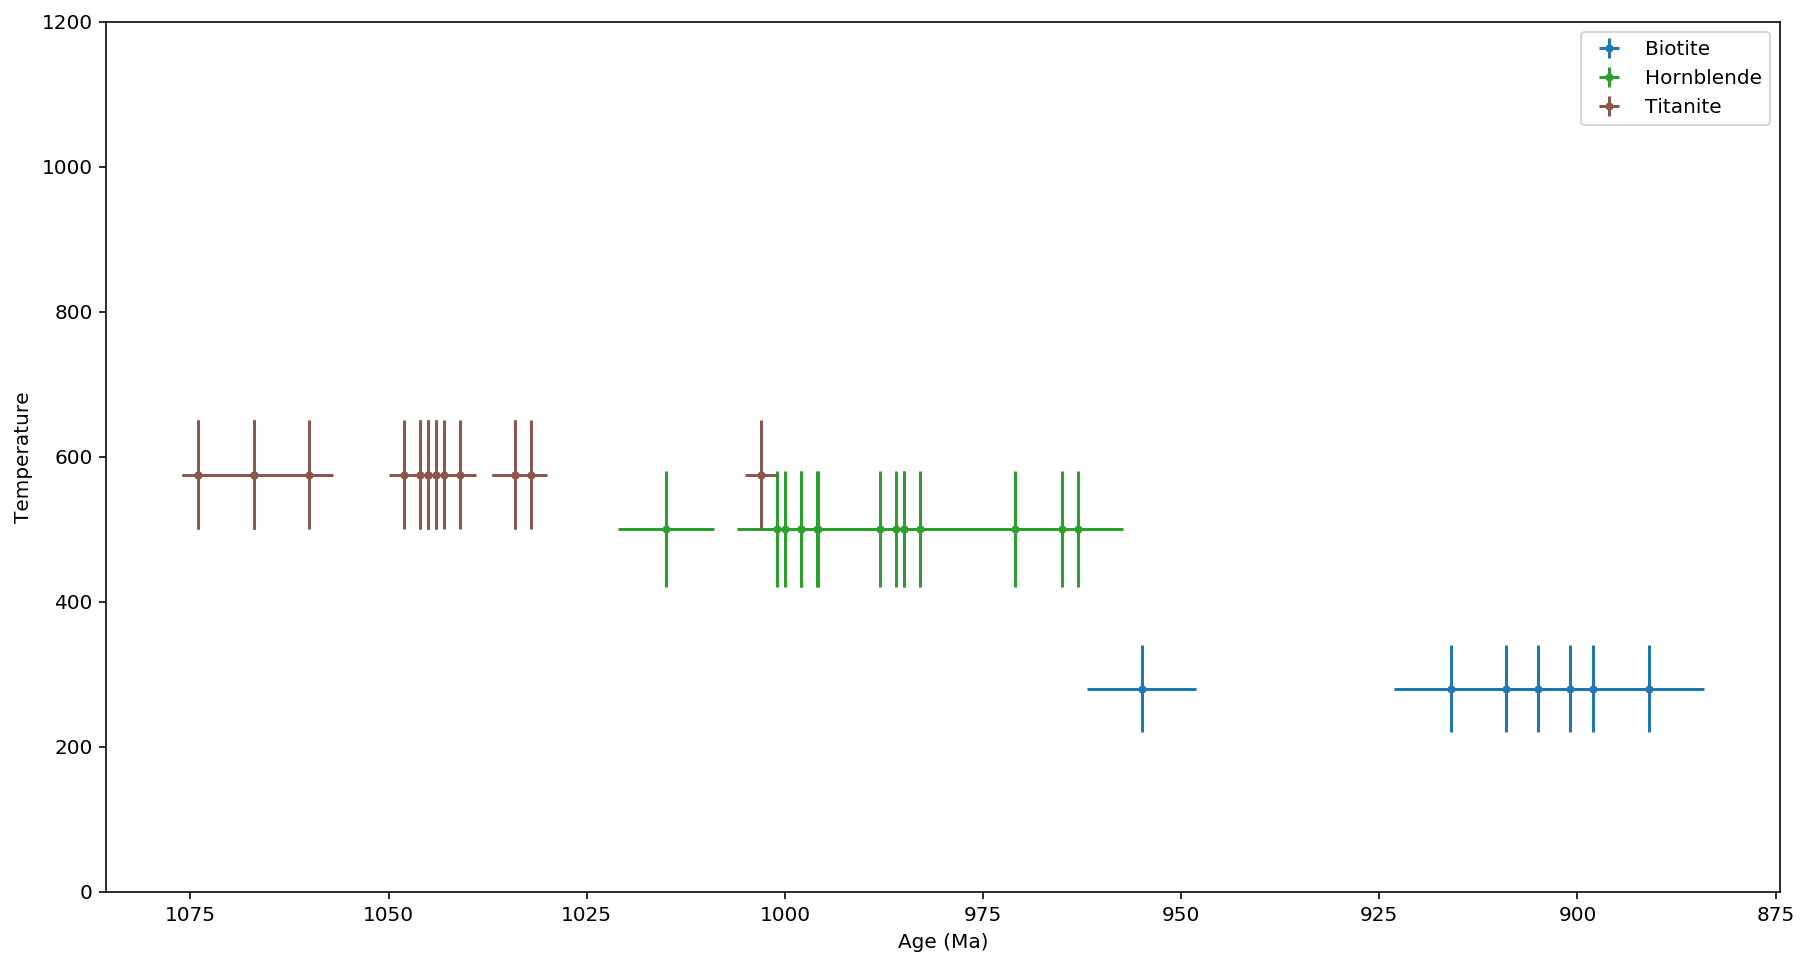

In [80]:
plt.figure(figsize=(15, 8))
for i in Bancroft_records.Age_Material.unique():
    closure_temp_bounds = closure_temp_bounds_dict[i]
    this_material = Bancroft_records[Bancroft_records['Age_Material'] == i]
    plt.errorbar(this_material['Age'], np.full(len(this_material['Age']),closure_temp_bounds[0]), closure_temp_bounds[1], this_material['Error_Plus'], fmt='.',
                 color=color_dict[i], ls='None', label=i)
plt.ylabel('Temperature')
plt.xlabel('Age (Ma)')
plt.gca().invert_xaxis()
plt.ylim(0, 1200)
plt.legend()
plt.show()

# Tudor Gabbro
- Lopez-Martinez 1983 Hornblende, plagioclase but potentially there are multi generations of hornblende, making the Ar difference suspicious
- Lopez plag data consistent with pmag interpretation that the southerly component C is Paleozoic overprint

## Lopez_martinez 1983

In [157]:
Lopez1983a = pd.read_csv('../data/thermochron_compilation/Lopez-Martinez1983a.csv')
Lopez1983a = Lopez1983a[Lopez1983a['Age_Material'] == 'Hornblende']
Lopez1983a = Lopez1983a[~Lopez1983a['Age_Material'].str.contains('Allanite|Garnet|Zircon|Phlogopite')].reset_index(drop=1)

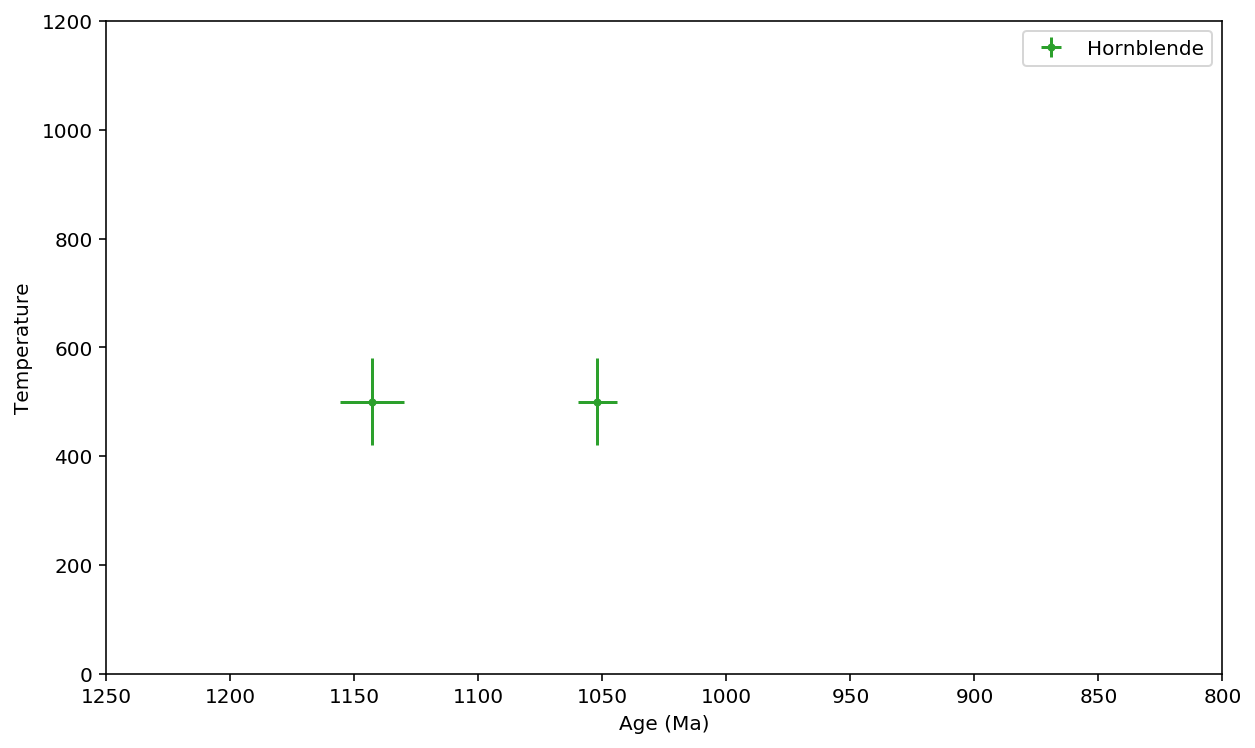

In [158]:
plt.figure(figsize=(10, 6))
for i in Lopez1983a.Age_Material.unique():
    closure_temp_bounds = closure_temp_bounds_dict[i]
    this_material = Lopez1983a[Lopez1983a['Age_Material'] == i]
    plt.errorbar(this_material['Age'], np.full(len(this_material['Age']),closure_temp_bounds[0]), closure_temp_bounds[1], this_material['Error_Plus'], fmt='.',
                 color=color_dict[i], ls='None', label=i)
plt.ylabel('Temperature')
plt.xlabel('Age (Ma)')
plt.gca().invert_xaxis()
plt.ylim(0, 1200)
plt.xlim(1250, 800)
plt.legend()
plt.show()

# Thanet Gabbro

## Berger 1981b

In [139]:
Berger1981b_ages = pd.read_csv('../data/thermochron_compilation/Berger1981b.csv')
Berger1981b_ages = Berger1981b_ages[~Berger1981b_ages['Age_Material'].str.contains('Allanite|Garnet|Zircon|Phlogopite')].reset_index(drop=1)
Berger1981b_ages.head()

,Sample_No,Age,Error_Plus,Error_Minus,Age_Method,Age_Interpretation,Age_Note,Age_Material,Age_Technique,Age_Qualifier,Geological_Province,Province,Latitude,Longitude,Location,Geological_Info,Rock_Type,Rock_Description,References
0,TH15-86,1202.0,10.0,10.0,Ar/Ar,Direct,NaN,Hornblende,Ar Furnace-Step,NaN,Grenville Province,ON,45,-78,NaN,NaN,NaN,NaN,"Berger, G. W., & York, D. (1981). 40Ar/39Ar da..."
1,TH2-34,1056.0,8.1,8.1,Ar/Ar,Direct,NaN,Hornblende,Ar Furnace-Step,NaN,Grenville Province,ON,45,-78,NaN,NaN,NaN,NaN,"Berger, G. W., & York, D. (1981). 40Ar/39Ar da..."
2,TH15-86,1090.5,7.8,7.8,Ar/Ar,Direct,NaN,Biotite,Ar Furnace-Step,NaN,Grenville Province,ON,45,-78,NaN,NaN,NaN,NaN,"Berger, G. W., & York, D. (1981). 40Ar/39Ar da..."
3,TH15-85,1083.4,7.7,7.7,Ar/Ar,Direct,NaN,Biotite,Ar Furnace-Step,NaN,Grenville Province,ON,45,-78,NaN,NaN,NaN,NaN,"Berger, G. W., & York, D. (1981). 40Ar/39Ar da..."


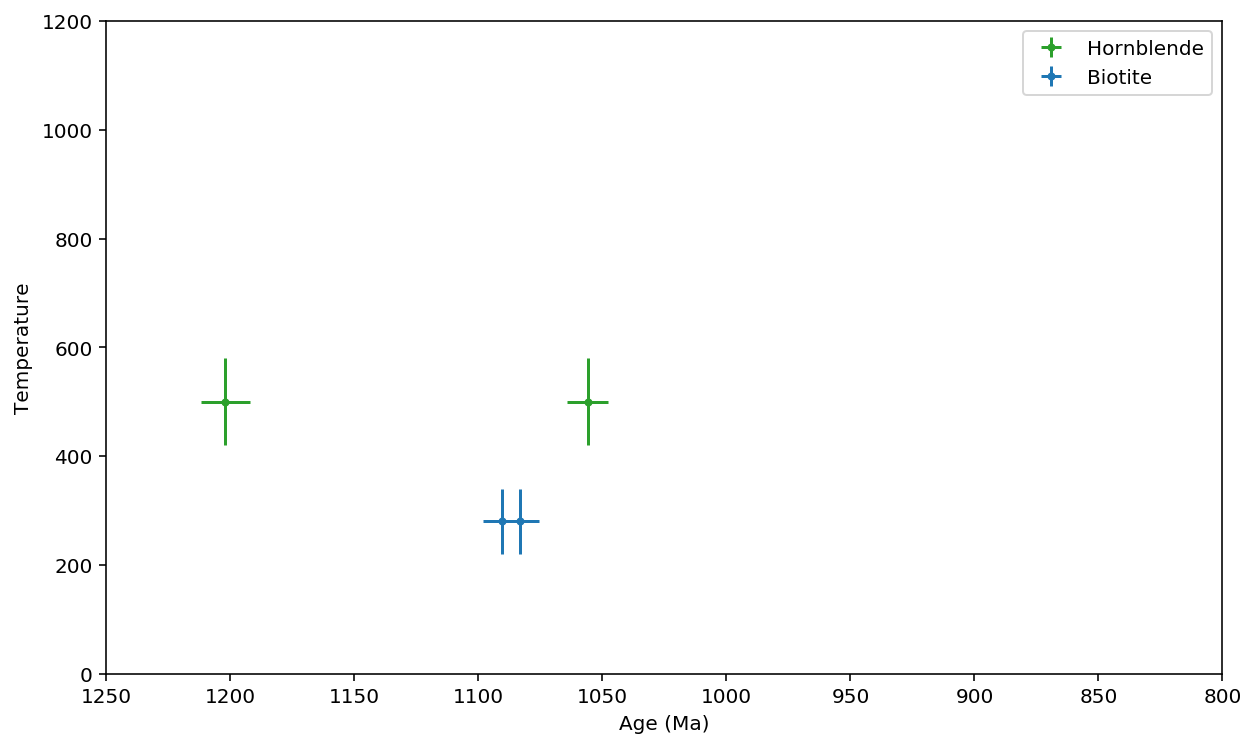

In [142]:
plt.figure(figsize=(10, 6))
for i in Berger1981b_ages.Age_Material.unique():
    closure_temp_bounds = closure_temp_bounds_dict[i]
    this_material = Berger1981b_ages[Berger1981b_ages['Age_Material'] == i]
    plt.errorbar(this_material['Age'], np.full(len(this_material['Age']),closure_temp_bounds[0]), closure_temp_bounds[1], this_material['Error_Plus'], fmt='.',
                 color=color_dict[i], ls='None', label=i)
plt.ylabel('Temperature')
plt.xlabel('Age (Ma)')
plt.gca().invert_xaxis()
plt.ylim(0, 1200)
plt.xlim(1250, 800)
plt.legend()
plt.show()

# Umfraville anorthosite 
- Palmer 1979 has a 911 Ma whole rock Ar data that corresponds to about 250 C

## Palmer 1979

In [123]:
Palmer1979a_ages = pd.read_csv('../data/thermochron_compilation/Palmer1979a.csv')
Palmer1979a_ages = Palmer1979a_ages[~Palmer1979a_ages['Age_Material'].str.contains('Allanite|Garnet|Zircon|Phlogopite')].reset_index(drop=1)
Palmer1979a_ages.head()

,Sample_No,Age,Error_Plus,Error_Minus,Age_Method,Age_Interpretation,Age_Note,Age_Material,Age_Technique,Age_Qualifier,Geological_Province,Province,Latitude,Longitude,Location,Geological_Info,Rock_Type,Rock_Description,References
0,SP-25,911,11,11,Ar/Ar,Direct,Whole Rock,Whole Rock,Ar Furnace-Step,NaN,Grenville Province,ON,44.95,-77.75,NaN,NaN,NaN,NaN,"Palmer, H. C., Hayatsu, A., Waboso, C. E., & P..."


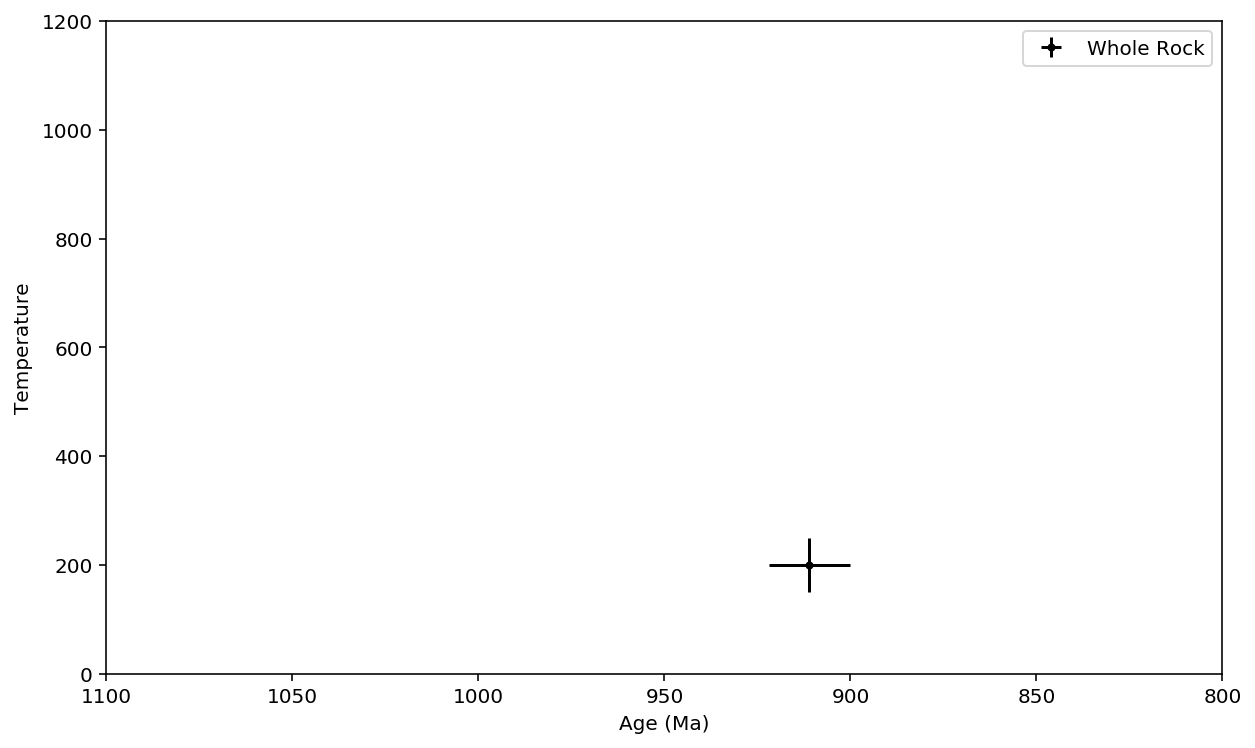

In [126]:
plt.figure(figsize=(10, 6))
for i in Palmer1979a_ages.Age_Material.unique():
    closure_temp_bounds = closure_temp_bounds_dict[i]
    this_material = Palmer1979a_ages[Palmer1979a_ages['Age_Material'] == i]
    plt.errorbar(this_material['Age'], np.full(len(this_material['Age']),closure_temp_bounds[0]), closure_temp_bounds[1], this_material['Error_Plus'], fmt='.',
                 color=color_dict[i], ls='None', label=i)
plt.ylabel('Temperature')
plt.xlabel('Age (Ma)')
plt.gca().invert_xaxis()
plt.ylim(0, 1200)
plt.xlim(1100, 800)
plt.legend()
plt.show()

# Get Elzevir Terrane records

- Hanes 1988 muscovite and k-spar

## Hanes 1988, Cosca 1991a, Cosca 1992a

In [177]:
Hanes1988a_ages = pd.read_csv('../data/thermochron_compilation/Hanes1988a.csv')
Cosca1991a_ages = pd.read_csv('../data/thermochron_compilation/Cosca1991a.csv')
Cosca1992a_ages = pd.read_csv('../data/thermochron_compilation/Cosca1992a.csv')

Elzevir_ages = pd.concat([Hanes1988a_ages, Cosca1991a_ages, Cosca1992a_ages])
Elzevir_ages = Elzevir_ages[Elzevir_ages['Geological_Info'].str.contains('Elzevir')]
Elzevir_ages = Elzevir_ages[~Elzevir_ages['Age_Material'].str.contains('Allanite|Garnet|Zircon|Phlogopite')].reset_index(drop=1)

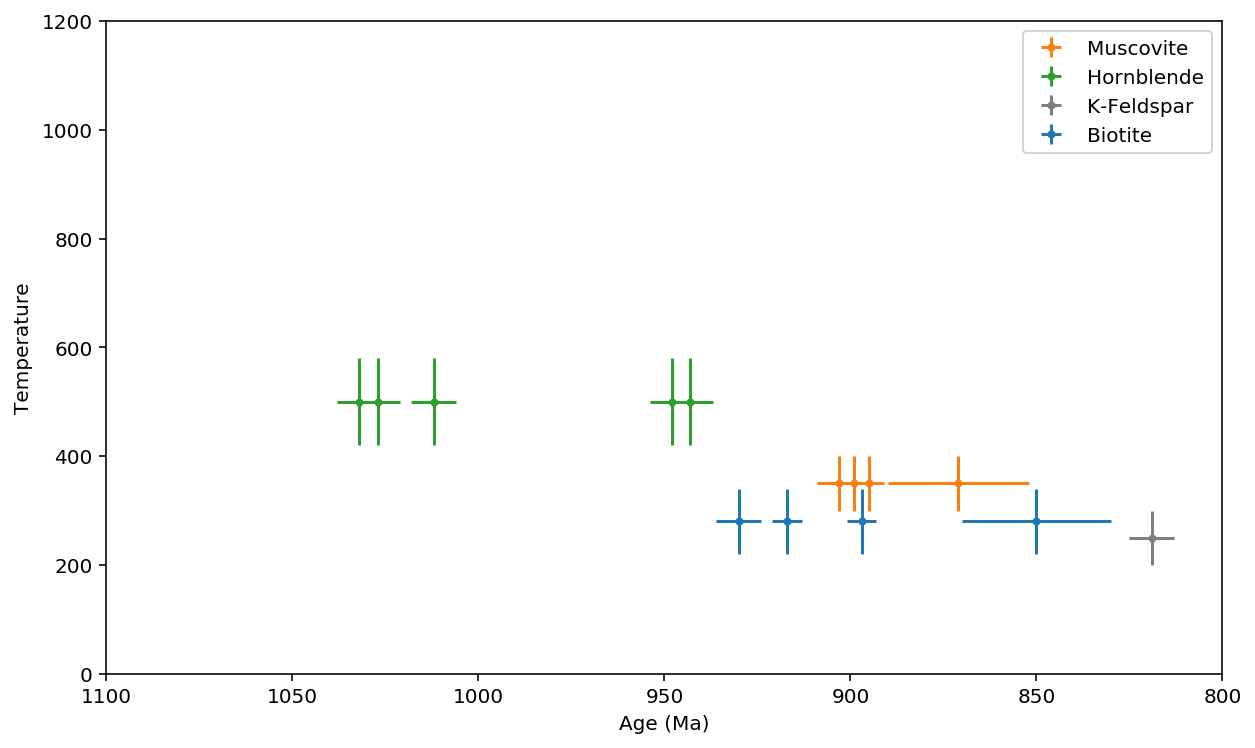

In [178]:
plt.figure(figsize=(10, 6))
for i in Elzevir_ages.Age_Material.unique():
    closure_temp_bounds = closure_temp_bounds_dict[i]
    this_material = Elzevir_ages[Elzevir_ages['Age_Material'] == i]
    plt.errorbar(this_material['Age'], np.full(len(this_material['Age']),closure_temp_bounds[0]), closure_temp_bounds[1], this_material['Error_Plus'], fmt='.',
                 color=color_dict[i], ls='None', label=i)
plt.ylabel('Temperature')
plt.xlabel('Age (Ma)')
plt.gca().invert_xaxis()
plt.ylim(0, 1200)
plt.xlim(1100, 800)
plt.legend()
plt.show()

In [55]:
Elzevir_records = study_summary[study_summary['Geological_Info'].str.contains('Elzevir|Elsevier')]
Elzevir_records = Elzevir_records[~Elzevir_records['Age_Material'].str.contains('Allanite|Garnet|Zircon|K-Feldspar|Phlogopite')]
Elzevir_records.head()

,Sample_No,Age,Error_Plus,Error_Minus,Age_Method,Age_Interpretation,Age_Note,Age_Material,Age_Technique,Age_Qualifier,Geological_Province,Province,Latitude,Longitude,Location,Geological_Info,Rock_Type,Rock_Description,References
15,HL86-3,850.0,20.0,20.0,Ar/Ar,Cooling,amphibolite,Biotite,Ar Furnace-Fusion,Estimate,Grenville Province,ON,44.61256,-77.16640,NE of Madoc. Location approximate,"Central Metasedimentary Belt, Elzevir terrane ...",Metamorphic,amphibolite,"Cosca, M.A., Sutter, J.F. and Essene, E.J., 19..."
33,HL86-2B,895.0,4.0,4.0,Ar/Ar,Cooling,gneiss,Muscovite,Ar Furnace-Step,Direct,Grenville Province,ON,44.64589,-77.09972,NE of Madoc. Location approximate,"Central Metasedimentary Belt, Elzevir terrane ...",Metamorphic,gneiss,"Cosca, M.A., Sutter, J.F. and Essene, E.J., 19..."
38,HL86-2B,897.0,4.0,4.0,Ar/Ar,Cooling,gneiss,Biotite,Ar Furnace-Fusion,Estimate,Grenville Province,ON,44.64589,-77.09972,NE of Madoc. Location approximate,"Central Metasedimentary Belt, Elzevir terrane ...",Metamorphic,gneiss,"Cosca, M.A., Sutter, J.F. and Essene, E.J., 19..."
51,HL86-5,903.0,6.0,6.0,Ar/Ar,Cooling,schist,Muscovite,Ar Furnace-Step,Direct,Grenville Province,ON,44.54173,-77.31640,Location approximate,"Central Metasedimentary Belt, Elzevir terrane ...",Metamorphic,schist,"Cosca, M.A., Sutter, J.F. and Essene, E.J., 19..."
85,HL86-2C,917.0,4.0,4.0,Ar/Ar,Cooling,gneiss,Biotite,Ar Furnace-Fusion,Estimate,Grenville Province,ON,44.64589,-77.09972,NE of Madoc. Location approximate,"Central Metasedimentary Belt, Elzevir terrane ...",Metamorphic,gneiss,"Cosca, M.A., Sutter, J.F. and Essene, E.J., 19..."


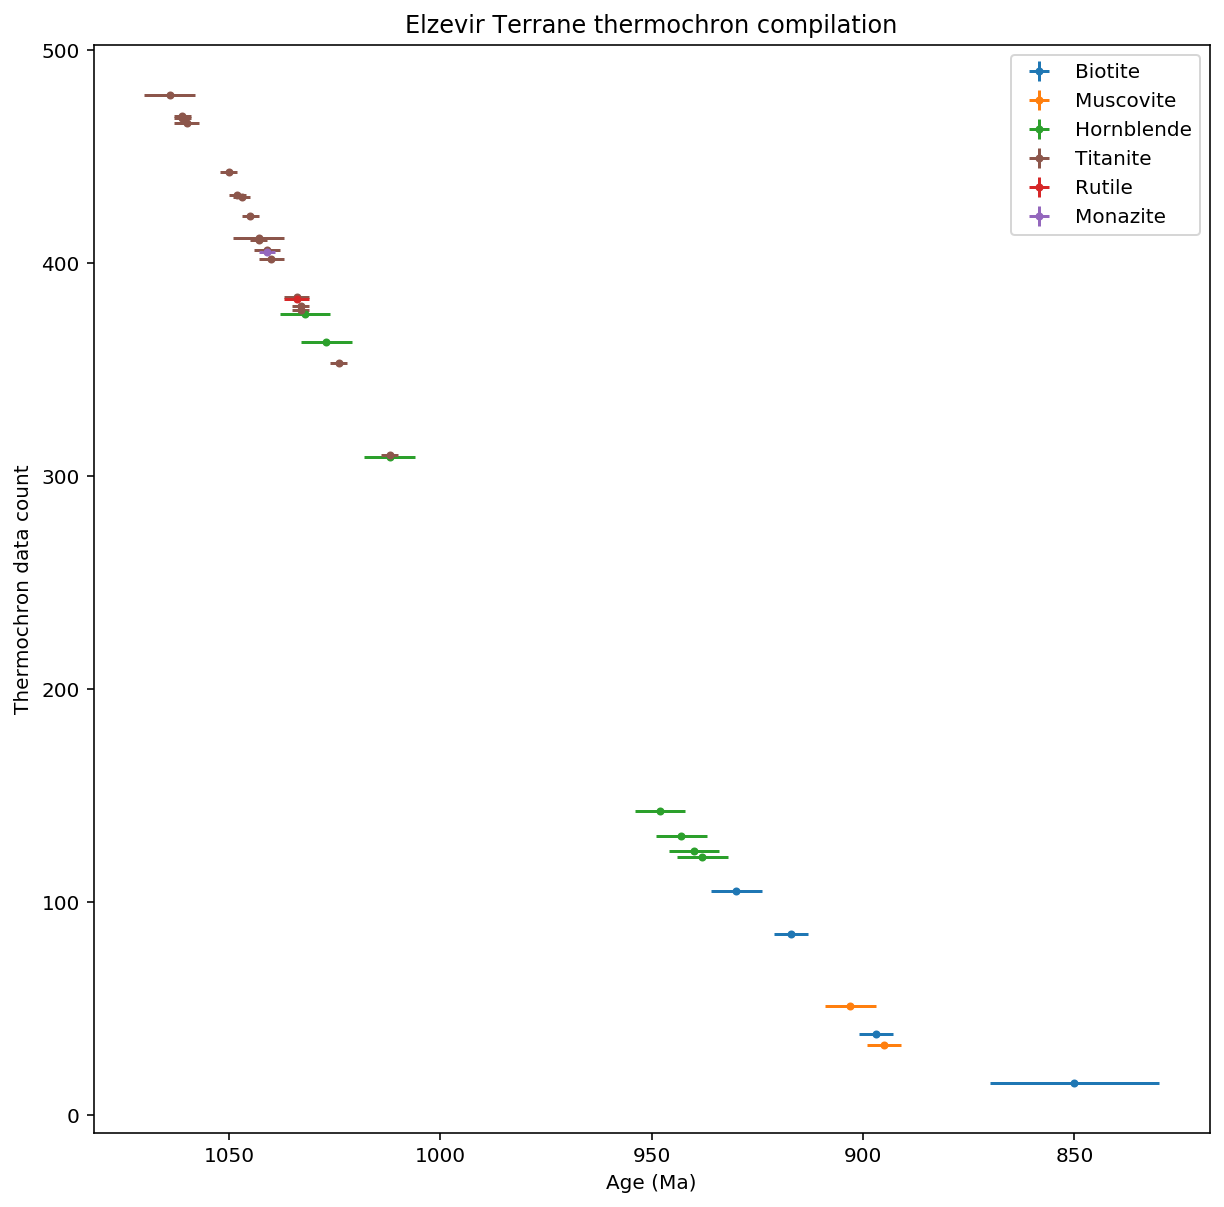

In [56]:
plt.figure(figsize=(10, 10))
for i in range(len(Elzevir_records.Age_Material.unique())):
    this_material = Elzevir_records[Elzevir_records['Age_Material'] == Elzevir_records.Age_Material.unique()[i]]
    plt.errorbar(this_material['Age'], this_material.index, 0, this_material['Error_Plus'], fmt='.',
                 color=color_dict[Elzevir_records.Age_Material.unique()[i]], ls='None', label=Elzevir_records.Age_Material.unique()[i])
plt.title('Elzevir Terrane thermochron compilation')
plt.ylabel('Thermochron data count')
plt.xlabel('Age (Ma)')
plt.gca().invert_xaxis()
plt.legend()
plt.show()

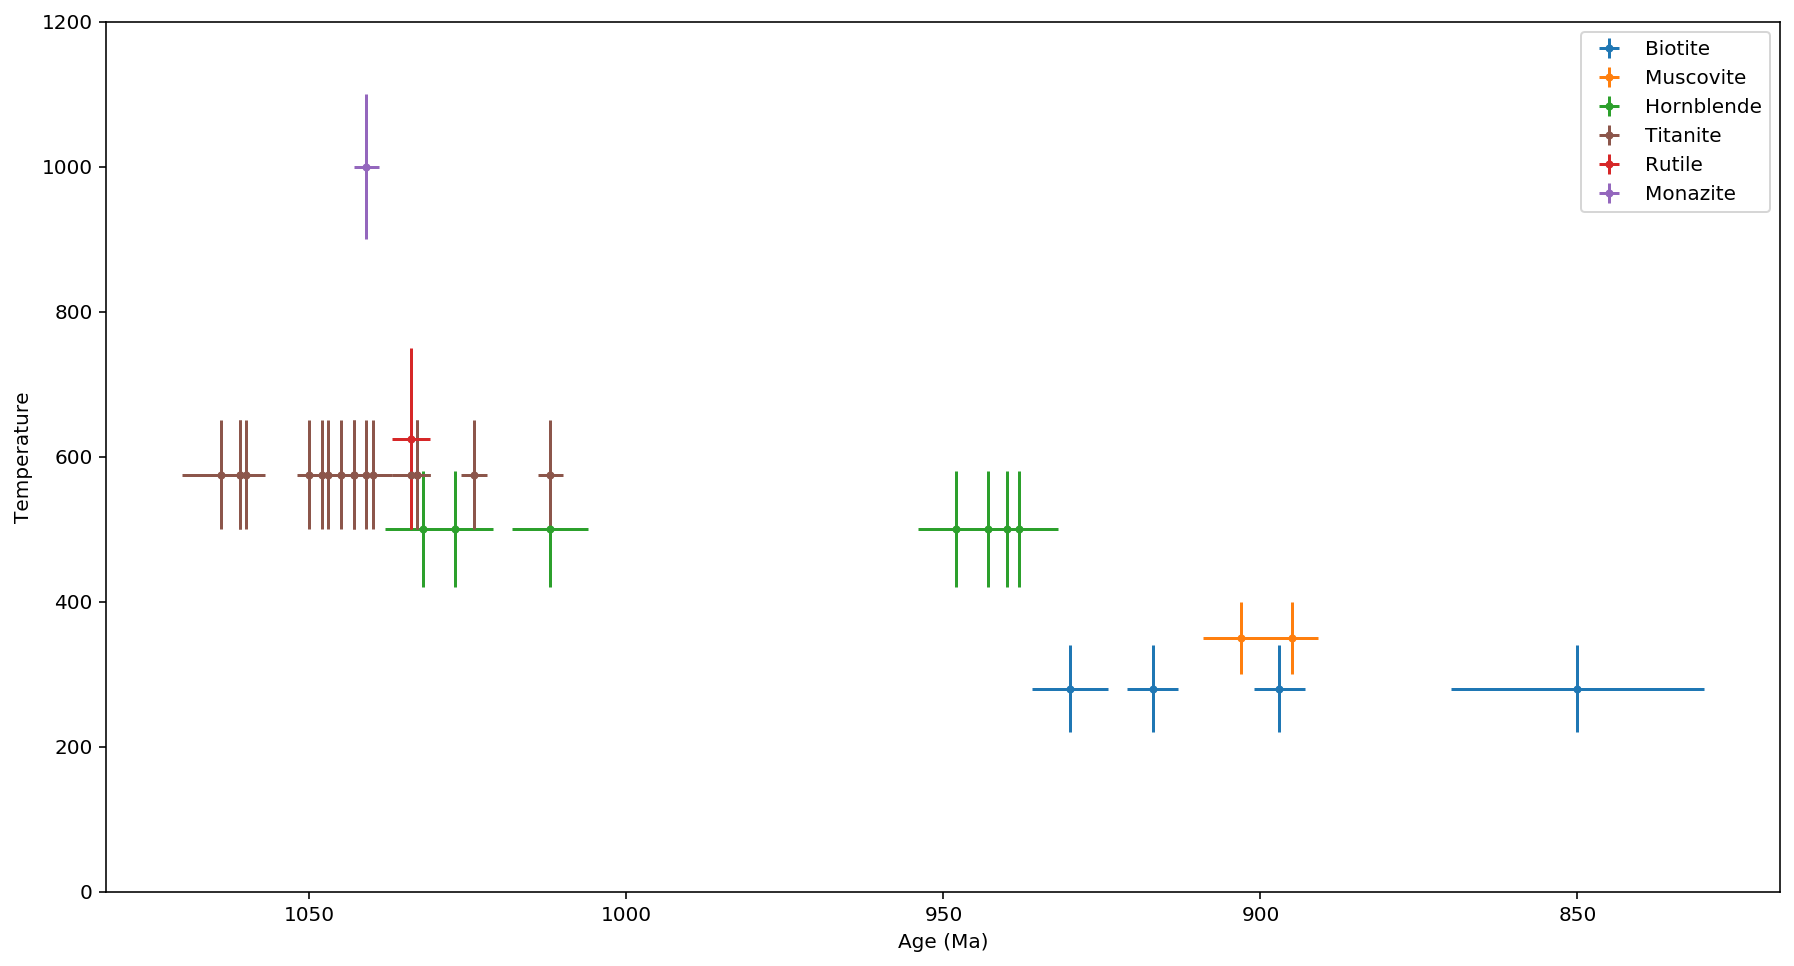

In [68]:
plt.figure(figsize=(15, 8))
for i in Elzevir_records.Age_Material.unique():
    closure_temp_bounds = closure_temp_bounds_dict[i]
    this_material = Elzevir_records[Elzevir_records['Age_Material'] == i]
    plt.errorbar(this_material['Age'], np.full(len(this_material['Age']),closure_temp_bounds[0]), closure_temp_bounds[1], this_material['Error_Plus'], fmt='.',
                 color=color_dict[i], ls='None', label=i)
plt.ylabel('Temperature')
plt.xlabel('Age (Ma)')
plt.gca().invert_xaxis()
plt.ylim(0, 1200)
plt.legend()
plt.show()

# Get Mazinaw Terrane records

## Busch 1996b, Corfu 1995a, 

In [170]:
Busch1996b_ages = pd.read_csv('../data/thermochron_compilation/Busch1996b.csv')
Busch1996b_Mazinaw_ages = Busch1996b_ages[Busch1996b_ages['Geological_Info'].str.contains('Mazinaw')]
Corfu1995a_ages = pd.read_csv('../data/thermochron_compilation/Corfu1995a.csv')
Corfu1995a_ages = Corfu1995a_ages[~Corfu1995a_ages['Sample_No'].str.contains('C-93-9')]

Mazinaw_ages = pd.concat([Busch1996b_Mazinaw_ages, Corfu1995a_ages, ]).reset_index(drop=1)
Mazinaw_ages = Mazinaw_ages[~Mazinaw_ages['Age_Material'].str.contains('Allanite|Garnet|Zircon|Phlogopite|Monazite')]

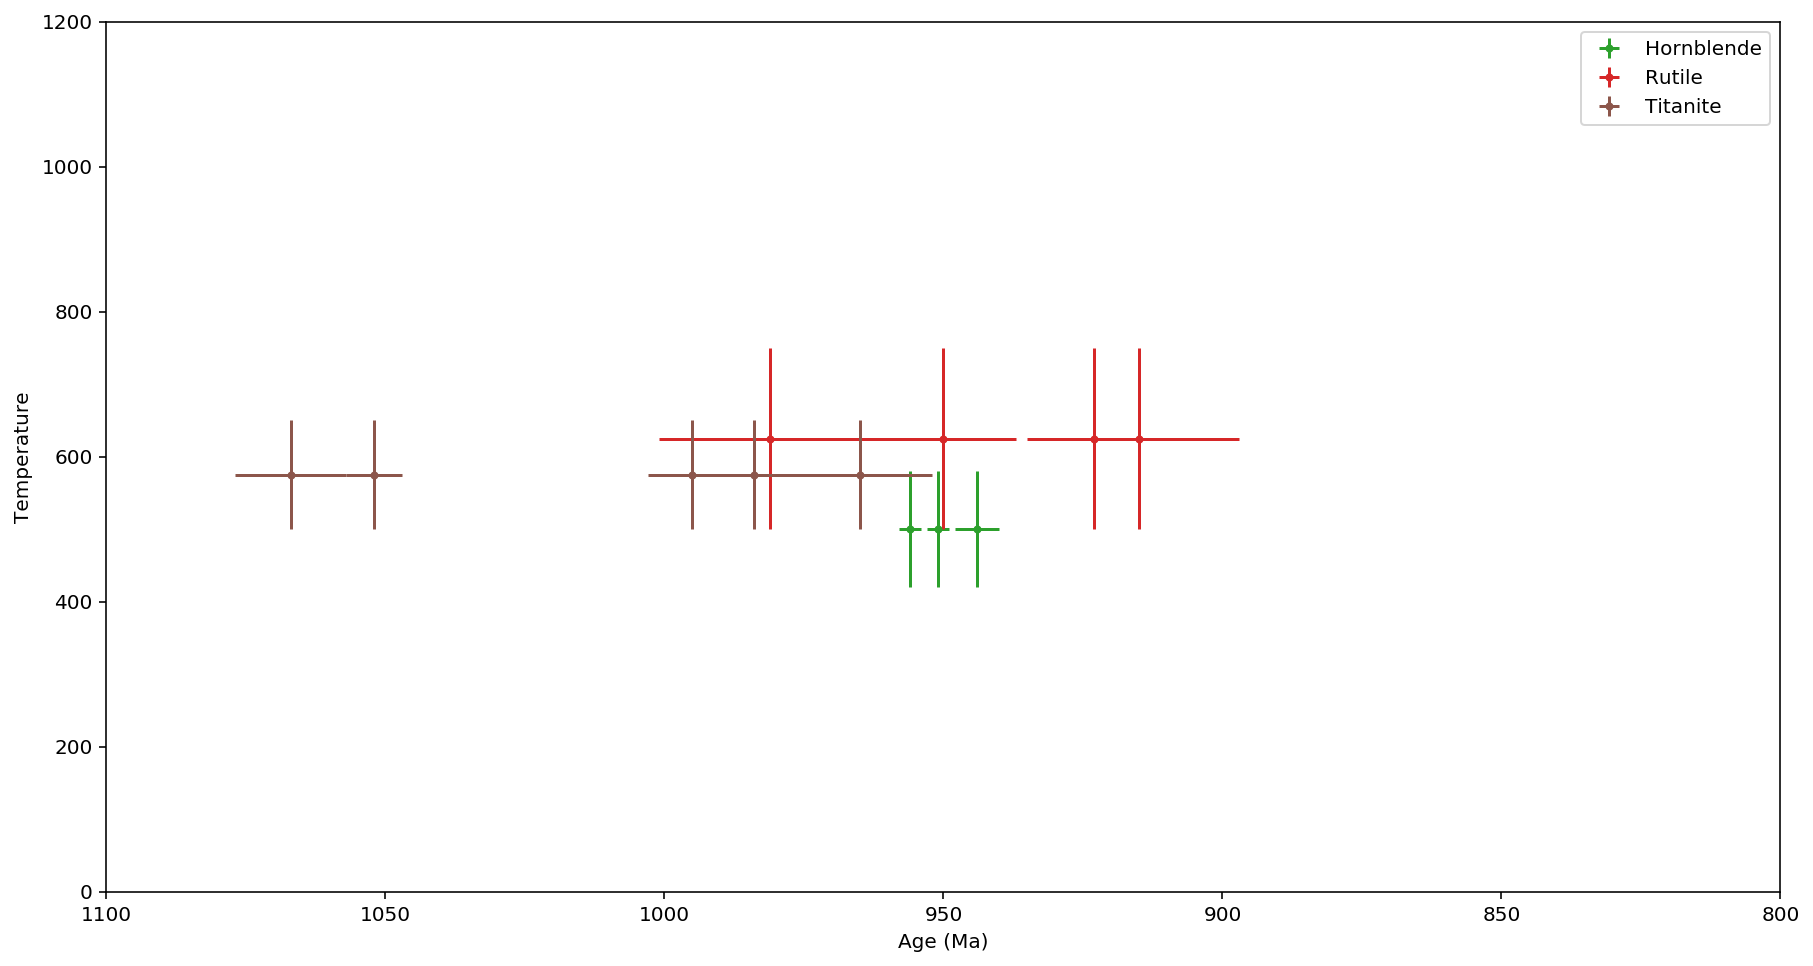

In [171]:
plt.figure(figsize=(15, 8))
for i in Mazinaw_ages.Age_Material.unique():
    closure_temp_bounds = closure_temp_bounds_dict[i]
    this_material = Mazinaw_ages[Mazinaw_ages['Age_Material'] == i]
    plt.errorbar(this_material['Age'], np.full(len(this_material['Age']),closure_temp_bounds[0]), closure_temp_bounds[1], this_material['Error_Plus'], fmt='.',
                 color=color_dict[i], ls='None', label=i)
plt.ylabel('Temperature')
plt.xlabel('Age (Ma)')
plt.gca().invert_xaxis()
plt.ylim(0, 1200)
plt.xlim(1100, 800)
plt.legend()
plt.show()

In [159]:
Mazinaw_records = study_summary[study_summary['Geological_Info'].str.contains('Mazinaw')]
Mazinaw_records = Mazinaw_records[~Mazinaw_records['Age_Material'].str.contains('Allanite|Garnet|Zircon|K-Feldspar|Phlogopite')]
Mazinaw_records.References.unique()

array(['Corfu, F. and Easton, R.M., 1995. U-Pb geochronology of the Mazinaw Terrane, an imbricate segment of the Central Metasedimentary Belt, Grenville Province, Ontario; Canadian Journal of Earth Sciences, v. 32, p. 959-96',
       'Cosca, M.A., Sutter, J.F. and Essene, E.J., 1991. Late metamorphic cooling and erosion history of the Ontario Grenville Province: constraints from 40Ar/39Ar thermochronometry; Tectonics, v. 10, p. 959-97',
       'Busch, J.P., van der Pljuim, B.A., Hall, C.M. and Essene, E.J., 1996. Listric normal faulting during postorogenic extension revealed by 40Ar/39Ar thermochronology near the Robertson Lake shear zone, Grenville orogen, Canada; Tectonics, v. 15, p. 387-40',
       'Cureton, J.S., van der Pluijm, B.A. and Essene, E.J., 1997. Nature of the Elzevir-Mazinaw domain boundary, Grenville Orogen, Ontario; Canadian Journal of Earth Sciences, v. 34, p. 976-99'],
      dtype=object)

# Get Sharbot Lake Terrane records

## Busch 1996a, b, Cosca 1991a, Cosca 1992a

- RVL20 sample is from the Lavant gabbro which was interpreted to not have experienced metamorphism in the hanging wall of the RLSZ
- MTG175 has hornblende age younger than mica age, which could be due to biotite Ar excess issue
- Cosca SSA-14 and HL86-7 are suspicious hornblende and biotite data

In [203]:
Busch1996a_ages = pd.read_csv('../data/thermochron_compilation/Busch1996a.csv')
Busch1996b_ages = pd.read_csv('../data/thermochron_compilation/Busch1996b.csv')
Cosca1991a_ages = pd.read_csv('../data/thermochron_compilation/Cosca1991a.csv')
Cosca1992a_ages = pd.read_csv('../data/thermochron_compilation/Cosca1992a.csv')

Sharbot_ages = pd.concat([Busch1996a_ages, Busch1996b_ages, Cosca1991a_ages, Cosca1992a_ages])
Sharbot_ages = Sharbot_ages[Sharbot_ages['Geological_Info'].str.contains('Sharbot')]
Sharbot_ages = Sharbot_ages[~Sharbot_ages['Sample_No'].str.contains('RVL20A|MTG175|SSA-14|HL86-7')]
Sharbot_ages = Sharbot_ages[~Sharbot_ages['Age_Material'].str.contains('Allanite|Garnet|Zircon|Phlogopite')].reset_index(drop=1)
# Sharbot_ages.head()

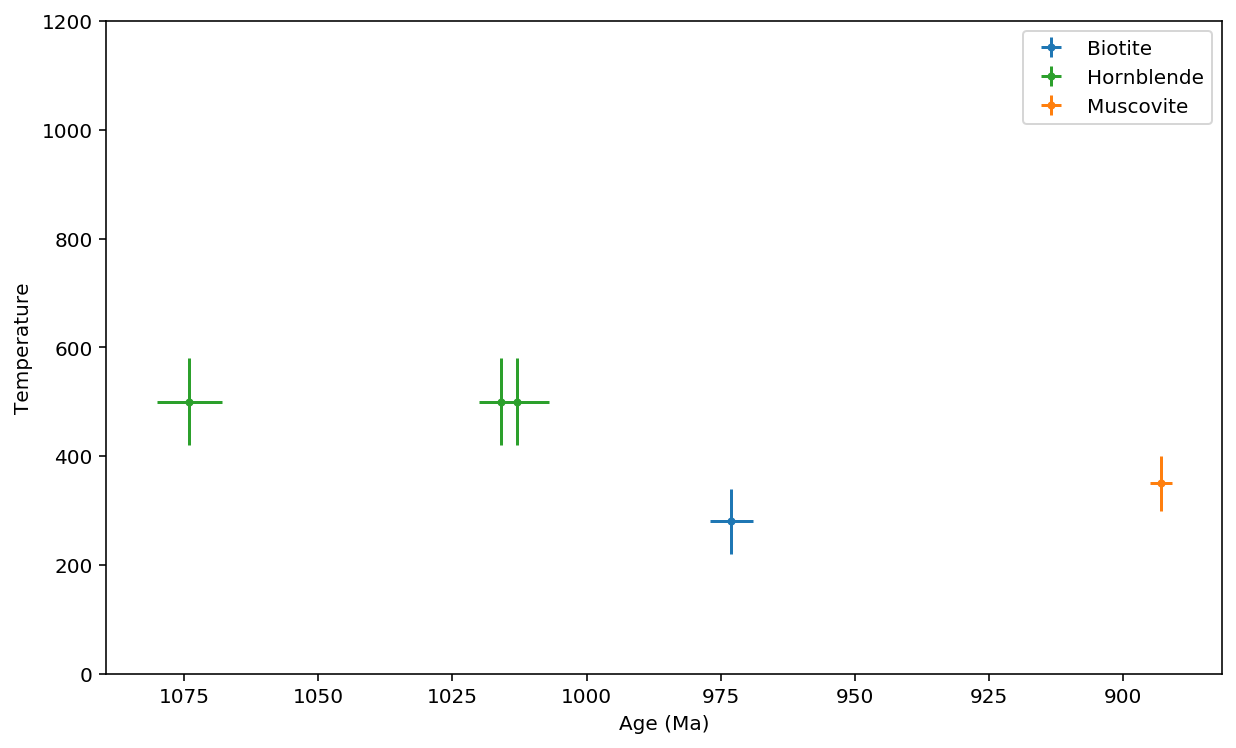

In [204]:
plt.figure(figsize=(10, 6))
for i in Sharbot_ages.Age_Material.unique():
    closure_temp_bounds = closure_temp_bounds_dict[i]
    this_material = Sharbot_ages[Sharbot_ages['Age_Material'] == i]
    plt.errorbar(this_material['Age'], np.full(len(this_material['Age']),closure_temp_bounds[0]), closure_temp_bounds[1], this_material['Error_Plus'], fmt='.',
                 color=color_dict[i], ls='None', label=i)
plt.ylabel('Temperature')
plt.xlabel('Age (Ma)')
plt.gca().invert_xaxis()
plt.ylim(0, 1200)
plt.legend()
plt.show()

In [75]:
Sharbot_Frontenac_records = study_summary[study_summary['Geological_Info'].str.contains('Sharbot|Frontenac')]
Sharbot_Frontenac_records = Sharbot_Frontenac_records[~Sharbot_Frontenac_records['Age_Material'].str.contains('Allanite|Garnet|Zircon|K-Feldspar|Phlogopite|Thorianite|Uranianite')]
Sharbot_Frontenac_records.head()

,Sample_No,Age,Error_Plus,Error_Minus,Age_Method,Age_Interpretation,Age_Note,Age_Material,Age_Technique,Age_Qualifier,Geological_Province,Province,Latitude,Longitude,Location,Geological_Info,Rock_Type,Rock_Description,References
10,JMV-1,821.0,0.0,0.0,U/Pb,Igneous Crystallization,Ore,Titanite,TIMS,Uncertain,Grenville Province,QC,46.58338,-75.49965,N of Mont Laurier. Coordinates approximate.,Frontenac - Adirondack Lowlands terrane - unknown,Hydrothermal,Ore,"Rimsaite, J., 1985. Petrography, petrochemistr..."
28,SRD104,893.0,2.0,2.0,Ar/Ar,Cooling,pegmatite mylonite,Muscovite,Laser-Step,Direct,Grenville Province,ON,44.94568,-76.67643,Robertson Lake Shear Zone,Sharbot Lake Domain - Robertson Lake Shear Zone,Plutonic,pegmatite mylonite,"Busch, J.P., van der Pljuim, B.A., Hall, C.M. ..."
97,HL86-1,925.0,6.0,6.0,Ar/Ar,Cooling,amphibolite,Hornblende,Ar Furnace-Step,Direct,Grenville Province,ON,44.69173,-76.99972,NE of Kingston. Location approximate,"Central Metasedimentary Belt, Frontenac terran...",Metamorphic,amphibolite,"Cosca, M.A., Sutter, J.F. and Essene, E.J., 19..."
175,FA86E-6,967.0,6.0,6.0,Ar/Ar,Cooling,amphibolite,Biotite,Ar Furnace-Fusion,Estimate,Grenville Province,ON,44.44589,-76.68304,Location approximate,"Central Metasedimentary Belt, Frontenac terran...",Metamorphic,amphibolite,"Cosca, M.A., Sutter, J.F. and Essene, E.J., 19..."
315,FA86-10,1013.0,6.0,6.0,Ar/Ar,Cooling,amphibolite,Hornblende,Ar Furnace-Step,Direct,Grenville Province,ON,44.76673,-76.77471,Midway between Ottawa and Kingston. Location a...,"Central Metasedimentary Belt, Frontenac terran...",Metamorphic,amphibolite,"Cosca, M.A., Sutter, J.F. and Essene, E.J., 19..."


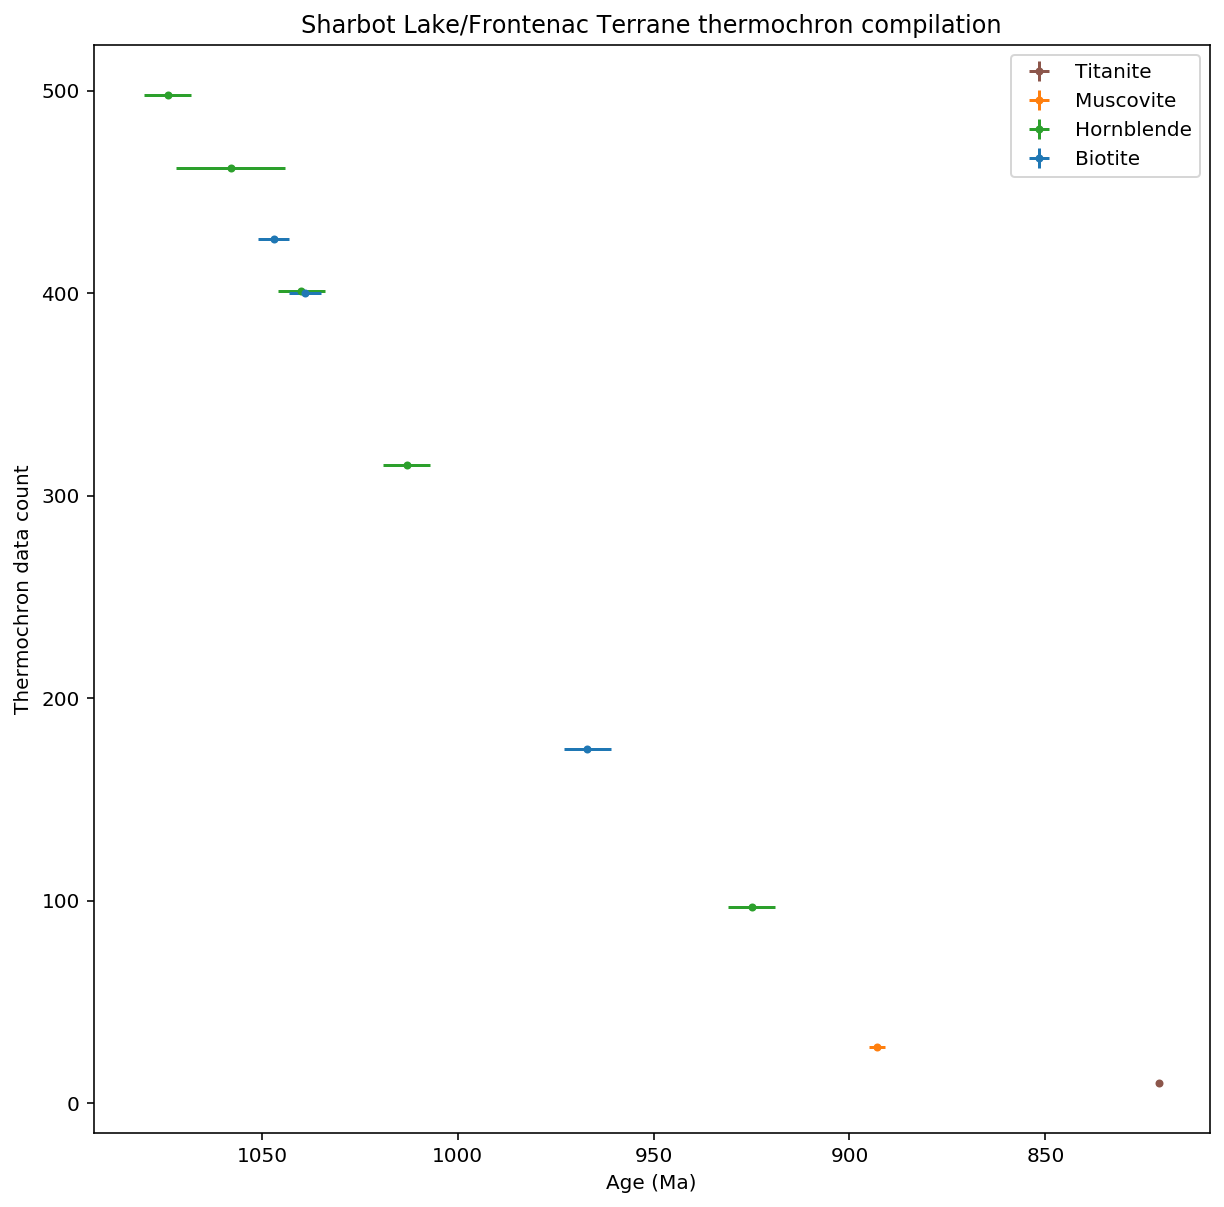

In [76]:
plt.figure(figsize=(10, 10))
for i in range(len(Sharbot_Frontenac_records.Age_Material.unique())):
    this_material = Sharbot_Frontenac_records[Sharbot_Frontenac_records['Age_Material'] == Sharbot_Frontenac_records.Age_Material.unique()[i]]
    plt.errorbar(this_material['Age'], this_material.index, 0, this_material['Error_Plus'], fmt='.',
                 color=color_dict[Sharbot_Frontenac_records.Age_Material.unique()[i]], ls='None', label=Sharbot_Frontenac_records.Age_Material.unique()[i])
plt.title('Sharbot Lake/Frontenac Terrane thermochron compilation')
plt.ylabel('Thermochron data count')
plt.xlabel('Age (Ma)')
plt.gca().invert_xaxis()
plt.legend()
plt.show()

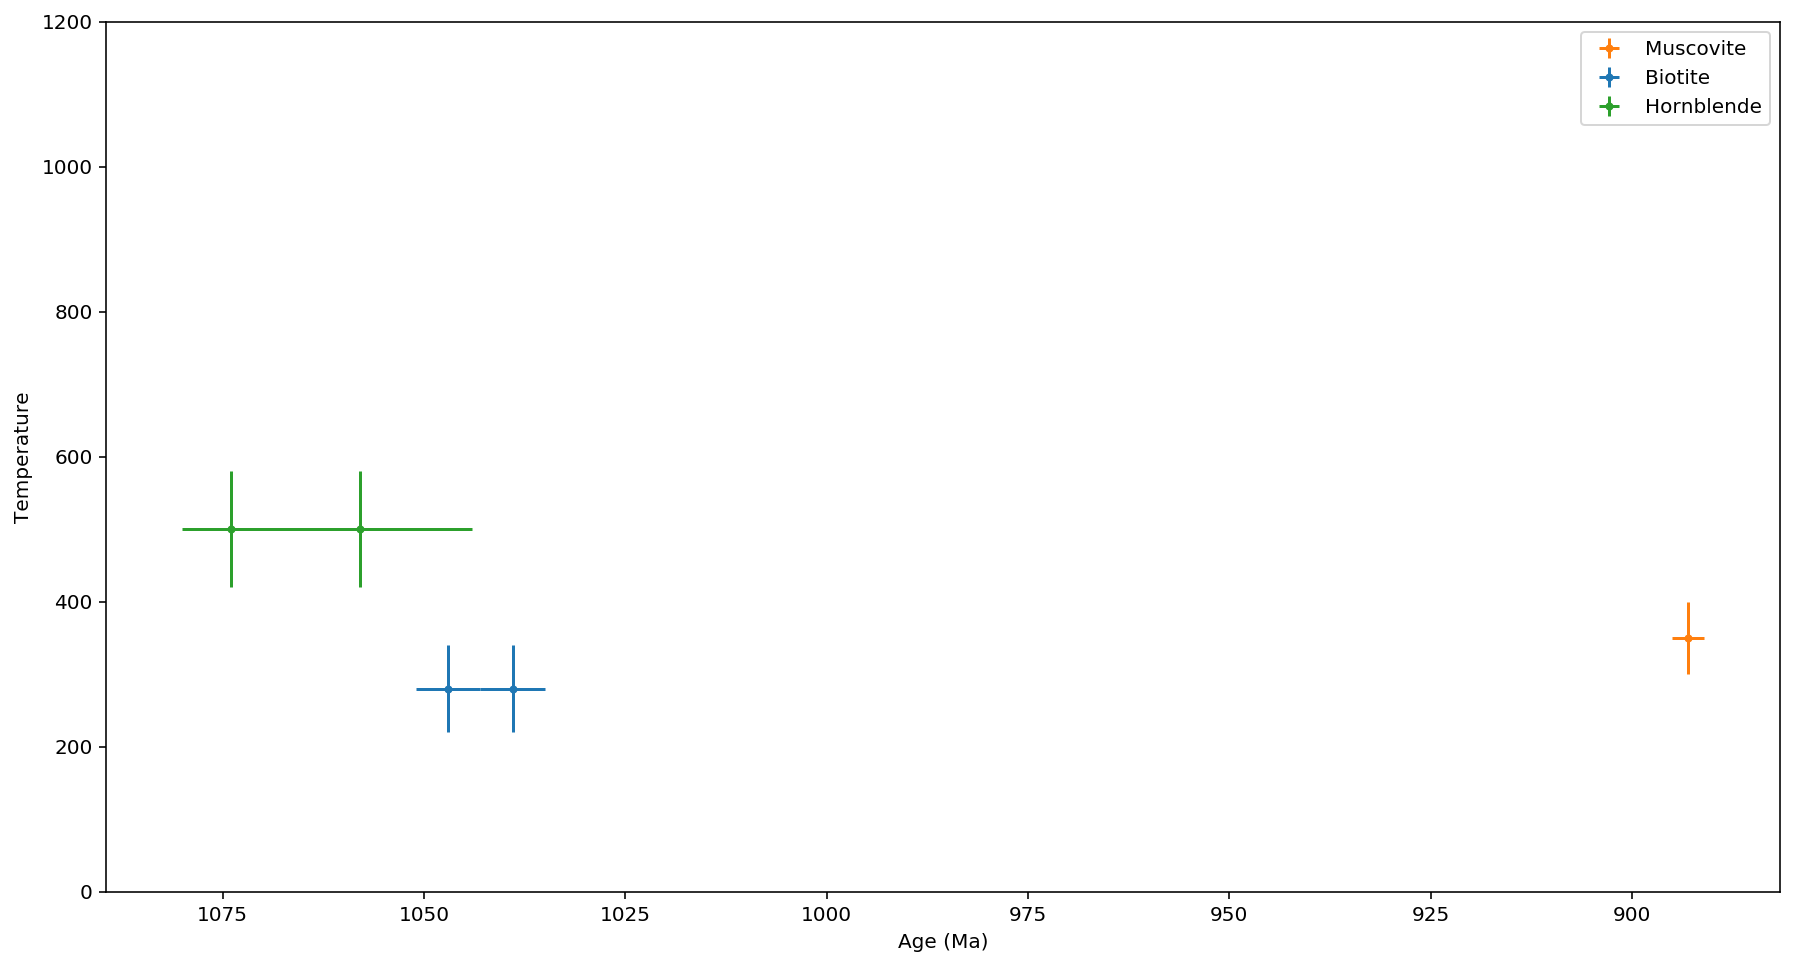

In [77]:
plt.figure(figsize=(15, 8))
for i in Sharbot_records.Age_Material.unique():
    closure_temp_bounds = closure_temp_bounds_dict[i]
    this_material = Sharbot_records[Sharbot_records['Age_Material'] == i]
    plt.errorbar(this_material['Age'], np.full(len(this_material['Age']),closure_temp_bounds[0]), closure_temp_bounds[1], this_material['Error_Plus'], fmt='.',
                 color=color_dict[i], ls='None', label=i)
plt.ylabel('Temperature')
plt.xlabel('Age (Ma)')
plt.gca().invert_xaxis()
plt.ylim(0, 1200)
plt.legend()
plt.show()

# Get Frontenac Terrane records

## Cosca 1991a, Cosca 1992a

In [205]:
Cosca1991a_ages = pd.read_csv('../data/thermochron_compilation/Cosca1991a.csv')
Cosca1992a_ages = pd.read_csv('../data/thermochron_compilation/Cosca1992a.csv')

Fronteac_ages = pd.concat([Cosca1991a_ages, Cosca1992a_ages])

Fronteac_ages = Fronteac_ages[Fronteac_ages['Geological_Info'].str.contains('Frontenac')]
Fronteac_ages = Fronteac_ages[~Fronteac_ages['Sample_No'].str.contains('SSA-14|HL86-7')]
Fronteac_ages = Fronteac_ages[~Fronteac_ages['Age_Material'].str.contains('Allanite|Garnet|Zircon|Phlogopite|Monazite')].reset_index(drop=1)

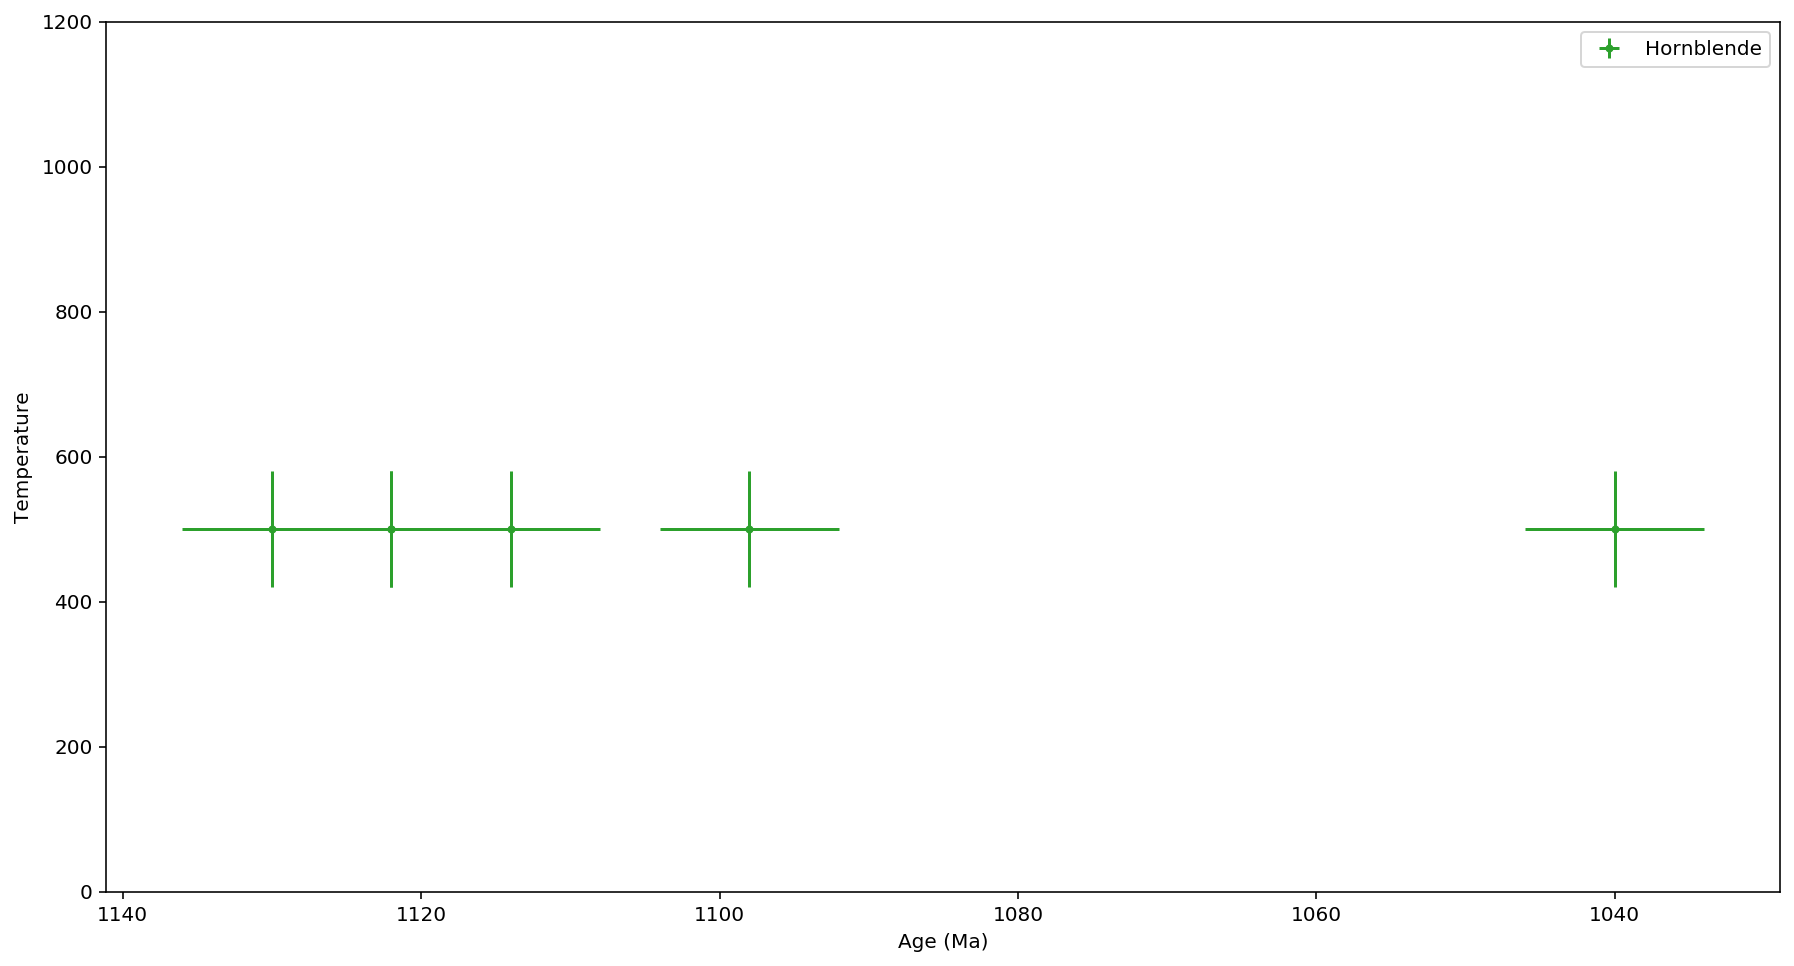

In [206]:
plt.figure(figsize=(15, 8))
for i in Fronteac_ages.Age_Material.unique():
    closure_temp_bounds = closure_temp_bounds_dict[i]
    this_material = Fronteac_ages[Fronteac_ages['Age_Material'] == i]
    plt.errorbar(this_material['Age'], np.full(len(this_material['Age']),closure_temp_bounds[0]), closure_temp_bounds[1], this_material['Error_Plus'], fmt='.',
                 color=color_dict[i], ls='None', label=i)
plt.ylabel('Temperature')
plt.xlabel('Age (Ma)')
plt.gca().invert_xaxis()
plt.ylim(0, 1200)
plt.legend()
plt.show()

## Load Adirondack lowlands ages

In [7]:
Adirondack_lowlands_ages = pd.read_csv('../data/thermochron_compilation/Adirondack_lowlands.csv')
Adirondack_lowlands_ages = Adirondack_lowlands_ages[Adirondack_lowlands_ages['Age'] < 1090]
Adirondack_lowlands_ages = Adirondack_lowlands_ages[Adirondack_lowlands_ages['Age_Material'] != 'Garnet']
Adirondack_lowlands_ages = Adirondack_lowlands_ages.sort_values(by=['Age_Material', 'Age']).reset_index(drop=1)
Adirondack_lowlands_ages.head()

,Sample_No,Age,Error_Plus,Error_Minus,Age_Method,Age_Interpretation,Age_Note,Age_Material,Age_Technique,Age_Qualifier,Geological_Province,Province,Latitude,Longitude,Location,Geological_Info,Rock_Type,Rock_Description,References
0,SE596-49,895.0,1.0,1.0,Ar/Ar,Cooling,Plateau Age,Biotite,Laser-Step,Direct,Grenville Province,NY,44.39000,-75.19000,"On Rt 87, north of Dana Hill Rd. 1.9 miles sou...",Carthage-Colton shear zone,Metamorphic,amphibolite,"Streepey, M.M., van der Pluijm, B.A., Essene, ..."
1,AL97-12a,896.0,3.0,3.0,Ar/Ar,Cooling,NaN,Biotite,Laser-Step,NaN,Grenville Province,NY,44.44443,-75.18825,Adirondack Lowlands,Adirondack Lowlands,Metamorphic,Popple Hill gneiss,"Dahl, P.S., Pomfrey, M.E., and Foland, K.A., 2..."
2,AL97-31,898.0,3.0,3.0,Ar/Ar,Cooling,NaN,Biotite,Laser-Step,NaN,Grenville Province,NY,44.19778,-75.28213,Adirondack Lowlands,Adirondack Lowlands,Plutonic,Hermon granite,"Dahl, P.S., Pomfrey, M.E., and Foland, K.A., 2..."
3,PP596-60,899.0,1.0,1.0,Ar/Ar,Cooling,Plateau Age,Biotite,Laser-Step,Direct,Grenville Province,NY,44.53000,-75.04000,1 mile southwest of Pierrepont on Rt. 2. Outcr...,Carthage-Colton shear zone,Metamorphic,garnet biotite sillmanite schist,"Streepey, M.M., van der Pluijm, B.A., Essene, ..."
4,AL98-43,901.0,3.0,3.0,Ar/Ar,Cooling,NaN,Biotite,Laser-Step,NaN,Grenville Province,NY,44.34945,-75.27223,Adirondack Lowlands,Adirondack Lowlands,Plutonic,Hermon granite,"Dahl, P.S., Pomfrey, M.E., and Foland, K.A., 2..."


In [8]:
Adirondack_lowlands_ages.Age_Material.unique()

array(['Biotite', 'Hornblende', 'Rutile', 'Titanite'], dtype=object)

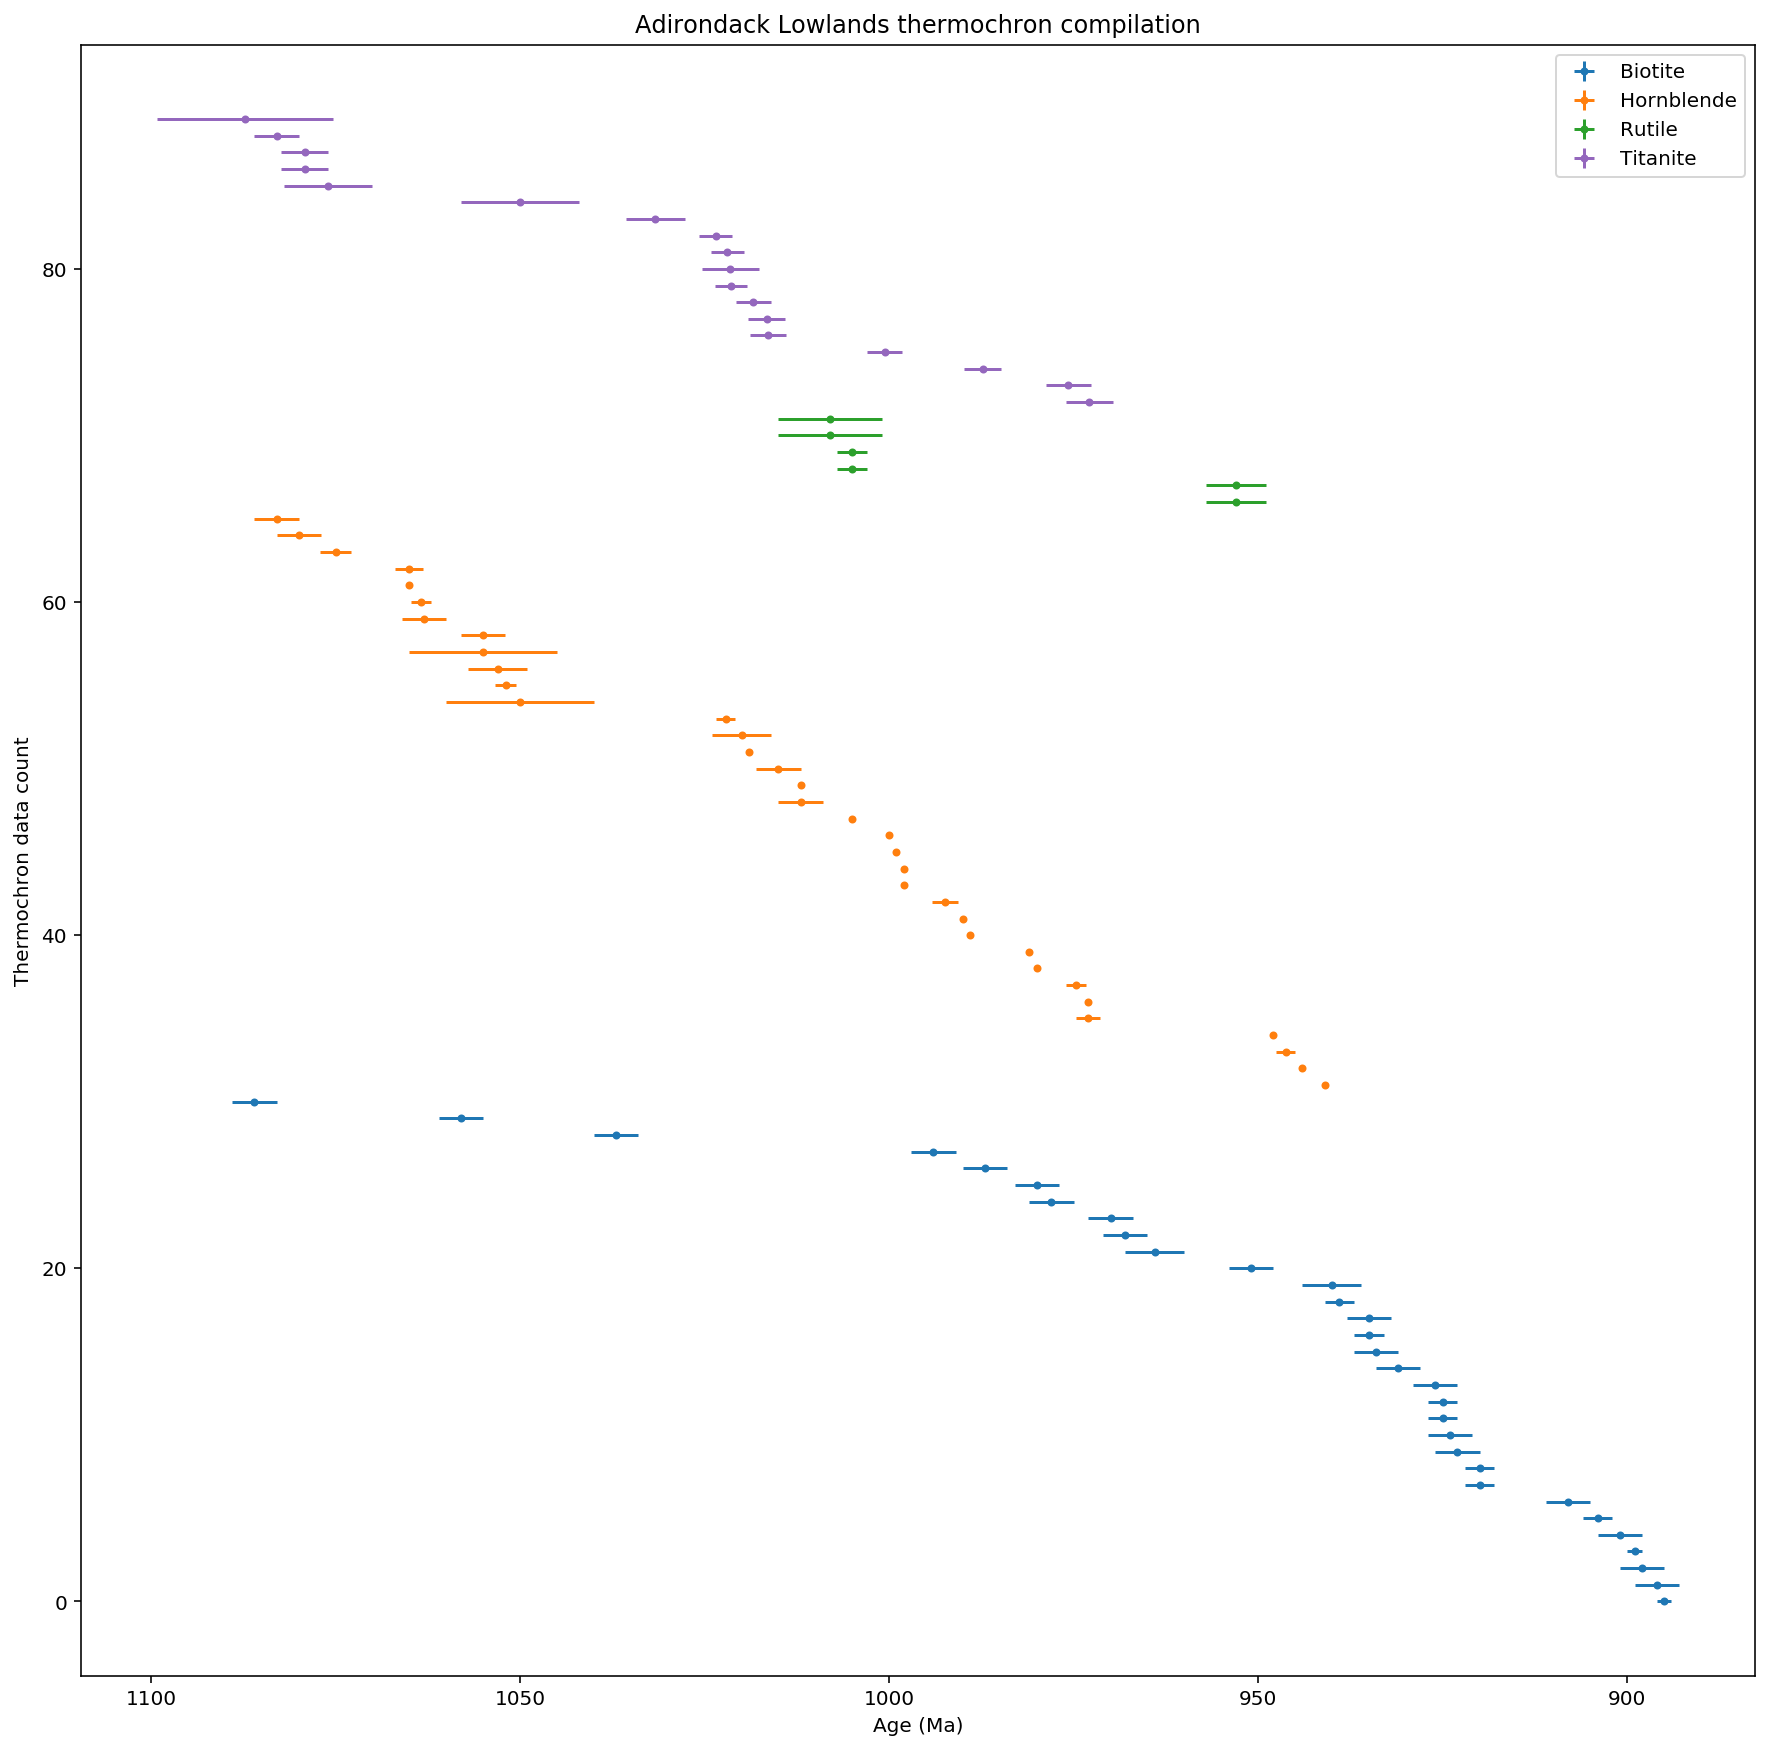

In [9]:
plt.figure(figsize=(15, 15))
for i in range(len(Adirondack_lowlands_ages.Age_Material.unique())):
    this_material = Adirondack_lowlands_ages[Adirondack_lowlands_ages['Age_Material'] == Adirondack_lowlands_ages.Age_Material.unique()[i]]
    plt.errorbar(this_material['Age'], this_material.index, 0, this_material['Error_Plus'], fmt='.',
                 color=color_dict[Adirondack_lowlands_ages.Age_Material.unique()[i]], ls='None', label=Adirondack_lowlands_ages.Age_Material.unique()[i])
plt.title('Adirondack Lowlands thermochron compilation')
plt.ylabel('Thermochron data count')
plt.xlabel('Age (Ma)')
plt.gca().invert_xaxis()
plt.legend()

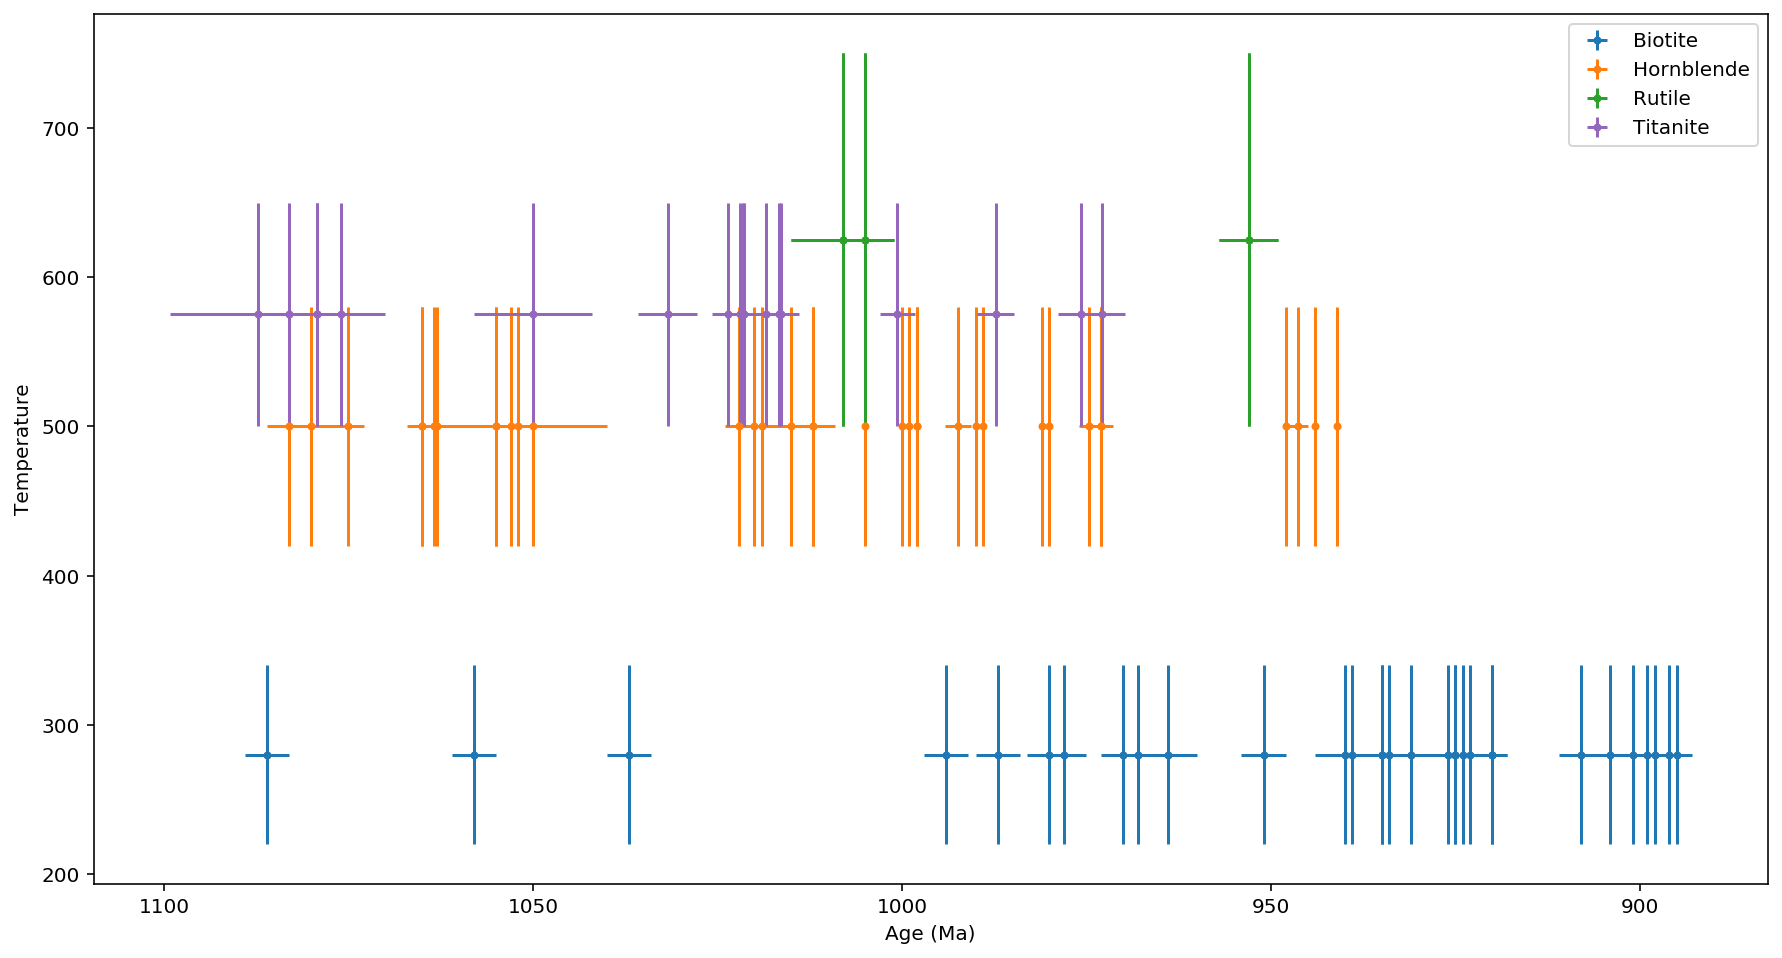

In [10]:
plt.figure(figsize=(15, 8))
for i in Adirondack_lowlands_ages.Age_Material.unique():
    closure_temp_bounds = closure_temp_bounds_dict[i]
    this_material = Adirondack_lowlands_ages[Adirondack_lowlands_ages['Age_Material'] == i]
    plt.errorbar(this_material['Age'], np.full(len(this_material['Age']),closure_temp_bounds[0]), closure_temp_bounds[1], this_material['Error_Plus'], fmt='.',
                 color=color_dict[i], ls='None', label=i)
plt.ylabel('Temperature')
plt.xlabel('Age (Ma)')
plt.gca().invert_xaxis()
plt.legend()
plt.show()

## Load Adirondack highlands ages

In [11]:
Adirondack_highlands_ages = pd.read_csv('../data/thermochron_compilation/Adirondack_highlands.csv')
Adirondack_highlands_ages = Adirondack_highlands_ages[Adirondack_highlands_ages['Age'] < 1090]
Adirondack_highlands_ages = Adirondack_highlands_ages[Adirondack_highlands_ages['Age_Material'] != 'Garnet']
Adirondack_highlands_ages = Adirondack_highlands_ages.sort_values(by=['Age_Material', 'Age']).reset_index(drop=1)
Adirondack_highlands_ages.head()

,Sample_No,Age,Error_Plus,Error_Minus,Age_Method,Age_Interpretation,Age_Note,Age_Material,Age_Technique,Age_Qualifier,Geological_Province,Province,Latitude,Longitude,Location,Geological_Info,Rock_Type,Rock_Description,References
0,A142,919.00,1.00,1.00,Ar/Ar,Cooling,Total Gas Age,Biotite,Laser-Step,Estimate,Grenville Province,NY,44.17,-75.16,Small outcrop on the east side of Mud Lake Rd ...,Carthage-Colton shear zone,Metamorphic,hornblende granite,"Streepey, M.M., van der Pluijm, B.A., Essene, ..."
1,CN596-56,924.00,2.00,2.00,Ar/Ar,Cooling,Plateau Age,Biotite,Laser-Step,Direct,Grenville Province,NY,44.51,-74.99,0.2 miles south of junction of Hanson Rd and O...,Carthage-Colton shear zone,Metamorphic,hornblende granite,"Streepey, M.M., van der Pluijm, B.A., Essene, ..."
2,A136,937.00,8.00,8.00,Ar/Ar,Cooling,Total Gas Age,Biotite,Laser-Step,Estimate,Grenville Province,NY,44.56,-74.80,Small outcrop on Joe Indian Rd at the crest of...,Carthage-Colton shear zone,Metamorphic,hornblende granite,"Streepey, M.M., van der Pluijm, B.A., Essene, ..."
3,A136,943.30,1.37,1.37,Ar/Ar,Cooling,Plateau Age,Hornblende,Laser-Step,Total Gas Age,Grenville Province,NY,44.56,-74.80,Small outcrop on Joe Indian Rd. at the crest o...,Adirondack Highlands,Metamorphic,NaN,"Streepey, M.M., Lithgow-Bertelloni, C., van de..."
4,A145,947.27,1.12,1.12,Ar/Ar,Cooling,Plateau Age,Hornblende,Laser-Step,Total Gas Age,Grenville Province,NY,44.00,-75.43,"About 2 mi. E of Texas on Texas Rd., 6 mi. fro...",Adirondack Highlands,Metamorphic,NaN,"Streepey, M.M., Lithgow-Bertelloni, C., van de..."


In [12]:
Adirondack_highlands_ages.Age_Material.unique()

array(['Biotite', 'Hornblende', 'Monazite', 'Rutile', 'Titanite'],
      dtype=object)

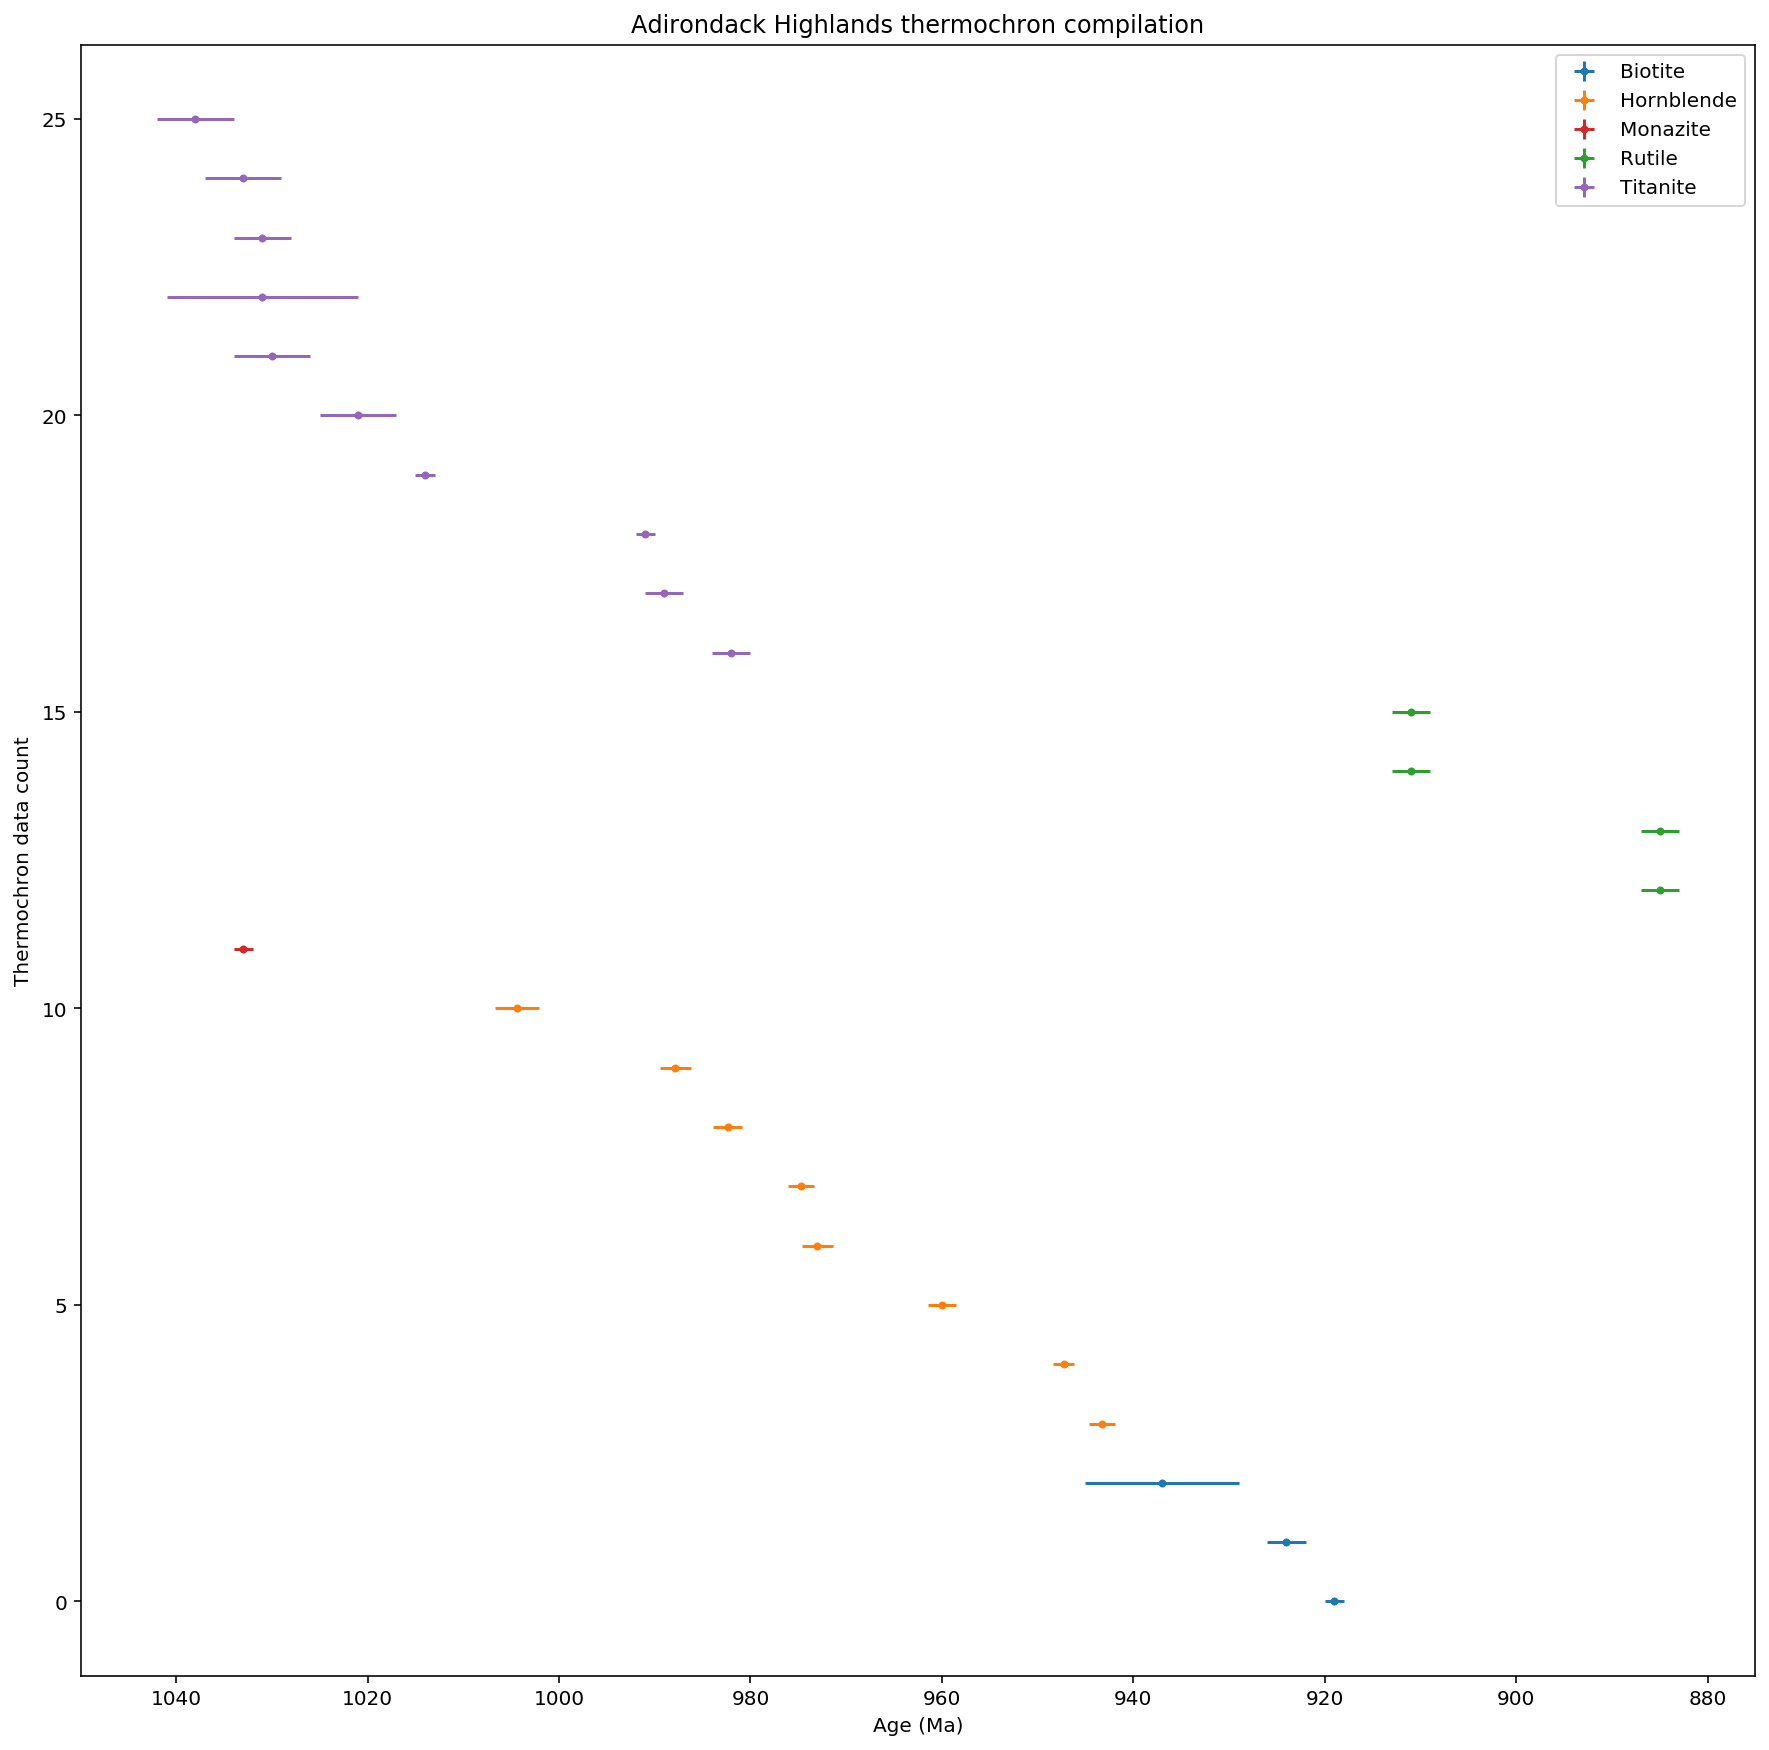

In [13]:
plt.figure(figsize=(15, 15))
for i in range(len(Adirondack_highlands_ages.Age_Material.unique())):
    this_material = Adirondack_highlands_ages[Adirondack_highlands_ages['Age_Material'] == Adirondack_highlands_ages.Age_Material.unique()[i]]
    plt.errorbar(this_material['Age'], this_material.index,  0, this_material['Error_Plus'], fmt='.',
                 color=color_dict[Adirondack_highlands_ages.Age_Material.unique()[i]], ls='None', label=Adirondack_highlands_ages.Age_Material.unique()[i])
plt.title('Adirondack Highlands thermochron compilation')
plt.ylabel('Thermochron data count')
plt.xlabel('Age (Ma)')
plt.gca().invert_xaxis()
plt.legend()

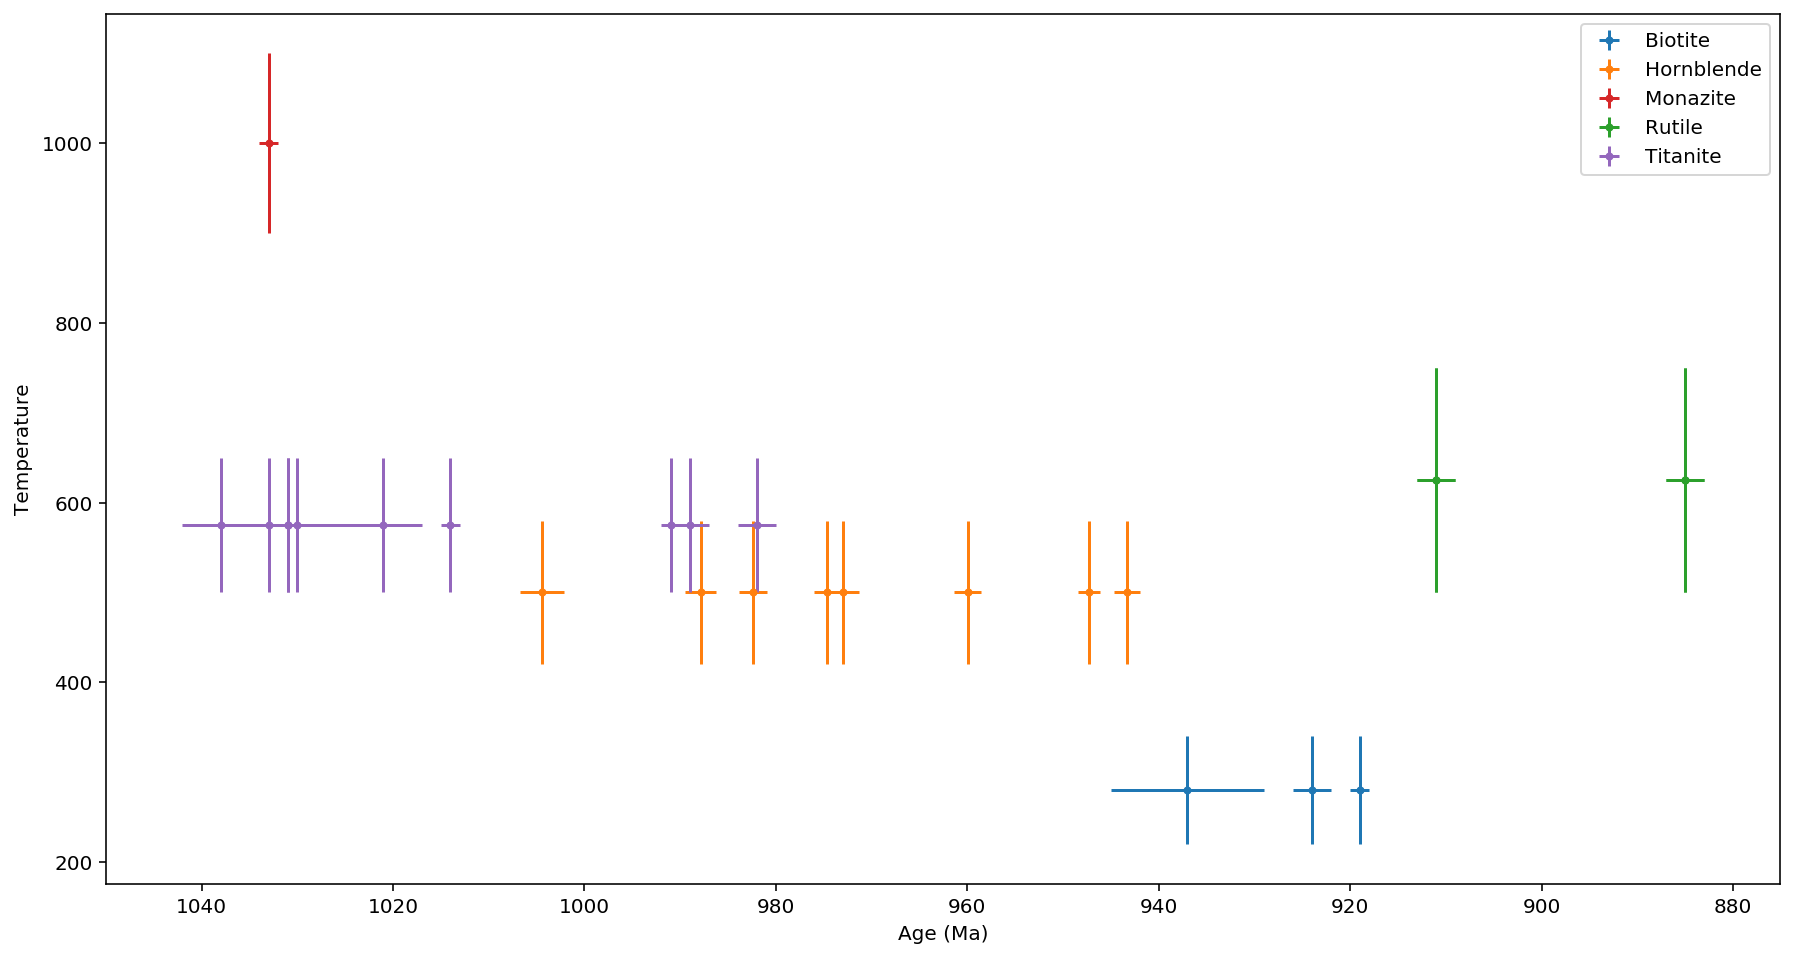

In [14]:
plt.figure(figsize=(15, 8))
for i in Adirondack_highlands_ages.Age_Material.unique():
    closure_temp_bounds = closure_temp_bounds_dict[i]
    this_material = Adirondack_highlands_ages[Adirondack_highlands_ages['Age_Material'] == i]
    plt.errorbar(this_material['Age'], np.full(len(this_material['Age']),closure_temp_bounds[0]), closure_temp_bounds[1], this_material['Error_Plus'], fmt='.',
                 color=color_dict[i], ls='None', label=i)
plt.ylabel('Temperature')
plt.xlabel('Age (Ma)')
plt.gca().invert_xaxis()
plt.legend()
plt.show()

# Load Central Gneiss Belt ages

## Corrigan 1995

- only take titanite ages for age of peak metamorphism

In [181]:
Corrigan1994a_ages = pd.read_csv('../data/thermochron_compilation/Corrigan1994a.csv')
Corrigan1994a_ages = Corrigan1994a_ages[~Corrigan1994a_ages['Age_Material'].str.contains('Allanite|Garnet|Zircon|Phlogopite|Monazite')].reset_index(drop=1)
# Corrigan1994a_ages.head()

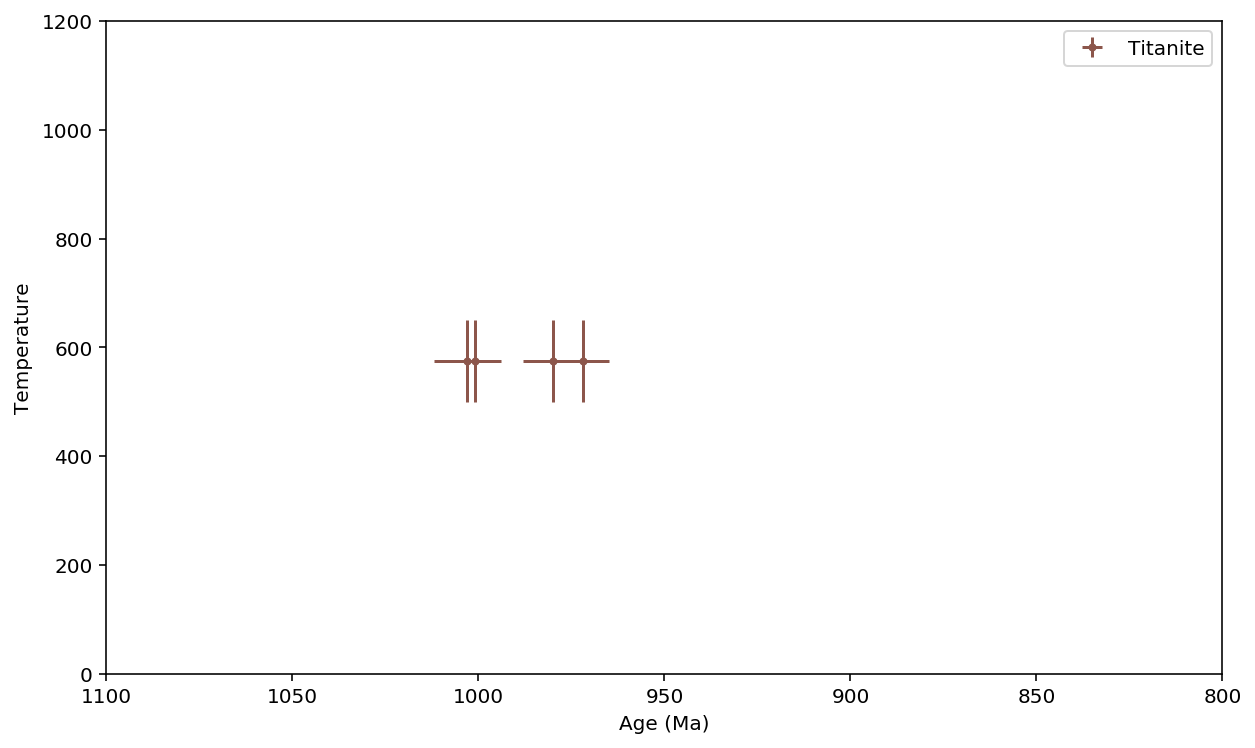

In [182]:
plt.figure(figsize=(10, 6))
for i in Corrigan1994a_ages.Age_Material.unique():
    closure_temp_bounds = closure_temp_bounds_dict[i]
    this_material = Corrigan1994a_ages[Corrigan1994a_ages['Age_Material'] == i]
    plt.errorbar(this_material['Age'], np.full(len(this_material['Age']),closure_temp_bounds[0]), closure_temp_bounds[1], this_material['Error_Plus'], fmt='.',
                 color=color_dict[i], ls='None', label=i)
plt.ylabel('Temperature')
plt.xlabel('Age (Ma)')
plt.gca().invert_xaxis()
plt.ylim(0, 1200)
plt.xlim(1100, 800)
plt.legend()
plt.show()

## Cosca 1991

- SSA-14 has younger hornblende age than biotite age, thus drop older biotite
- we may also consider dropping biotite data as the author said the biotite has the least reliable results

In [187]:
Cosca1991a_ages = pd.read_csv('../data/thermochron_compilation/Cosca1991a.csv')
Cosca1991a_ages = Cosca1991a_ages[Cosca1991a_ages['Geological_Info'].str.contains('Central Gneiss Belt')]
Cosca1991a_ages = Cosca1991a_ages[~Cosca1991a_ages['Sample_No'].str.contains('SSA-14|HL86-7')]
Cosca1991a_ages = Cosca1991a_ages[~Cosca1991a_ages['Age_Material'].str.contains('Allanite|Garnet|Zircon|Phlogopite|Monazite')].reset_index(drop=1)
# Cosca1991a_ages.head()

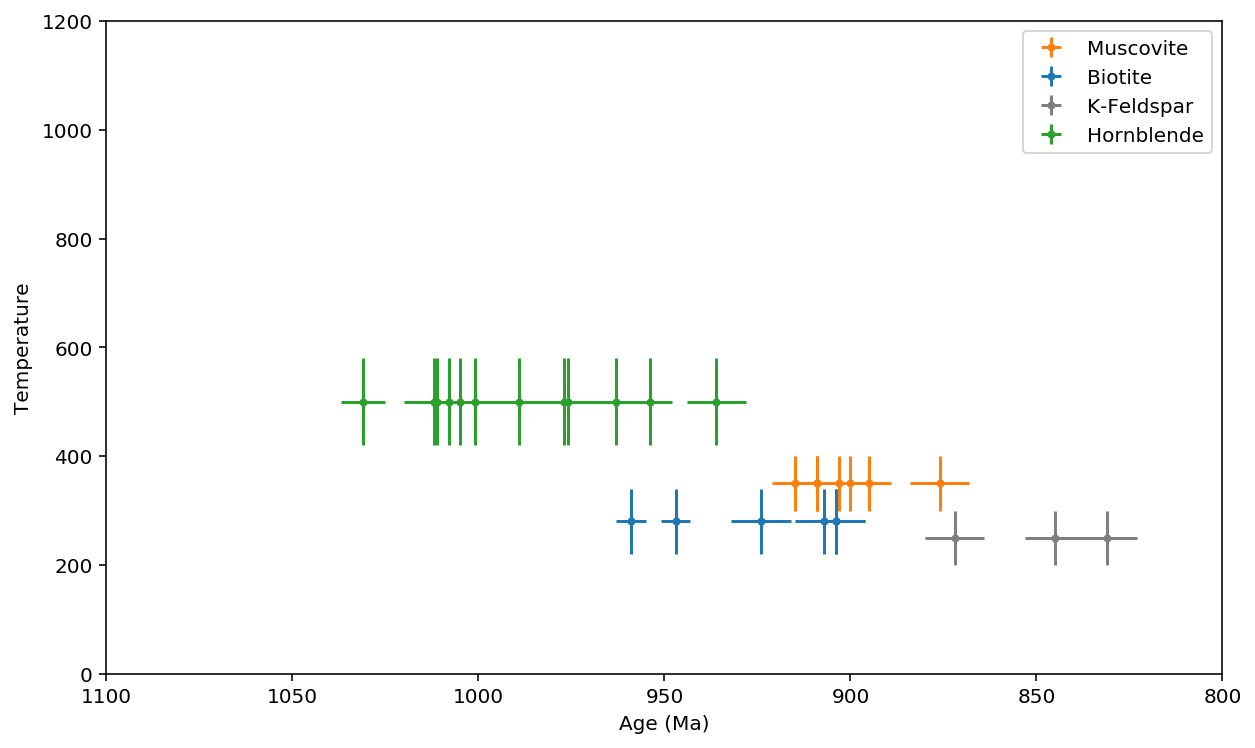

In [188]:
plt.figure(figsize=(10, 6))
for i in Cosca1991a_ages.Age_Material.unique():
    closure_temp_bounds = closure_temp_bounds_dict[i]
    this_material = Cosca1991a_ages[Cosca1991a_ages['Age_Material'] == i]
    plt.errorbar(this_material['Age'], np.full(len(this_material['Age']),closure_temp_bounds[0]), closure_temp_bounds[1], this_material['Error_Plus'], fmt='.',
                 color=color_dict[i], ls='None', label=i)
plt.ylabel('Temperature')
plt.xlabel('Age (Ma)')
plt.gca().invert_xaxis()
plt.ylim(0, 1200)
plt.xlim(1100, 800)
plt.legend()
plt.show()

In [15]:
Central_Gneiss_Belt_ages = pd.read_csv('../data/thermochron_compilation/Central_Gneiss_Belt.csv')
Central_Gneiss_Belt_ages = Central_Gneiss_Belt_ages[Central_Gneiss_Belt_ages['Age'] < 1090]
Central_Gneiss_Belt_ages = Central_Gneiss_Belt_ages[~Central_Gneiss_Belt_ages['Age_Material'].str.contains('Muscovite|Allanite|Garnet|Zircon|K-Feldspar')]
Central_Gneiss_Belt_ages = Central_Gneiss_Belt_ages.sort_values(by=['Age_Material', 'Age']).reset_index(drop=1)
Central_Gneiss_Belt_ages.head()

,Sample_No,Age,Error_Plus,Error_Minus,Age_Method,Age_Interpretation,Age_Note,Age_Material,Age_Technique,Age_Qualifier,Geological_Province,Province,Latitude,Longitude,Location,Geological_Info,Rock_Type,Rock_Description,References
0,SSA-12,875.0,8.0,8.0,Ar/Ar,Cooling,gneiss,Biotite,Ar Furnace-Step,Direct,Grenville Province,ON,45.58720,-78.50004,No topographic reference given in report; loca...,"Central Metasedimentary Belt, Algonquin/McClin...",Metamorphic,gneiss,"Cosca, M.A., Sutter, J.F. and Essene, E.J., 19..."
1,SSA-10B,904.0,8.0,8.0,Ar/Ar,Cooling,amphibolite,Biotite,Ar Furnace-Fusion,Direct,Grenville Province,ON,45.50006,-78.24977,Approx. 50 km WSE of Pembroke. Location approx...,Central Gneiss Belt - unknown,Metamorphic,amphibolite,"Cosca, M.A., Sutter, J.F. and Essene, E.J., 19..."
2,PSA-2,904.0,8.0,8.0,Ar/Ar,Cooling,gneiss,Biotite,Ar Furnace-Step,Direct,Grenville Province,ON,45.44172,-80.02066,Location very approximate; not specifically lo...,Central Gneiss Belt - unknown,Metamorphic,gneiss,"Cosca, M.A., Sutter, J.F. and Essene, E.J., 19..."
3,SSA-8A,907.0,8.0,8.0,Ar/Ar,Cooling,gneiss,Biotite,Ar Furnace-Step,Direct,Grenville Province,ON,45.35005,-79.13314,NE of Huntsville. Location approximate.,"Central Gneiss Belt, Algonquin Domain - unknown",Metamorphic,gneiss,"Cosca, M.A., Sutter, J.F. and Essene, E.J., 19..."
4,RDT-3,924.0,8.0,8.0,Ar/Ar,Cooling,gneiss,Biotite,Ar Furnace-Step,Direct,Grenville Province,ON,45.24958,-78.94818,No topographic reference given in report; loca...,"Central Gneiss Belt, Muskoka Domain - unknown",Metamorphic,gneiss,"Cosca, M.A., Sutter, J.F. and Essene, E.J., 19..."


In [16]:
Central_Gneiss_Belt_ages.Age_Material.unique()

array(['Biotite', 'Hornblende', 'Monazite', 'Rutile', 'Titanite'],
      dtype=object)

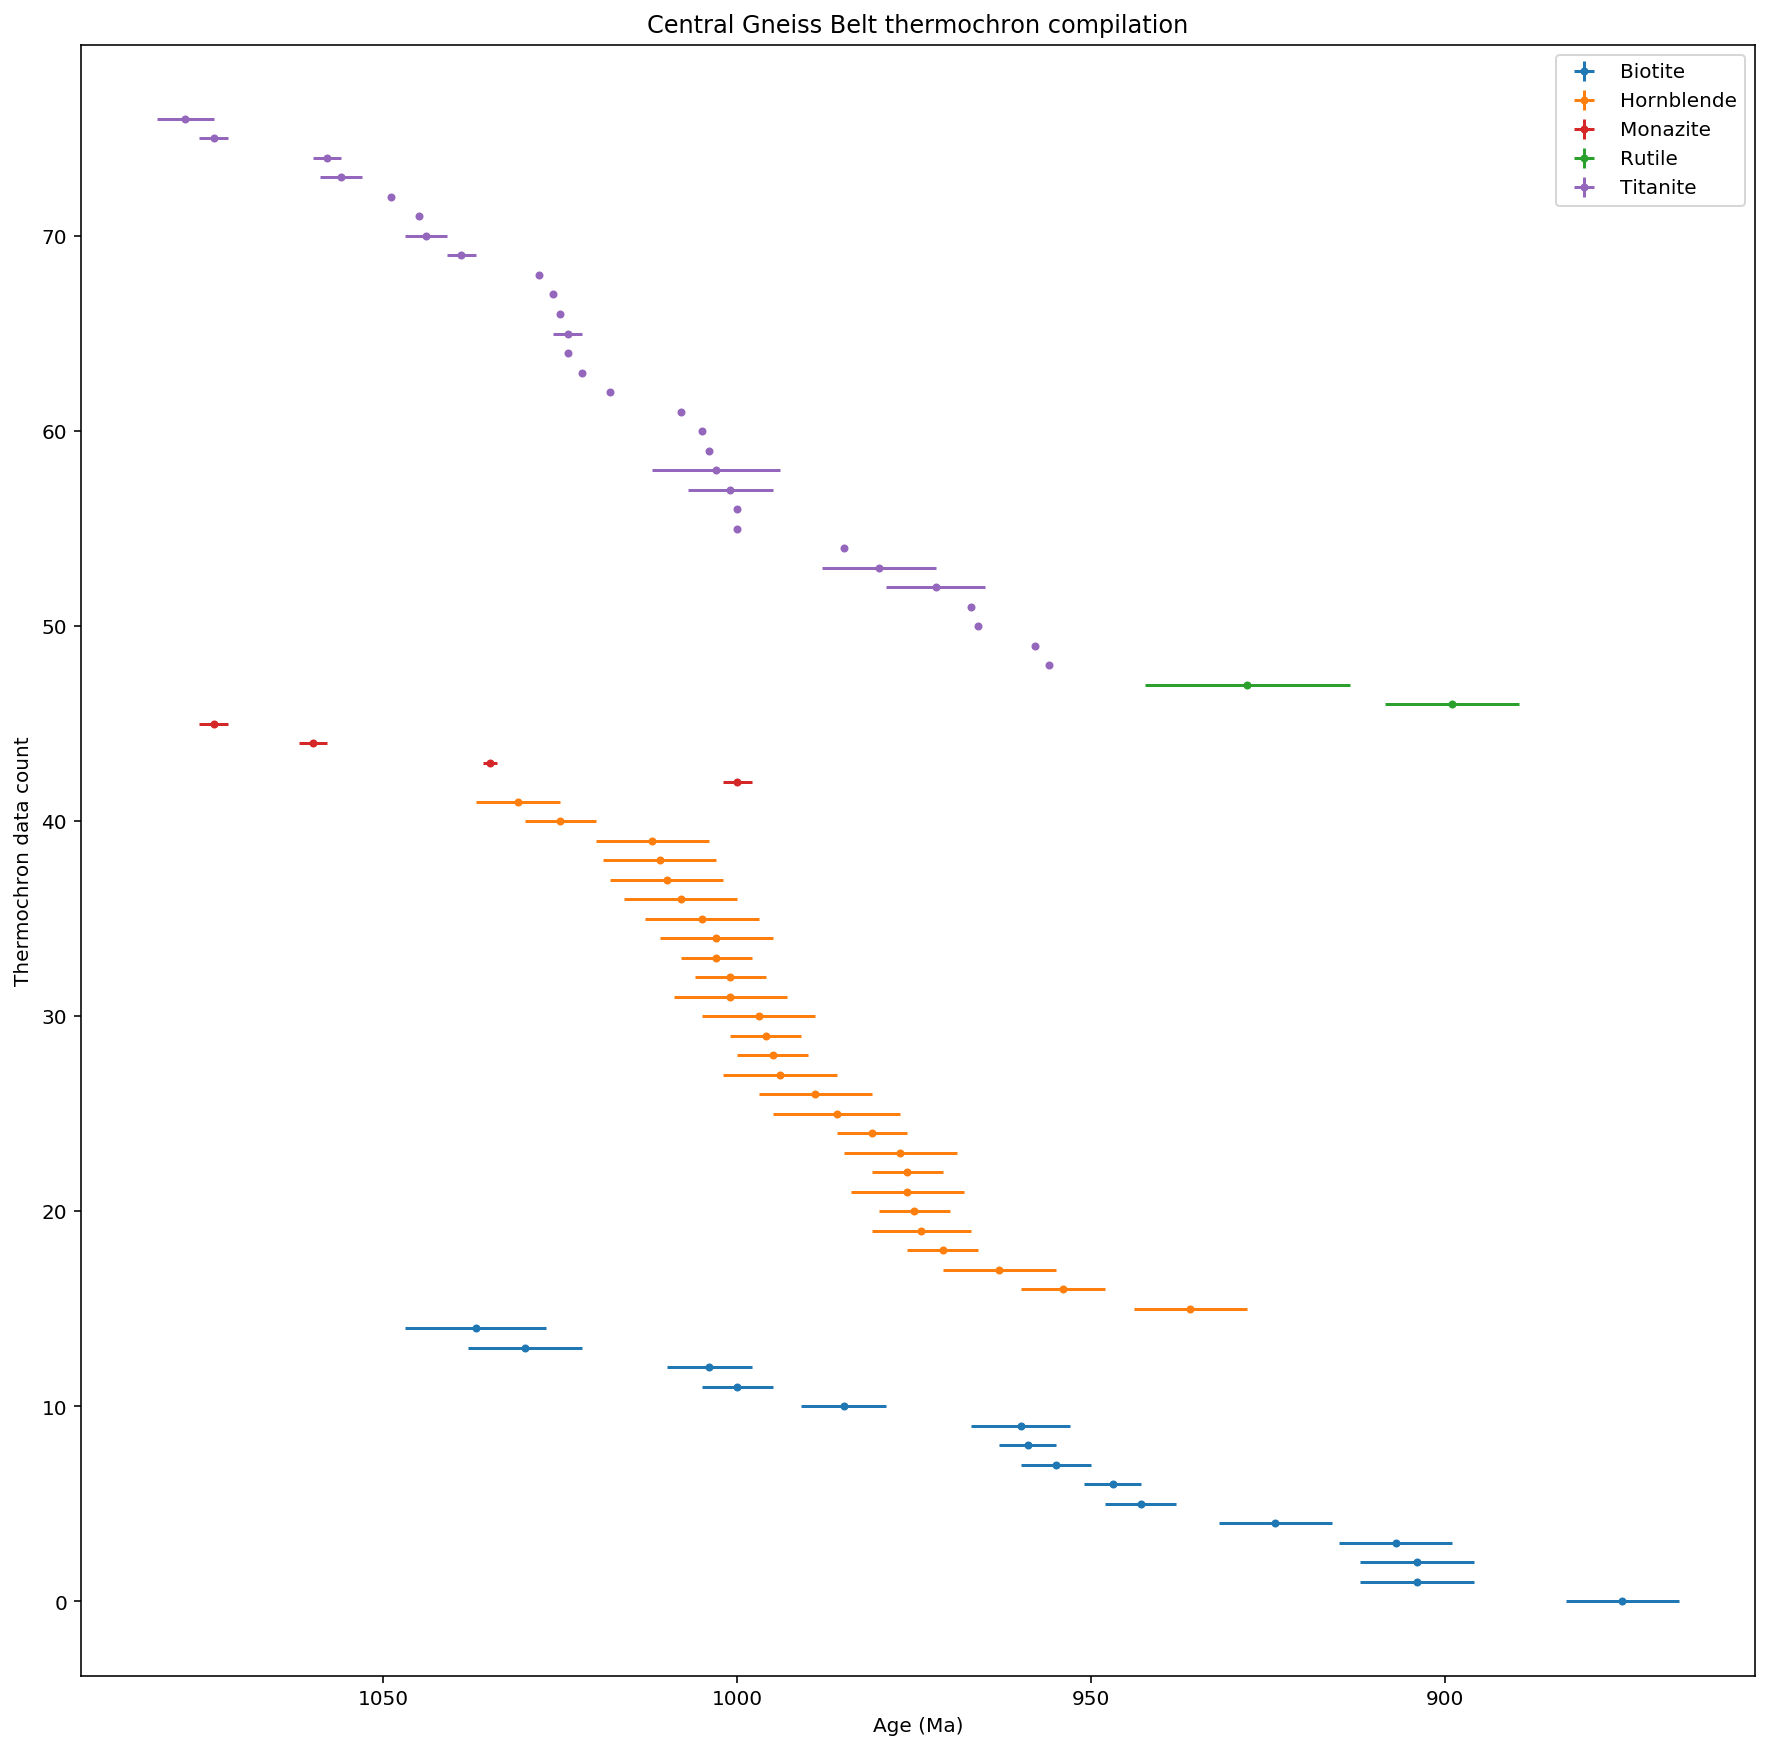

In [17]:
plt.figure(figsize=(15, 15))
for i in range(len(Central_Gneiss_Belt_ages.Age_Material.unique())):
    this_material = Central_Gneiss_Belt_ages[Central_Gneiss_Belt_ages['Age_Material'] == Central_Gneiss_Belt_ages.Age_Material.unique()[i]]
    plt.errorbar(this_material['Age'], this_material.index,  0, this_material['Error_Plus'], fmt='.',
                 color=color_dict[Central_Gneiss_Belt_ages.Age_Material.unique()[i]], ls='None', label=Central_Gneiss_Belt_ages.Age_Material.unique()[i])
plt.title('Central Gneiss Belt thermochron compilation')
plt.ylabel('Thermochron data count')
plt.xlabel('Age (Ma)')
plt.gca().invert_xaxis()
plt.legend()

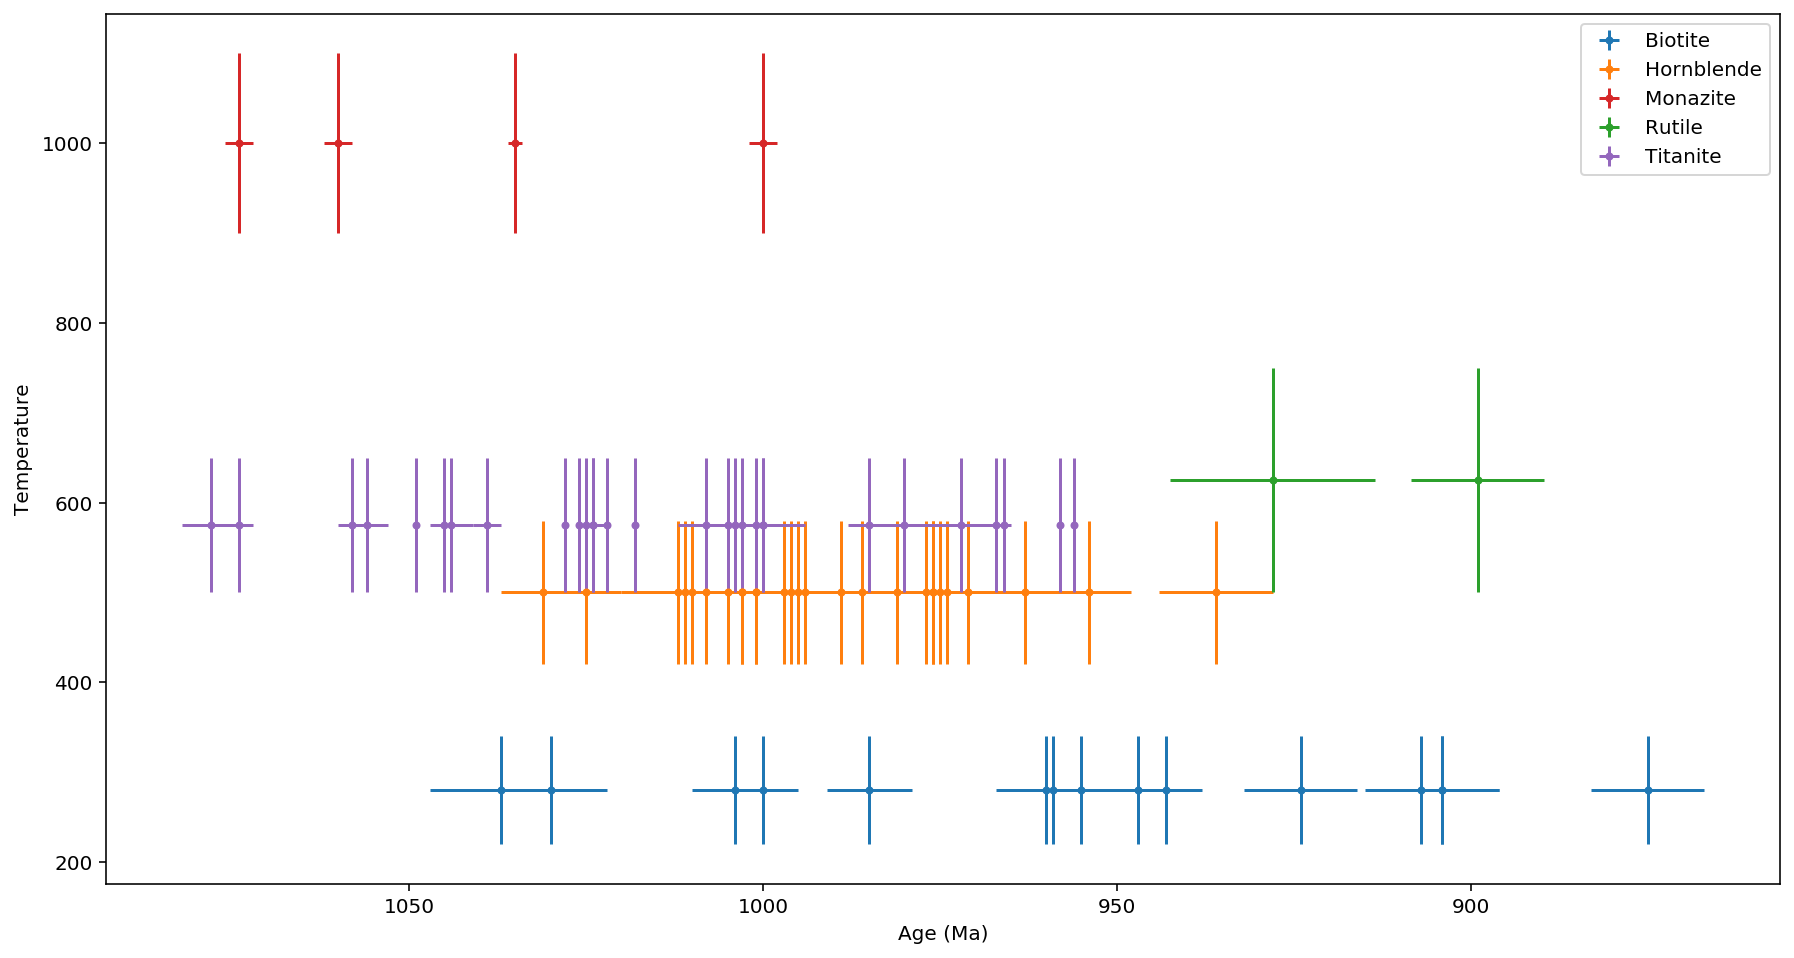

In [18]:
plt.figure(figsize=(15, 8))
for i in Central_Gneiss_Belt_ages.Age_Material.unique():
    closure_temp_bounds = closure_temp_bounds_dict[i]
    this_material = Central_Gneiss_Belt_ages[Central_Gneiss_Belt_ages['Age_Material'] == i]
    plt.errorbar(this_material['Age'], np.full(len(this_material['Age']),closure_temp_bounds[0]), closure_temp_bounds[1], this_material['Error_Plus'], fmt='.',
                 color=color_dict[i], ls='None', label=i)
plt.ylabel('Temperature')
plt.xlabel('Age (Ma)')
plt.gca().invert_xaxis()
plt.legend()
plt.show()

### Whitestone diorite Ar Hornblende and Biotite thermochron

In [130]:
Whitestone_ages = pd.read_csv('../data/thermochron_compilation/Dallmeyer1980a.csv')
Whitestone_ages = Whitestone_ages.sort_values(by=['Age_Material', 'Age']).reset_index(drop=1)
Whitestone_ages.head()

,Sample_No,Age,Error_Plus,Error_Minus,Age_Method,Age_Interpretation,Age_Note,Age_Material,Age_Technique,Age_Qualifier,Geological_Province,Province,Latitude,Longitude,Location,Geological_Info,Rock_Type,Rock_Description,References
0,WA-15,936,15,15,Ar/Ar,Cooling,NaN,Biotite,Ar Furnace-Step,Direct,Grenville Province,ON,NaN,NaN,Whitestone diorite,NaN,Plutonic,diorite,"Dallmeyer, R. D., & Sutter, J. F. (1980). Acqu..."
1,WA-21,960,15,15,Ar/Ar,Cooling,NaN,Biotite,Ar Furnace-Step,Direct,Grenville Province,ON,NaN,NaN,Whitestone diorite,NaN,Plutonic,diorite,"Dallmeyer, R. D., & Sutter, J. F. (1980). Acqu..."
2,WA-15,965,15,15,Ar/Ar,Cooling,NaN,Hornblende,Ar Furnace-Step,Direct,Grenville Province,ON,NaN,NaN,Whitestone diorite,NaN,Plutonic,diorite,"Dallmeyer, R. D., & Sutter, J. F. (1980). Acqu..."
3,WA-21,991,15,15,Ar/Ar,Cooling,NaN,Hornblende,Ar Furnace-Step,Direct,Grenville Province,ON,NaN,NaN,Whitestone diorite,NaN,Plutonic,diorite,"Dallmeyer, R. D., & Sutter, J. F. (1980). Acqu..."


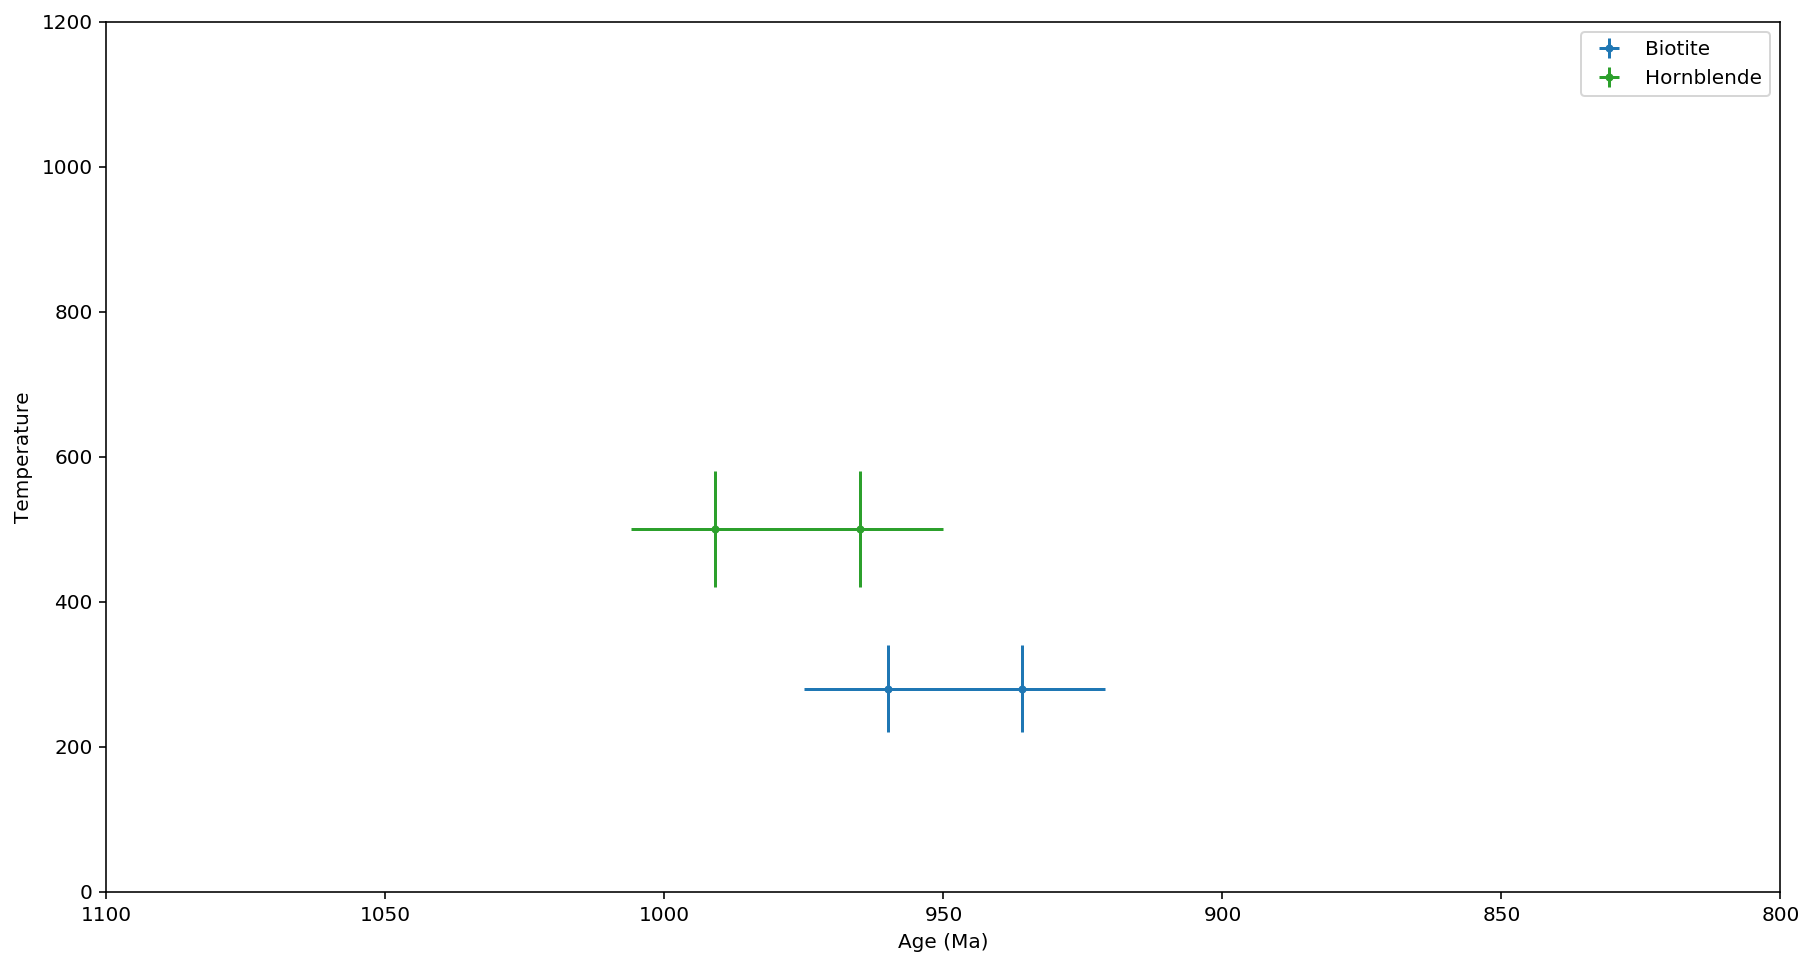

In [132]:
plt.figure(figsize=(15, 8))
for i in Whitestone_ages.Age_Material.unique():
    closure_temp_bounds = closure_temp_bounds_dict[i]
    this_material = Whitestone_ages[Whitestone_ages['Age_Material'] == i]
    plt.errorbar(this_material['Age'], np.full(len(this_material['Age']),closure_temp_bounds[0]), closure_temp_bounds[1], this_material['Error_Plus'], fmt='.',
                 color=color_dict[i], ls='None', label=i)
plt.ylabel('Temperature')
plt.xlabel('Age (Ma)')
plt.ylim(0, 1200)
plt.xlim(800, 1100)
plt.gca().invert_xaxis()
plt.legend()
plt.show()

## Load Central Metasedimentary Belt ages

In [19]:
Central_Meta_Belt_ages = pd.read_csv('../data/thermochron_compilation/Central_Metasedimentary_Belt.csv')
Central_Meta_Belt_ages = Central_Meta_Belt_ages[Central_Meta_Belt_ages['Age'] < 1090]
Central_Meta_Belt_ages = Central_Meta_Belt_ages[~Central_Meta_Belt_ages['Age_Material'].str.contains(
    'Muscovite|Allanite|Garnet|Zircon|K-Feldspar|Whole Rock|Phlogopite|Thorianite|Uraninite')]
Central_Meta_Belt_ages = Central_Meta_Belt_ages.sort_values(by=['Age_Material', 'Age']).reset_index(drop=1)
Central_Meta_Belt_ages.head()

,Sample_No,Age,Error_Plus,Error_Minus,Age_Method,Age_Interpretation,Age_Note,Age_Material,Age_Technique,Age_Qualifier,Geological_Province,Province,Latitude,Longitude,Location,Geological_Info,Rock_Type,Rock_Description,References
0,MIN86-3A,848,6.0,6.0,Ar/Ar,Cooling,amphibolite,Biotite,Ar Furnace-Fusion,Estimate,Grenville Province,ON,45.03339,-78.78312,50 km W of Bancroft. Location approximate.,"Central Metasedimentary Belt, Boundary Zone - ...",Metamorphic,amphibolite,"Cosca, M.A., Sutter, J.F. and Essene, E.J., 19..."
1,HL86-3,850,20.0,20.0,Ar/Ar,Cooling,amphibolite,Biotite,Ar Furnace-Fusion,Estimate,Grenville Province,ON,44.61256,-77.16640,NE of Madoc. Location approximate,"Central Metasedimentary Belt, Elzevir terrane ...",Metamorphic,amphibolite,"Cosca, M.A., Sutter, J.F. and Essene, E.J., 19..."
2,HL86-2B,897,4.0,4.0,Ar/Ar,Cooling,gneiss,Biotite,Ar Furnace-Fusion,Estimate,Grenville Province,ON,44.64589,-77.09972,NE of Madoc. Location approximate,"Central Metasedimentary Belt, Elzevir terrane ...",Metamorphic,gneiss,"Cosca, M.A., Sutter, J.F. and Essene, E.J., 19..."
3,LVT130,905,2.0,2.0,Ar/Ar,Cooling,biotite muscovite quartz plagioclase sillimani...,Biotite,Laser-Step,Direct,Grenville Province,NaN,45.05876,-76.75339,Robertson Lake shear zone,Metasedimentary Belt,Metamorphic,amphibolite and mica schist,"Busch, J.P., and van der Pluijm, B.A., 1996, L..."
4,HL86-2C,917,4.0,4.0,Ar/Ar,Cooling,gneiss,Biotite,Ar Furnace-Fusion,Estimate,Grenville Province,ON,44.64589,-77.09972,NE of Madoc. Location approximate,"Central Metasedimentary Belt, Elzevir terrane ...",Metamorphic,gneiss,"Cosca, M.A., Sutter, J.F. and Essene, E.J., 19..."


In [20]:
Central_Meta_Belt_ages.Age_Material.unique()

array(['Biotite', 'Hornblende', 'Monazite', 'Rutile', 'Titanite'],
      dtype=object)

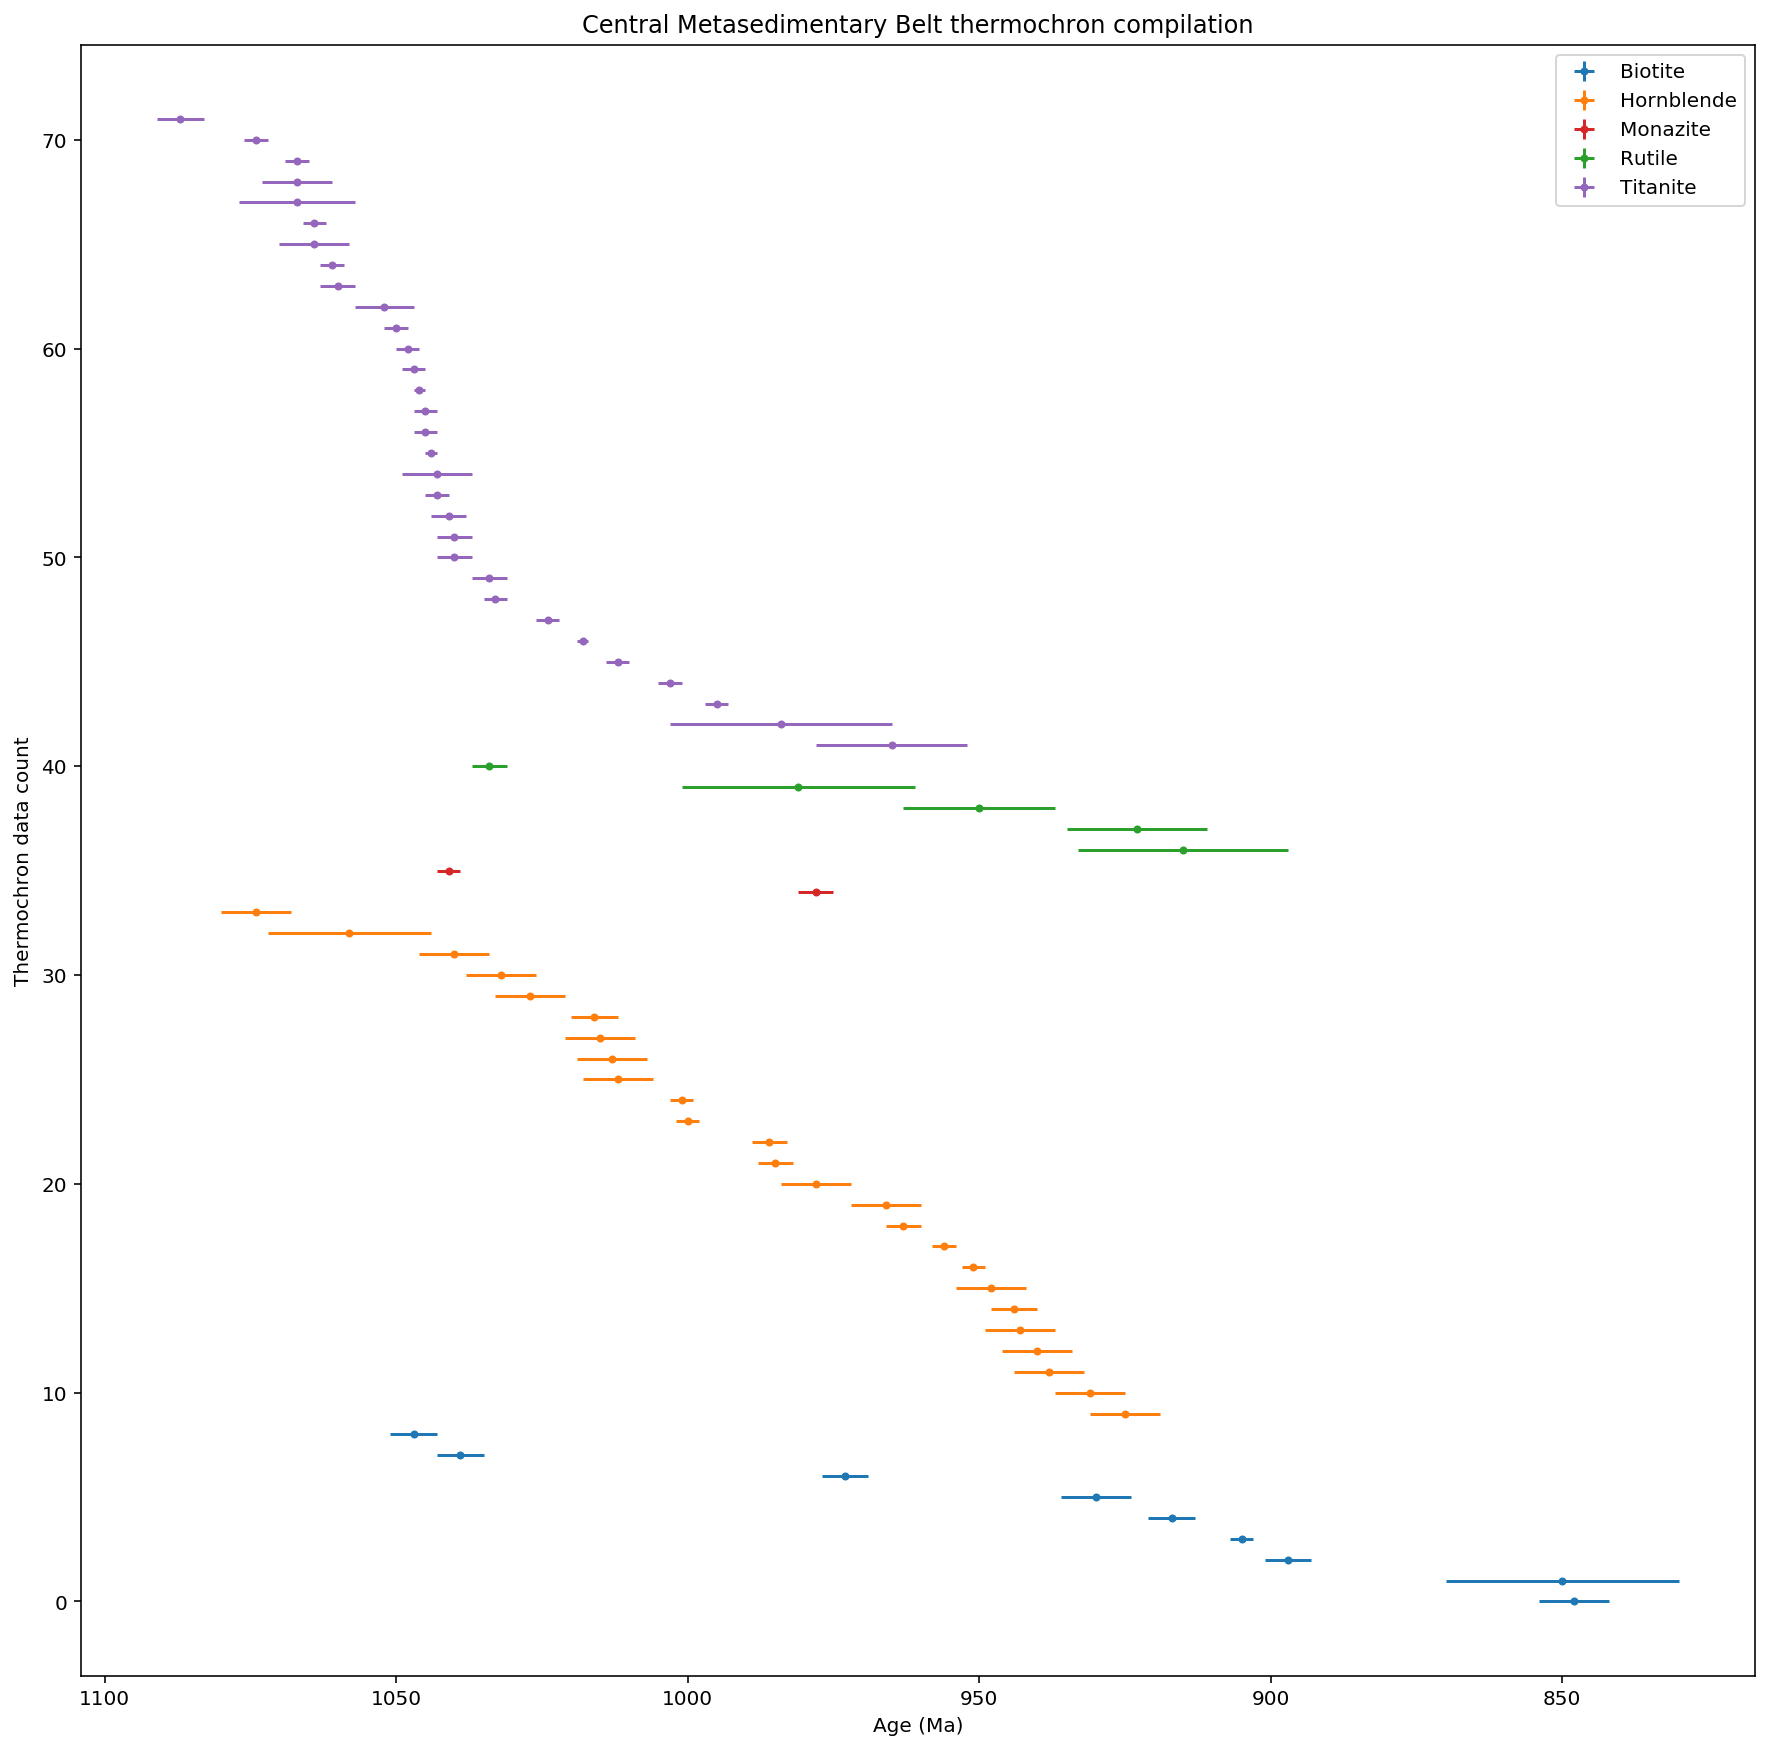

In [21]:
plt.figure(figsize=(15, 15))
for i in range(len(Central_Meta_Belt_ages.Age_Material.unique())):
    this_material = Central_Meta_Belt_ages[Central_Meta_Belt_ages['Age_Material'] == Central_Meta_Belt_ages.Age_Material.unique()[i]]
    plt.errorbar(this_material['Age'], this_material.index,  0, this_material['Error_Plus'], fmt='.',
                 color=color_dict[Central_Meta_Belt_ages.Age_Material.unique()[i]], ls='None', label=Central_Meta_Belt_ages.Age_Material.unique()[i])
plt.title('Central Metasedimentary Belt thermochron compilation')
plt.ylabel('Thermochron data count')
plt.xlabel('Age (Ma)')
plt.gca().invert_xaxis()
plt.legend()

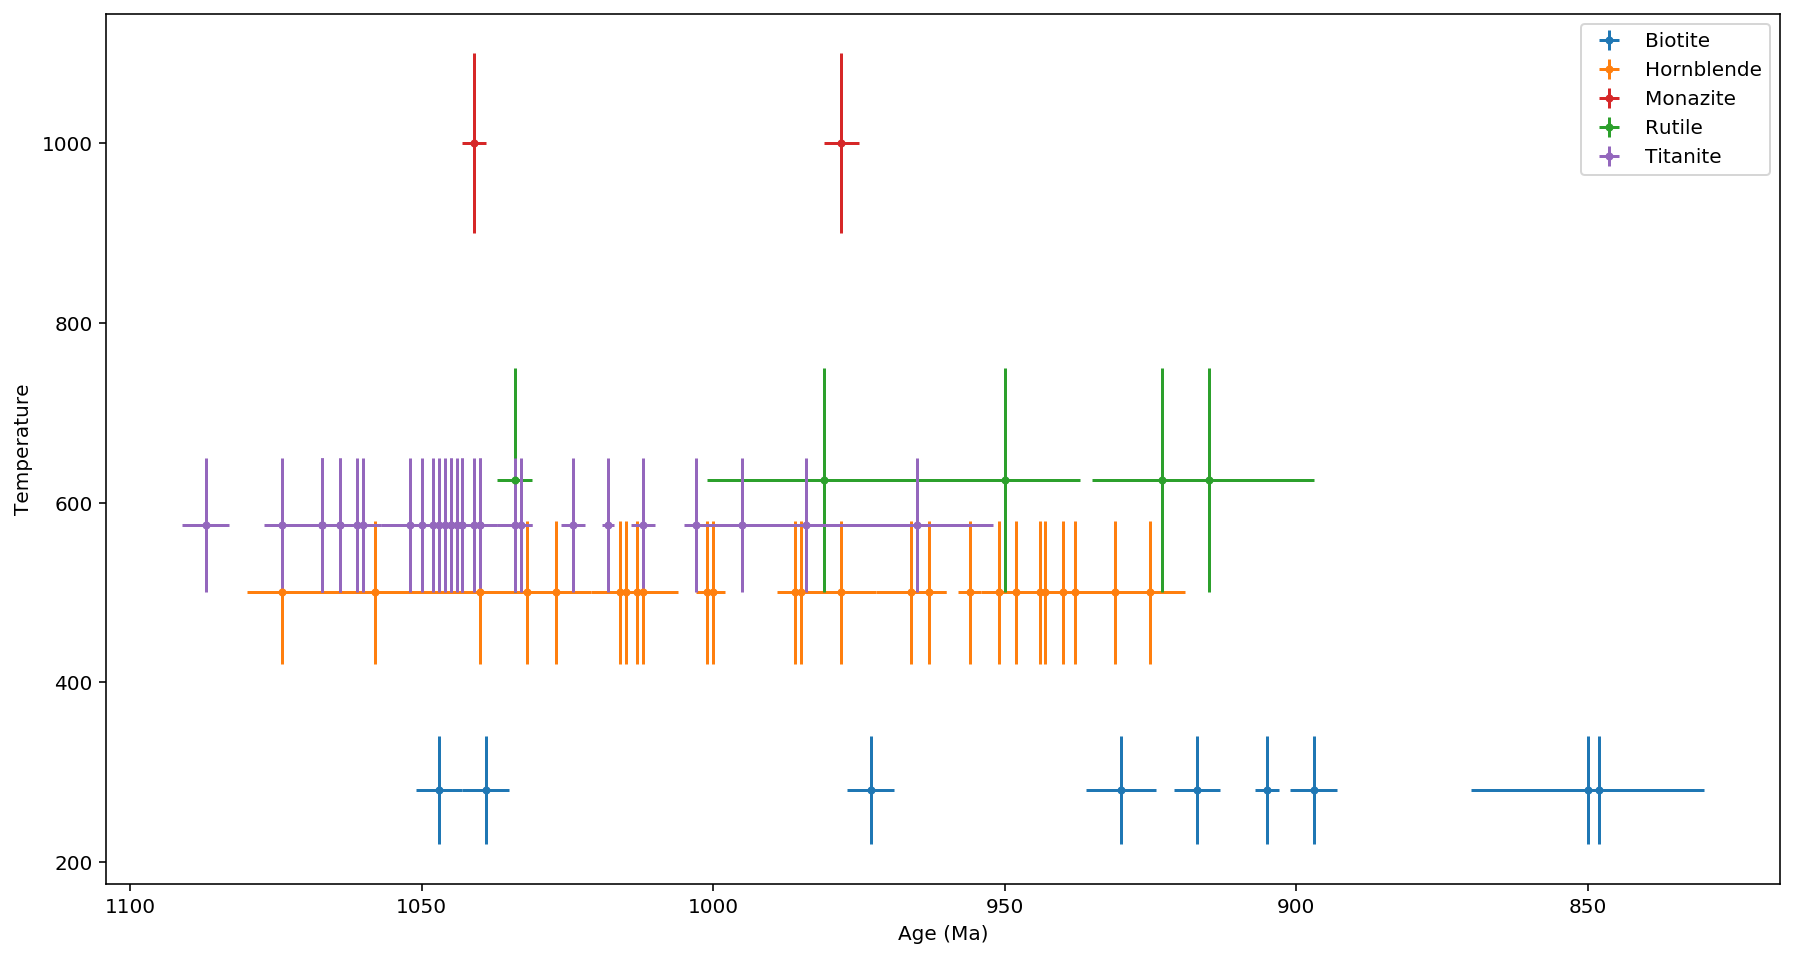

In [22]:
plt.figure(figsize=(15, 8))
for i in Central_Meta_Belt_ages.Age_Material.unique():
    closure_temp_bounds = closure_temp_bounds_dict[i]
    this_material = Central_Meta_Belt_ages[Central_Meta_Belt_ages['Age_Material'] == i]
    plt.errorbar(this_material['Age'], np.full(len(this_material['Age']),closure_temp_bounds[0]), closure_temp_bounds[1], this_material['Error_Plus'], fmt='.',
                 color=color_dict[i], ls='None', label=i)
plt.ylabel('Temperature')
plt.xlabel('Age (Ma)')
plt.gca().invert_xaxis()
plt.legend()
plt.show()

## Cosca 1991 CGB and CMB Ar thermochron

In [64]:
Cosca1991a_ages = pd.read_csv('../data/thermochron_compilation/Cosca1991a.csv')
Cosca1991a_ages = Cosca1991a_ages[Cosca1991a_ages['Sample_No'] != 'HL86-7']
Cosca1991a_ages = Cosca1991a_ages[Cosca1991a_ages['Age_Material'] != 'Muscovite']
Cosca1991a_ages = Cosca1991a_ages.sort_values(by=['Age_Material', 'Age']).reset_index(drop=1)
Cosca1991a_ages.head()

,Sample_No,Age,Error_Plus,Error_Minus,Age_Method,Age_Interpretation,Age_Note,Age_Material,Age_Technique,Age_Qualifier,Geological_Province,Province,Latitude,Longitude,Location,Geological_Info,Rock_Type,Rock_Description,References
0,MIN86-3A,848,6,6,Ar/Ar,Cooling,amphibolite,Biotite,Ar Furnace-Fusion,Estimate,Grenville Province,ON,45.03339,-78.78312,50 km W of Bancroft. Location approximate.,Central Metasedimentary Belt Boundary Zone - u...,Metamorphic,amphibolite,"Cosca, M. A., Sutter, J. F., & Essene, E. J. (..."
1,HL86-3,850,20,20,Ar/Ar,Cooling,amphibolite,Biotite,Ar Furnace-Fusion,Estimate,Grenville Province,ON,44.61256,-77.16640,NE of Madoc. Location approximate,"Central Metasedimentary Belt, Elzevir terrane ...",Metamorphic,amphibolite,"Cosca, M. A., Sutter, J. F., & Essene, E. J. (..."
2,SSA-12,875,8,8,Ar/Ar,Cooling,gneiss,Biotite,Ar Furnace-Step,Direct,Grenville Province,ON,45.58720,-78.50004,No topographic reference given in report; loca...,"Central Metasedimentary Belt, Algonquin/McClin...",Metamorphic,gneiss,"Cosca, M. A., Sutter, J. F., & Essene, E. J. (..."
3,HL86-2B,897,4,4,Ar/Ar,Cooling,gneiss,Biotite,Ar Furnace-Fusion,Estimate,Grenville Province,ON,44.64589,-77.09972,NE of Madoc. Location approximate,"Central Metasedimentary Belt, Elzevir terrane ...",Metamorphic,gneiss,"Cosca, M. A., Sutter, J. F., & Essene, E. J. (..."
4,PSA-2,904,8,8,Ar/Ar,Cooling,gneiss,Biotite,Ar Furnace-Step,Direct,Grenville Province,ON,45.44172,-80.02066,Location very approximate; not specifically lo...,Central Gneiss Belt - unknown,Metamorphic,gneiss,"Cosca, M. A., Sutter, J. F., & Essene, E. J. (..."


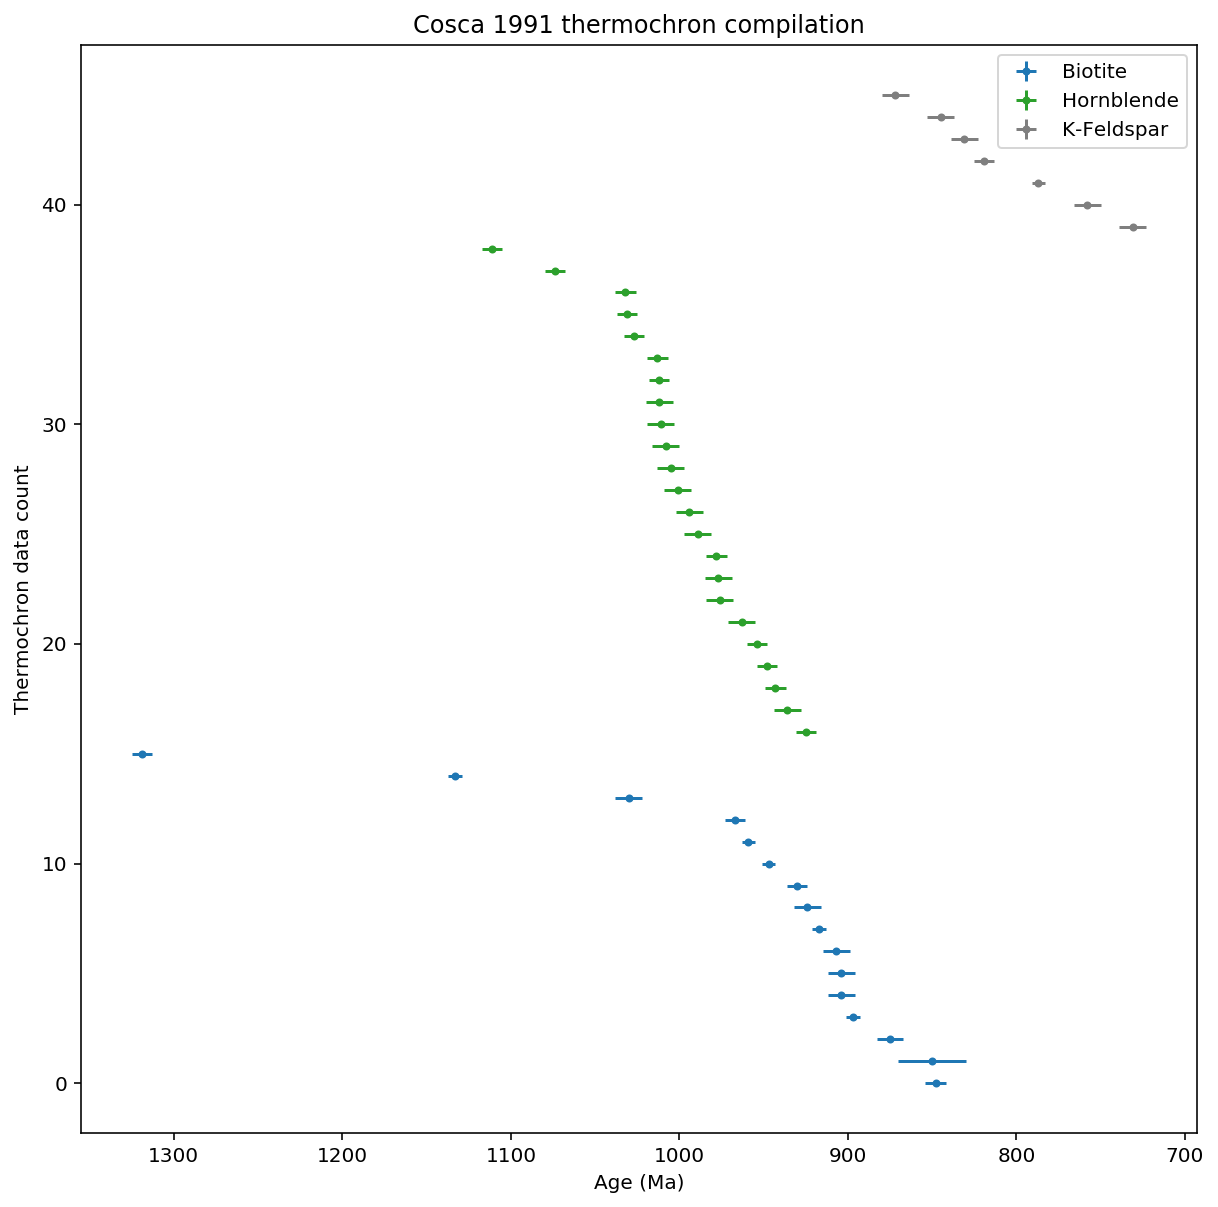

In [65]:
plt.figure(figsize=(10, 10))
for i in range(len(Cosca1991a_ages.Age_Material.unique())):
    this_material = Cosca1991a_ages[Cosca1991a_ages['Age_Material'] == Cosca1991a_ages.Age_Material.unique()[i]]
    plt.errorbar(this_material['Age'], this_material.index,  0, this_material['Error_Plus'], fmt='.',
                 color=color_dict[Cosca1991a_ages.Age_Material.unique()[i]], ls='None', label=Cosca1991a_ages.Age_Material.unique()[i])
plt.title('Cosca 1991 thermochron compilation')
plt.ylabel('Thermochron data count')
plt.xlabel('Age (Ma)')
plt.gca().invert_xaxis()
plt.legend()

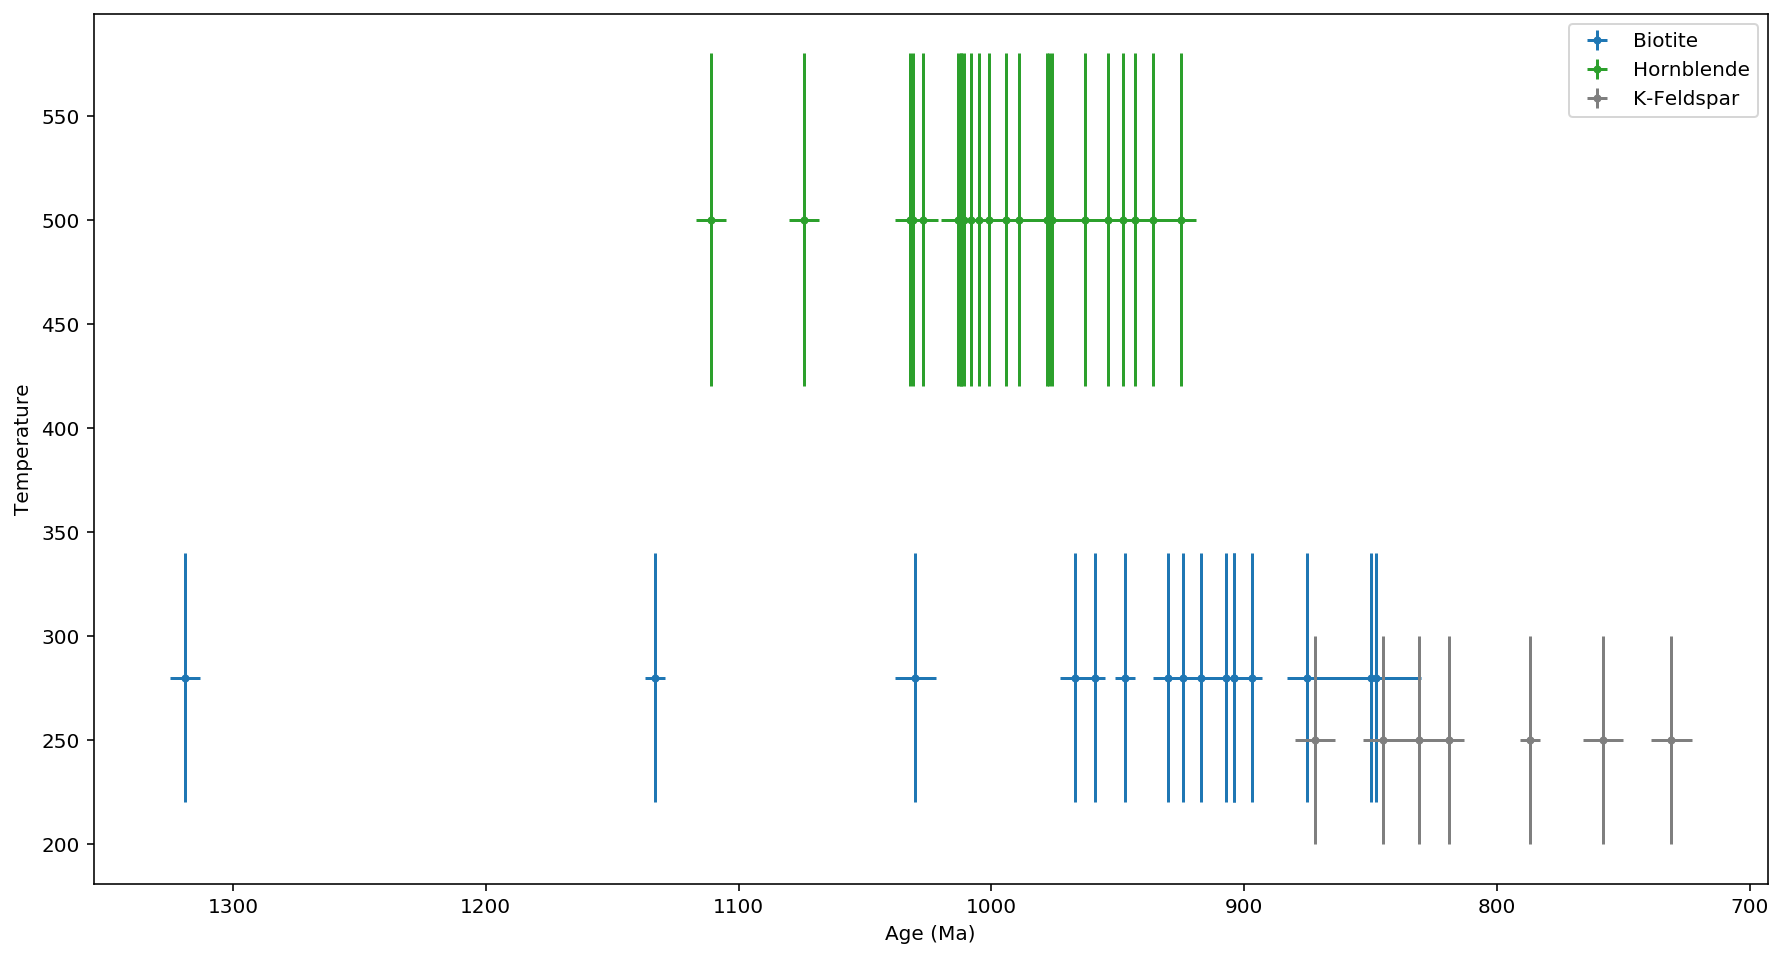

In [66]:
plt.figure(figsize=(15, 8))
for i in Cosca1991a_ages.Age_Material.unique():
    closure_temp_bounds = closure_temp_bounds_dict[i]
    this_material = Cosca1991a_ages[Cosca1991a_ages['Age_Material'] == i]
    plt.errorbar(this_material['Age'], np.full(len(this_material['Age']),closure_temp_bounds[0]), closure_temp_bounds[1], this_material['Error_Plus'], fmt='.',
                 color=color_dict[i], ls='None', label=i)
plt.ylabel('Temperature')
plt.xlabel('Age (Ma)')
# plt.ylim(0, 1200)
plt.gca().invert_xaxis()
plt.legend()
plt.show()

## Allard Lake and St. Urbain thermochron 
Based on Morisset 2009 U-Pb and Ar

In [14]:
Allard_Urbain_ages = pd.read_csv('../data/thermochron_compilation/Morisset2009a.csv')
Allard_Urbain_ages = Allard_Urbain_ages.drop(0)
Allard_Urbain_ages = Allard_Urbain_ages.sort_values(by=['Age_Material', 'Age']).reset_index(drop=1)
Allard_Urbain_ages.head()

,Sample_No,Age,Error_Plus,Error_Minus,Age_Method,Age_Interpretation,Age_Note,Age_Material,Age_Technique,Age_Qualifier,...,Province,Latitude,Longitude,Location,Geological_Info,Rock_Type,Rock_Description,References,min_effective_radius,max_effective_radius
0,2033-D,860.3,4.15,4.15,Ar/Ar,Cooling,NaN,Biotite,Ar Furnace-Step,Direct,...,ON,5265524,382455,NaN,Habre-Saint-Pierre anorthosite,Plutonic,NaN,"Morisset, C. E., Scoates, J. S., Weis, D., & F...",250,500
1,2042-A,873.4,2.70,2.70,Ar/Ar,Cooling,NaN,Biotite,Ar Furnace-Step,Direct,...,ON,5277212,379295,NaN,Habre-Saint-Pierre anorthosite,Plutonic,NaN,"Morisset, C. E., Scoates, J. S., Weis, D., & F...",380,800
2,2036-B1B,875.7,2.25,2.25,Ar/Ar,Cooling,NaN,Biotite,Ar Furnace-Step,Direct,...,ON,5266680,383090,NaN,Habre-Saint-Pierre anorthosite,Plutonic,NaN,"Morisset, C. E., Scoates, J. S., Weis, D., & F...",450,700
3,2015-A4,884.4,2.70,2.70,Ar/Ar,Cooling,NaN,Biotite,Ar Furnace-Step,Direct,...,ON,5265611,382943,NaN,Habre-Saint-Pierre anorthosite,Plutonic,NaN,"Morisset, C. E., Scoates, J. S., Weis, D., & F...",100,500
4,2033-D,885.8,2.30,2.30,Ar/Ar,Cooling,NaN,Biotite,Ar Furnace-Step,Direct,...,ON,5265524,392455,NaN,Habre-Saint-Pierre anorthosite,Plutonic,NaN,"Morisset, C. E., Scoates, J. S., Weis, D., & F...",700,850


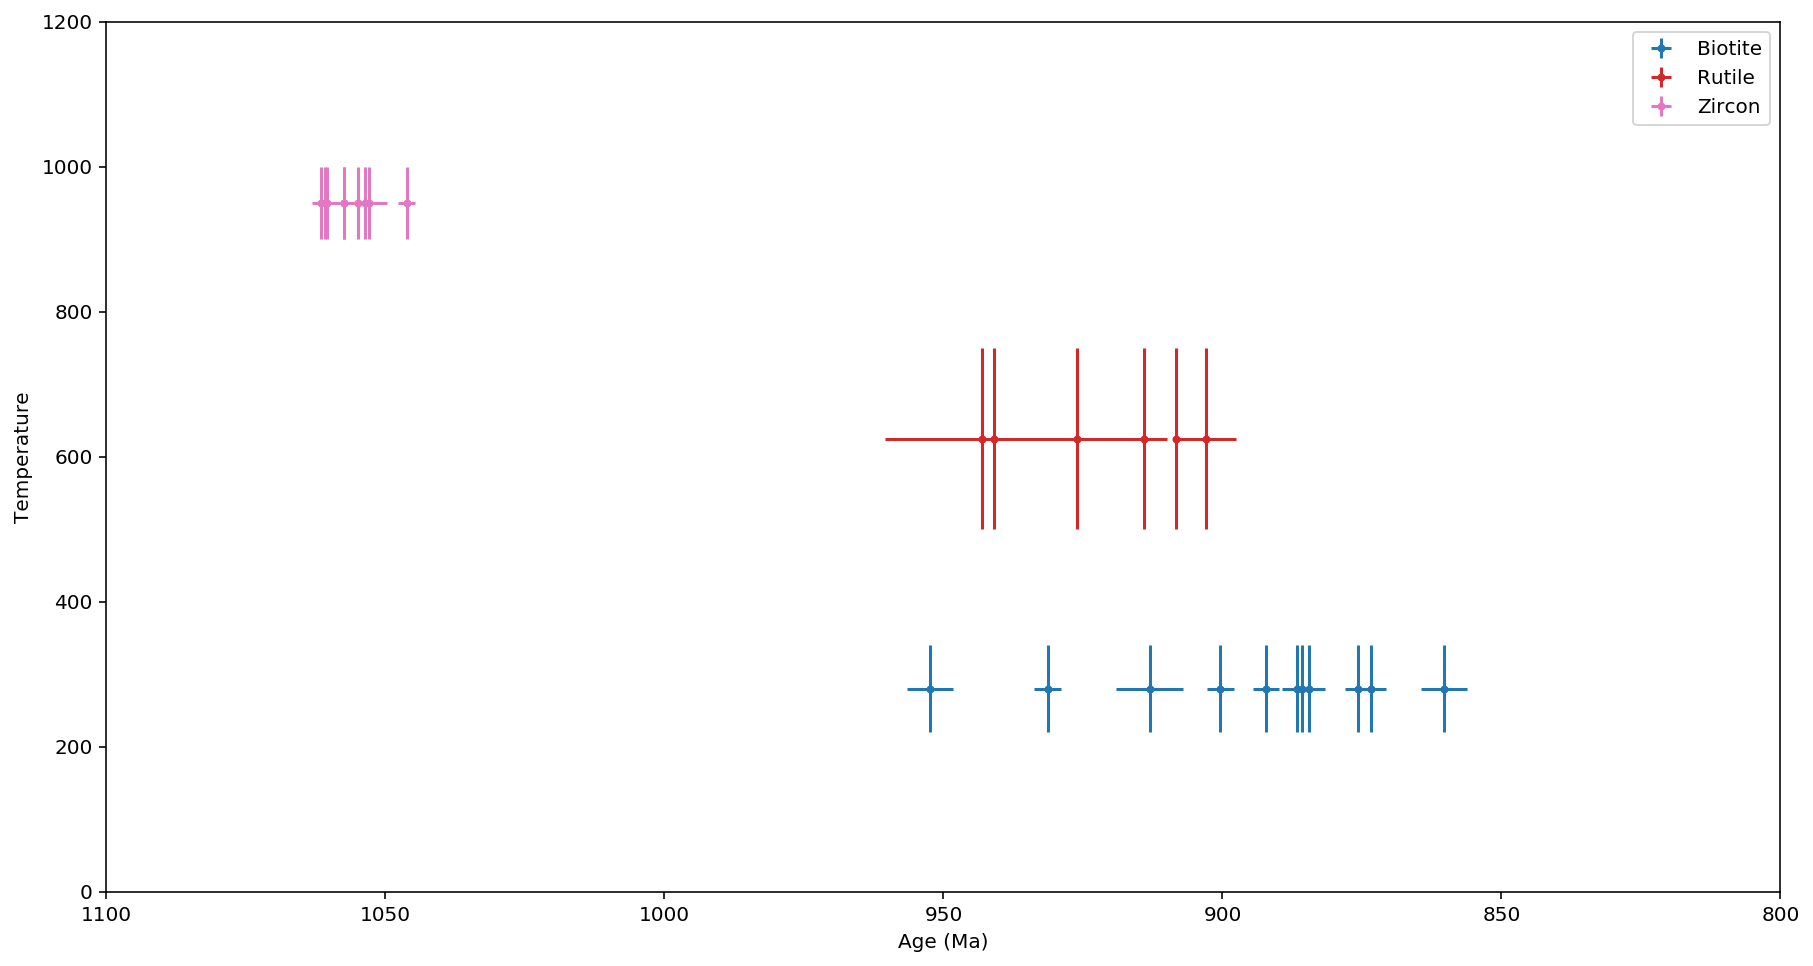

In [135]:
plt.figure(figsize=(15, 8))
for i in Allard_Urbain_ages.Age_Material.unique():
    closure_temp_bounds = closure_temp_bounds_dict[i]
    this_material = Allard_Urbain_ages[Allard_Urbain_ages['Age_Material'] == i]
    plt.errorbar(this_material['Age'], np.full(len(this_material['Age']),closure_temp_bounds[0]), closure_temp_bounds[1], this_material['Error_Plus'], fmt='.',
                 color=color_dict[i], ls='None', label=i)
plt.ylabel('Temperature')
plt.xlabel('Age (Ma)')
plt.ylim(0, 1200)
plt.gca().invert_xaxis()
plt.xlim(1100, 800)
plt.legend()
plt.show()

## Frontenac axis dikes whole rock thermochron

In [20]:
Frontenac_axis_ages = pd.read_csv('../data/thermochron_compilation/Reynolds1978a.csv')
Frontenac_axis_ages = Frontenac_axis_ages.sort_values(by=['Age_Material', 'Age']).reset_index(drop=1)
Frontenac_axis_ages.head()

,Sample_No,Age,Error_Plus,Error_Minus,Age_Method,Age_Interpretation,Age_Note,Age_Material,Age_Technique,Age_Qualifier,Geological_Province,Province,Latitude,Longitude,Location,Geological_Info,Rock_Type,Rock_Description,References
0,K5-2B,871.0,49.9,49.9,Ar/Ar,Cooling,recalculated,Whole Rock,Ar Furnace-Step,NaN,Grenville Province,ON,44.3,-76,NaN,Frontenac,Plutonic,diabase,"Reynolds, P. H., Olojo, E. O., Stukas, V. J., ..."
1,K3-4B,871.8,46.8,46.8,Ar/Ar,Cooling,recalculated,Whole Rock,Ar Furnace-Step,NaN,Grenville Province,ON,44.3,-76,NaN,Frontenac,Plutonic,diabase,"Reynolds, P. H., Olojo, E. O., Stukas, V. J., ..."
2,K6-1,885.8,29.3,29.3,Ar/Ar,Cooling,recalculated,Whole Rock,Ar Furnace-Step,NaN,Grenville Province,ON,44.3,-76,NaN,Frontenac,Plutonic,diabase,"Reynolds, P. H., Olojo, E. O., Stukas, V. J., ..."
3,WF9-2A,904.4,19.9,19.9,Ar/Ar,Cooling,recalculated,Whole Rock,Ar Furnace-Step,NaN,Grenville Province,ON,44.3,-76,NaN,Frontenac,Plutonic,diabase,"Reynolds, P. H., Olojo, E. O., Stukas, V. J., ..."
4,K4-4A,909.8,23.1,23.1,Ar/Ar,Cooling,recalculated,Whole Rock,Ar Furnace-Step,NaN,Grenville Province,ON,44.3,-76,NaN,Frontenac,Plutonic,diabase,"Reynolds, P. H., Olojo, E. O., Stukas, V. J., ..."


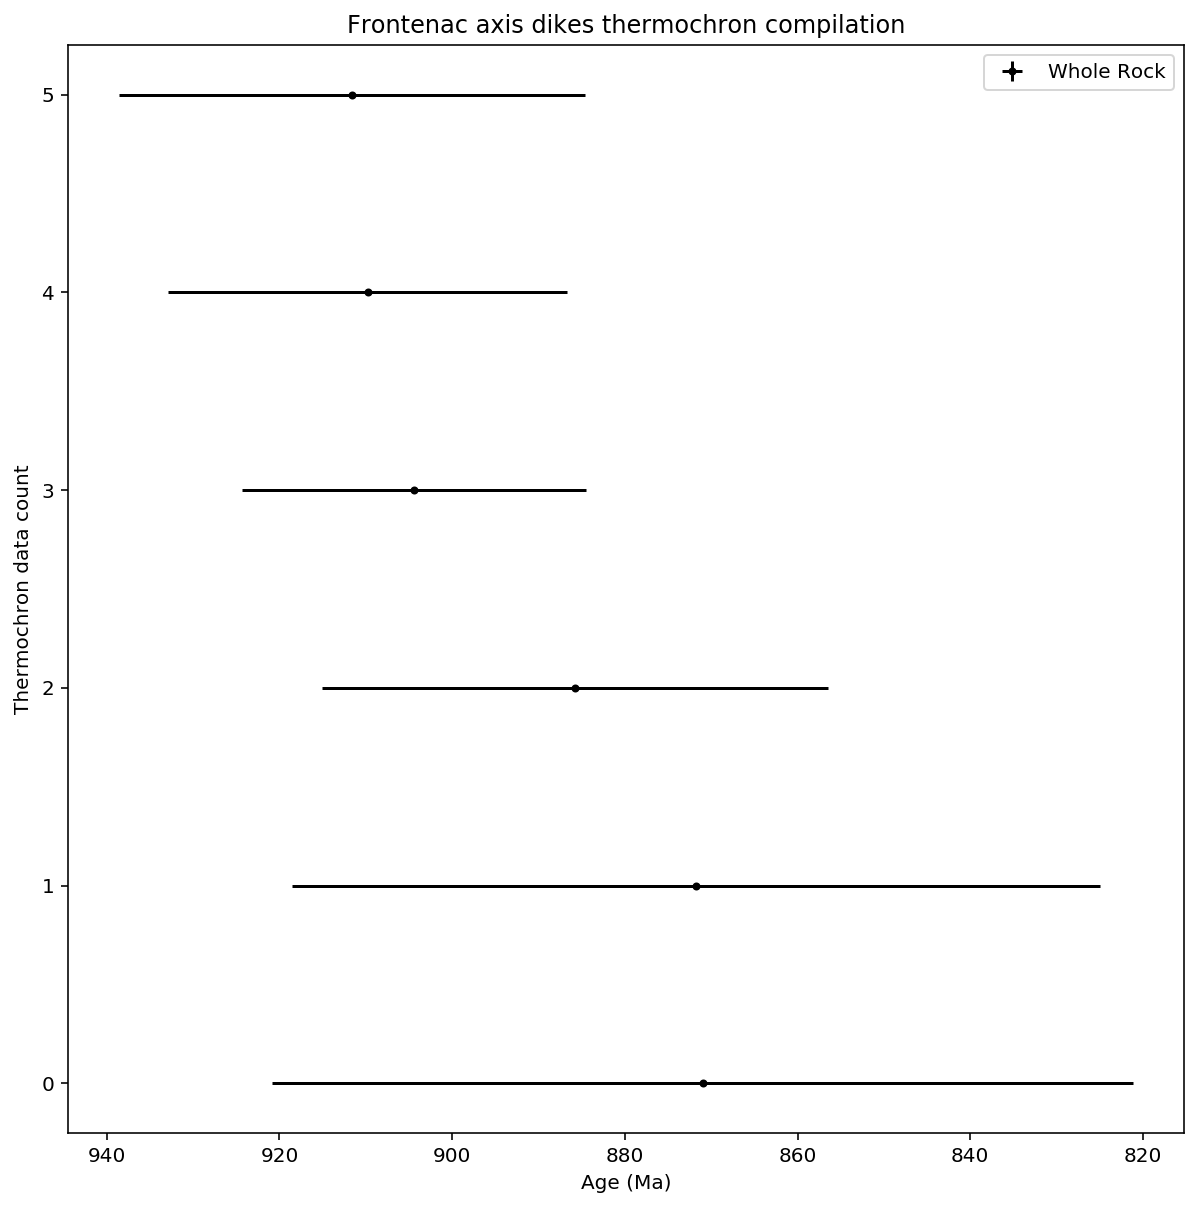

In [23]:
plt.figure(figsize=(10, 10))
for i in range(len(Frontenac_axis_ages.Age_Material.unique())):
    this_material = Frontenac_axis_ages[Frontenac_axis_ages['Age_Material'] == Frontenac_axis_ages.Age_Material.unique()[i]]
    plt.errorbar(this_material['Age'], this_material.index,  0, this_material['Error_Plus'], fmt='.',
                 color=color_dict[Frontenac_axis_ages.Age_Material.unique()[i]], ls='None', label=Frontenac_axis_ages.Age_Material.unique()[i])
plt.title('Frontenac axis dikes thermochron compilation')
plt.ylabel('Thermochron data count')
plt.xlabel('Age (Ma)')
plt.gca().invert_xaxis()
plt.legend()

In [31]:
print(np.round([Frontenac_axis_ages['Age'].mean(), Frontenac_axis_ages['Age'].std()], 1)

[892.4  18.7]


# Quebec NE Grenville thermochron

- Childe 1993 Monazite from the Reservoir Dozois Terrane and Renzy Shear Zone near the GF
- The rutile age is helpful - regardless of it being a cooling age or crystallization age (oxidation age) it is young for pmag (hemo!

In [118]:
Childe1993a_ages = pd.read_csv('../data/thermochron_compilation/Childe1993a.csv')
Childe1993a_ages = Childe1993a_ages[~Childe1993a_ages['Age_Material'].str.contains('Allanite|Garnet|Zircon|Phlogopite|Xenotime')].reset_index(drop=1)

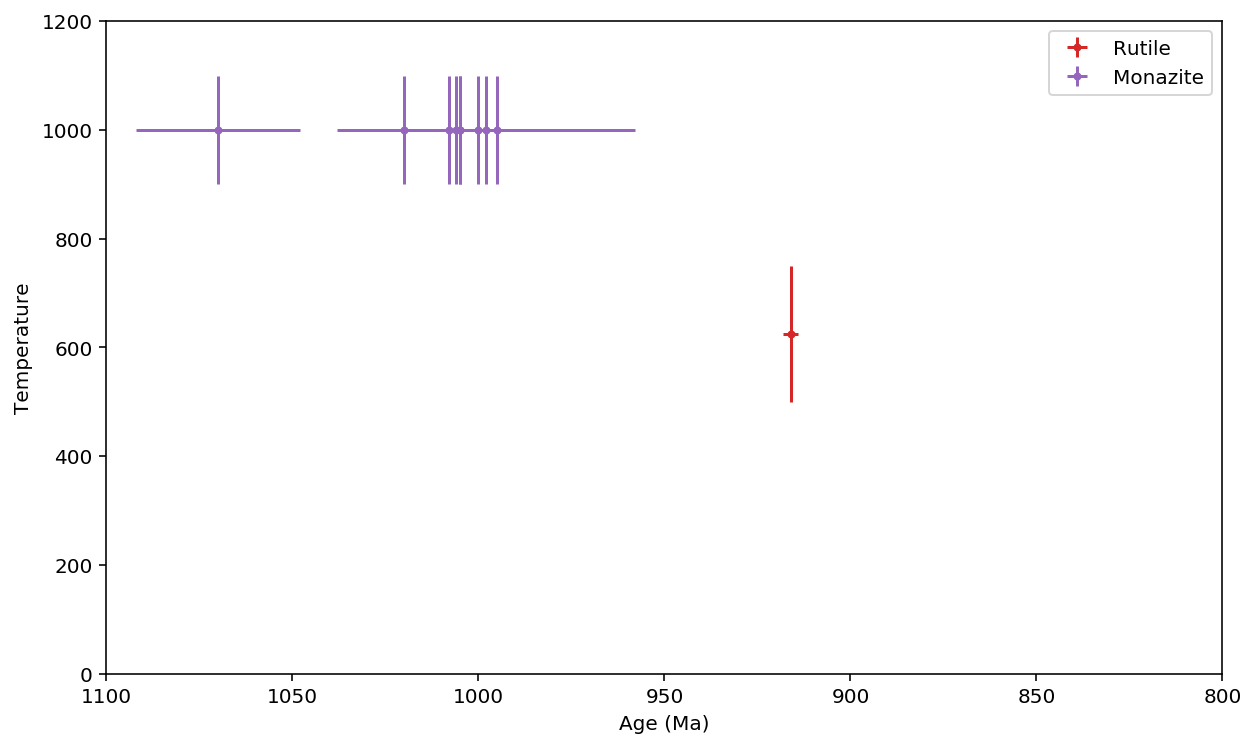

In [136]:
plt.figure(figsize=(10, 6))
for i in Childe1993a_ages.Age_Material.unique():
    closure_temp_bounds = closure_temp_bounds_dict[i]
    this_material = Childe1993a_ages[Childe1993a_ages['Age_Material'] == i]
    plt.errorbar(this_material['Age'], np.full(len(this_material['Age']),closure_temp_bounds[0]), closure_temp_bounds[1], this_material['Error_Plus'], fmt='.',
                 color=color_dict[i], ls='None', label=i)
plt.ylabel('Temperature')
plt.xlabel('Age (Ma)')
plt.gca().invert_xaxis()
plt.ylim(0, 1200)
plt.xlim(1100, 800)
plt.legend()
plt.show()